# SENTIMENT ANALYSIS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# read data
df = pd.read_csv('D:/LBSIM/Trimester 4/TP/reviews - Copy.csv')
text = df['review']
text.dropna()
text

0        Pours a clouded gold with a thin white head. N...
1        12oz bottle into 8oz snifter.\t\tDeep ruby red...
2        First enjoyed at the brewpub about 2 years ago...
3        First thing I noticed after pouring from green...
4        A: pours an amber with a one finger head but o...
                               ...                        
37485    12 oz brown longneck with no freshness dating....
37486    A - A bright red with a maroon-amber hue; mini...
37487    Sampled on tap at Redbones.\t\tThis marzen sty...
37488    Pours a black body with a brown head that very...
37489    A nice sweet, malty beer...nothing complex, ju...
Name: review, Length: 37490, dtype: object

Performing sentiment analysis on review/text to classify each as postive, negative and neutral. This feature will then be used in the model to predict overall review score

Lower casing, tokenising, ,rmoving stop words, POS tagging, lemmatizing and stemming on raw text

In [2]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df['clean'] = text.apply(lambda x: clean_text(x))
text = df['clean']

In [3]:
#Computing sentiment score
def sentimentScore(text):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        print("Vader score: " + str(vs))
        results.append(vs)
    return results

df_results = pd.DataFrame(sentimentScore(text))

Vader score: {'neg': 0.125, 'neu': 0.746, 'pos': 0.13, 'compound': 0.0772}
Vader score: {'neg': 0.194, 'neu': 0.625, 'pos': 0.181, 'compound': 0.25}
Vader score: {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.925}
Vader score: {'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.8532}
Vader score: {'neg': 0.041, 'neu': 0.723, 'pos': 0.236, 'compound': 0.8779}
Vader score: {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.7096}
Vader score: {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.9666}
Vader score: {'neg': 0.075, 'neu': 0.709, 'pos': 0.215, 'compound': 0.9758}
Vader score: {'neg': 0.102, 'neu': 0.635, 'pos': 0.263, 'compound': 0.9855}
Vader score: {'neg': 0.138, 'neu': 0.788, 'pos': 0.074, 'compound': -0.7572}
Vader score: {'neg': 0.023, 'neu': 0.771, 'pos': 0.206, 'compound': 0.9638}
Vader score: {'neg': 0.01, 'neu': 0.618, 'pos': 0.371, 'compound': 0.9899}
Vader score: {'neg': 0.019, 'neu': 0.658, 'pos': 0.323, 'compound': 0.9764}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.115, 'neu': 0.609, 'pos': 0.276, 'compound': 0.9533}
Vader score: {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.8591}
Vader score: {'neg': 0.055, 'neu': 0.649, 'pos': 0.296, 'compound': 0.9832}
Vader score: {'neg': 0.133, 'neu': 0.759, 'pos': 0.108, 'compound': -0.5401}
Vader score: {'neg': 0.066, 'neu': 0.718, 'pos': 0.216, 'compound': 0.8689}
Vader score: {'neg': 0.06, 'neu': 0.74, 'pos': 0.2, 'compound': 0.9281}
Vader score: {'neg': 0.057, 'neu': 0.674, 'pos': 0.269, 'compound': 0.9465}
Vader score: {'neg': 0.063, 'neu': 0.767, 'pos': 0.17, 'compound': 0.5574}
Vader score: {'neg': 0.059, 'neu': 0.605, 'pos': 0.336, 'compound': 0.9906}
Vader score: {'neg': 0.051, 'neu': 0.679, 'pos': 0.27, 'compound': 0.9039}
Vader score: {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.9709}
Vader score: {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.8107}
Vader score: {'neg': 0.065, 'neu': 0.573, 'pos': 0.363, 'compound': 0.9448}
Vader score: {'neg': 0.27

Vader score: {'neg': 0.02, 'neu': 0.595, 'pos': 0.384, 'compound': 0.9748}
Vader score: {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.9972}
Vader score: {'neg': 0.036, 'neu': 0.712, 'pos': 0.253, 'compound': 0.9442}
Vader score: {'neg': 0.078, 'neu': 0.636, 'pos': 0.287, 'compound': 0.9299}
Vader score: {'neg': 0.0, 'neu': 0.493, 'pos': 0.507, 'compound': 0.9883}
Vader score: {'neg': 0.018, 'neu': 0.698, 'pos': 0.284, 'compound': 0.9852}
Vader score: {'neg': 0.077, 'neu': 0.699, 'pos': 0.223, 'compound': 0.9513}
Vader score: {'neg': 0.05, 'neu': 0.443, 'pos': 0.507, 'compound': 0.967}
Vader score: {'neg': 0.069, 'neu': 0.587, 'pos': 0.344, 'compound': 0.979}
Vader score: {'neg': 0.113, 'neu': 0.826, 'pos': 0.061, 'compound': -0.2764}
Vader score: {'neg': 0.119, 'neu': 0.786, 'pos': 0.096, 'compound': -0.4019}
Vader score: {'neg': 0.049, 'neu': 0.717, 'pos': 0.234, 'compound': 0.99}
Vader score: {'neg': 0.091, 'neu': 0.831, 'pos': 0.078, 'compound': 0.128}
Vader score: {'neg': 

Vader score: {'neg': 0.087, 'neu': 0.743, 'pos': 0.17, 'compound': 0.8238}
Vader score: {'neg': 0.073, 'neu': 0.659, 'pos': 0.268, 'compound': 0.8078}
Vader score: {'neg': 0.038, 'neu': 0.635, 'pos': 0.327, 'compound': 0.9612}
Vader score: {'neg': 0.064, 'neu': 0.687, 'pos': 0.249, 'compound': 0.8901}
Vader score: {'neg': 0.02, 'neu': 0.662, 'pos': 0.318, 'compound': 0.9919}
Vader score: {'neg': 0.046, 'neu': 0.697, 'pos': 0.257, 'compound': 0.9595}
Vader score: {'neg': 0.079, 'neu': 0.715, 'pos': 0.206, 'compound': 0.9551}
Vader score: {'neg': 0.02, 'neu': 0.815, 'pos': 0.165, 'compound': 0.8658}
Vader score: {'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.9847}
Vader score: {'neg': 0.035, 'neu': 0.773, 'pos': 0.192, 'compound': 0.9042}
Vader score: {'neg': 0.064, 'neu': 0.708, 'pos': 0.228, 'compound': 0.9586}
Vader score: {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.969}
Vader score: {'neg': 0.085, 'neu': 0.612, 'pos': 0.303, 'compound': 0.9879}
Vader score: {'neg':

Vader score: {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.9137}
Vader score: {'neg': 0.022, 'neu': 0.624, 'pos': 0.354, 'compound': 0.9898}
Vader score: {'neg': 0.122, 'neu': 0.515, 'pos': 0.363, 'compound': 0.8519}
Vader score: {'neg': 0.12, 'neu': 0.771, 'pos': 0.109, 'compound': -0.128}
Vader score: {'neg': 0.083, 'neu': 0.72, 'pos': 0.197, 'compound': 0.8793}
Vader score: {'neg': 0.047, 'neu': 0.736, 'pos': 0.217, 'compound': 0.9612}
Vader score: {'neg': 0.067, 'neu': 0.753, 'pos': 0.18, 'compound': 0.9022}
Vader score: {'neg': 0.0, 'neu': 0.624, 'pos': 0.376, 'compound': 0.9773}
Vader score: {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.6908}
Vader score: {'neg': 0.14, 'neu': 0.487, 'pos': 0.372, 'compound': 0.7964}
Vader score: {'neg': 0.057, 'neu': 0.787, 'pos': 0.157, 'compound': 0.804}
Vader score: {'neg': 0.056, 'neu': 0.745, 'pos': 0.199, 'compound': 0.7841}
Vader score: {'neg': 0.029, 'neu': 0.634, 'pos': 0.338, 'compound': 0.9803}
Vader score: {'neg': 0.

Vader score: {'neg': 0.092, 'neu': 0.792, 'pos': 0.117, 'compound': 0.5267}
Vader score: {'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'compound': 0.0865}
Vader score: {'neg': 0.057, 'neu': 0.668, 'pos': 0.275, 'compound': 0.9516}
Vader score: {'neg': 0.059, 'neu': 0.706, 'pos': 0.235, 'compound': 0.9619}
Vader score: {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.9694}
Vader score: {'neg': 0.142, 'neu': 0.697, 'pos': 0.161, 'compound': 0.3612}
Vader score: {'neg': 0.063, 'neu': 0.753, 'pos': 0.185, 'compound': 0.91}
Vader score: {'neg': 0.07, 'neu': 0.748, 'pos': 0.182, 'compound': 0.907}
Vader score: {'neg': 0.192, 'neu': 0.636, 'pos': 0.172, 'compound': -0.4619}
Vader score: {'neg': 0.029, 'neu': 0.593, 'pos': 0.378, 'compound': 0.9865}
Vader score: {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.9781}
Vader score: {'neg': 0.047, 'neu': 0.665, 'pos': 0.288, 'compound': 0.9747}
Vader score: {'neg': 0.119, 'neu': 0.578, 'pos': 0.303, 'compound': 0.9074}
Vader score: {'neg': 

Vader score: {'neg': 0.143, 'neu': 0.713, 'pos': 0.144, 'compound': 0.0754}
Vader score: {'neg': 0.066, 'neu': 0.651, 'pos': 0.283, 'compound': 0.9845}
Vader score: {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.91}
Vader score: {'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.7964}
Vader score: {'neg': 0.081, 'neu': 0.711, 'pos': 0.208, 'compound': 0.8503}
Vader score: {'neg': 0.036, 'neu': 0.729, 'pos': 0.236, 'compound': 0.9336}
Vader score: {'neg': 0.085, 'neu': 0.579, 'pos': 0.336, 'compound': 0.9366}
Vader score: {'neg': 0.017, 'neu': 0.682, 'pos': 0.301, 'compound': 0.9615}
Vader score: {'neg': 0.056, 'neu': 0.84, 'pos': 0.104, 'compound': 0.34}
Vader score: {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.7096}
Vader score: {'neg': 0.054, 'neu': 0.705, 'pos': 0.241, 'compound': 0.9726}
Vader score: {'neg': 0.08, 'neu': 0.665, 'pos': 0.255, 'compound': 0.964}
Vader score: {'neg': 0.02, 'neu': 0.609, 'pos': 0.371, 'compound': 0.9962}
Vader score: {'neg': 0.049

Vader score: {'neg': 0.0, 'neu': 0.624, 'pos': 0.376, 'compound': 0.9876}
Vader score: {'neg': 0.092, 'neu': 0.673, 'pos': 0.235, 'compound': 0.8411}
Vader score: {'neg': 0.028, 'neu': 0.493, 'pos': 0.478, 'compound': 0.9926}
Vader score: {'neg': 0.02, 'neu': 0.829, 'pos': 0.151, 'compound': 0.9128}
Vader score: {'neg': 0.115, 'neu': 0.678, 'pos': 0.207, 'compound': 0.8591}
Vader score: {'neg': 0.019, 'neu': 0.677, 'pos': 0.304, 'compound': 0.9592}
Vader score: {'neg': 0.129, 'neu': 0.659, 'pos': 0.212, 'compound': 0.3612}
Vader score: {'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.9612}
Vader score: {'neg': 0.012, 'neu': 0.634, 'pos': 0.354, 'compound': 0.9952}
Vader score: {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.966}
Vader score: {'neg': 0.019, 'neu': 0.864, 'pos': 0.117, 'compound': 0.7275}
Vader score: {'neg': 0.059, 'neu': 0.704, 'pos': 0.236, 'compound': 0.8957}
Vader score: {'neg': 0.058, 'neu': 0.801, 'pos': 0.141, 'compound': 0.9405}
Vader score: {'neg':

Vader score: {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.989}
Vader score: {'neg': 0.054, 'neu': 0.77, 'pos': 0.176, 'compound': 0.9393}
Vader score: {'neg': 0.072, 'neu': 0.654, 'pos': 0.274, 'compound': 0.9553}
Vader score: {'neg': 0.036, 'neu': 0.751, 'pos': 0.212, 'compound': 0.9117}
Vader score: {'neg': 0.039, 'neu': 0.734, 'pos': 0.227, 'compound': 0.9546}
Vader score: {'neg': 0.195, 'neu': 0.718, 'pos': 0.087, 'compound': -0.7746}
Vader score: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8979}
Vader score: {'neg': 0.03, 'neu': 0.677, 'pos': 0.293, 'compound': 0.9646}
Vader score: {'neg': 0.065, 'neu': 0.727, 'pos': 0.208, 'compound': 0.9005}
Vader score: {'neg': 0.011, 'neu': 0.557, 'pos': 0.432, 'compound': 0.9966}
Vader score: {'neg': 0.051, 'neu': 0.784, 'pos': 0.166, 'compound': 0.7089}
Vader score: {'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.8074}
Vader score: {'neg': 0.042, 'neu': 0.606, 'pos': 0.351, 'compound': 0.9606}
Vader score: {'neg':

Vader score: {'neg': 0.07, 'neu': 0.628, 'pos': 0.302, 'compound': 0.9808}
Vader score: {'neg': 0.044, 'neu': 0.725, 'pos': 0.23, 'compound': 0.9723}
Vader score: {'neg': 0.085, 'neu': 0.643, 'pos': 0.272, 'compound': 0.9579}
Vader score: {'neg': 0.051, 'neu': 0.687, 'pos': 0.262, 'compound': 0.9561}
Vader score: {'neg': 0.085, 'neu': 0.692, 'pos': 0.223, 'compound': 0.8402}
Vader score: {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.9423}
Vader score: {'neg': 0.072, 'neu': 0.637, 'pos': 0.291, 'compound': 0.935}
Vader score: {'neg': 0.015, 'neu': 0.798, 'pos': 0.187, 'compound': 0.9329}
Vader score: {'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.9912}
Vader score: {'neg': 0.143, 'neu': 0.703, 'pos': 0.154, 'compound': 0.128}
Vader score: {'neg': 0.093, 'neu': 0.677, 'pos': 0.23, 'compound': 0.9209}
Vader score: {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.7783}
Vader score: {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.9858}
Vader score: {'neg': 0.08

Vader score: {'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.891}
Vader score: {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.9062}
Vader score: {'neg': 0.027, 'neu': 0.709, 'pos': 0.264, 'compound': 0.9669}
Vader score: {'neg': 0.057, 'neu': 0.699, 'pos': 0.244, 'compound': 0.9905}
Vader score: {'neg': 0.012, 'neu': 0.618, 'pos': 0.37, 'compound': 0.9876}
Vader score: {'neg': 0.065, 'neu': 0.504, 'pos': 0.431, 'compound': 0.9854}
Vader score: {'neg': 0.039, 'neu': 0.615, 'pos': 0.346, 'compound': 0.9834}
Vader score: {'neg': 0.028, 'neu': 0.783, 'pos': 0.189, 'compound': 0.9393}
Vader score: {'neg': 0.081, 'neu': 0.624, 'pos': 0.295, 'compound': 0.9828}
Vader score: {'neg': 0.046, 'neu': 0.743, 'pos': 0.211, 'compound': 0.8637}
Vader score: {'neg': 0.031, 'neu': 0.584, 'pos': 0.385, 'compound': 0.9923}
Vader score: {'neg': 0.033, 'neu': 0.713, 'pos': 0.254, 'compound': 0.9618}
Vader score: {'neg': 0.021, 'neu': 0.616, 'pos': 0.363, 'compound': 0.988}
Vader score: {'neg': 

Vader score: {'neg': 0.074, 'neu': 0.713, 'pos': 0.213, 'compound': 0.9843}
Vader score: {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.9956}
Vader score: {'neg': 0.017, 'neu': 0.85, 'pos': 0.133, 'compound': 0.8563}
Vader score: {'neg': 0.091, 'neu': 0.57, 'pos': 0.339, 'compound': 0.9711}
Vader score: {'neg': 0.062, 'neu': 0.669, 'pos': 0.269, 'compound': 0.8876}
Vader score: {'neg': 0.091, 'neu': 0.523, 'pos': 0.386, 'compound': 0.9776}
Vader score: {'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.921}
Vader score: {'neg': 0.026, 'neu': 0.884, 'pos': 0.09, 'compound': 0.6808}
Vader score: {'neg': 0.121, 'neu': 0.756, 'pos': 0.122, 'compound': -0.2227}
Vader score: {'neg': 0.071, 'neu': 0.65, 'pos': 0.279, 'compound': 0.9629}
Vader score: {'neg': 0.049, 'neu': 0.721, 'pos': 0.23, 'compound': 0.9419}
Vader score: {'neg': 0.106, 'neu': 0.679, 'pos': 0.215, 'compound': 0.9118}
Vader score: {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.5994}
Vader score: {'neg': 0.02

Vader score: {'neg': 0.049, 'neu': 0.67, 'pos': 0.281, 'compound': 0.9776}
Vader score: {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.942}
Vader score: {'neg': 0.09, 'neu': 0.773, 'pos': 0.138, 'compound': 0.7165}
Vader score: {'neg': 0.027, 'neu': 0.567, 'pos': 0.406, 'compound': 0.9874}
Vader score: {'neg': 0.13, 'neu': 0.69, 'pos': 0.18, 'compound': 0.8632}
Vader score: {'neg': 0.11, 'neu': 0.569, 'pos': 0.322, 'compound': 0.975}
Vader score: {'neg': 0.125, 'neu': 0.577, 'pos': 0.298, 'compound': 0.9217}
Vader score: {'neg': 0.089, 'neu': 0.7, 'pos': 0.211, 'compound': 0.8439}
Vader score: {'neg': 0.045, 'neu': 0.731, 'pos': 0.224, 'compound': 0.9392}
Vader score: {'neg': 0.097, 'neu': 0.578, 'pos': 0.325, 'compound': 0.8973}
Vader score: {'neg': 0.037, 'neu': 0.793, 'pos': 0.17, 'compound': 0.9042}
Vader score: {'neg': 0.113, 'neu': 0.653, 'pos': 0.234, 'compound': 0.9162}
Vader score: {'neg': 0.171, 'neu': 0.781, 'pos': 0.048, 'compound': -0.6249}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.142, 'neu': 0.665, 'pos': 0.193, 'compound': 0.5256}
Vader score: {'neg': 0.09, 'neu': 0.532, 'pos': 0.377, 'compound': 0.9081}
Vader score: {'neg': 0.199, 'neu': 0.693, 'pos': 0.107, 'compound': -0.8173}
Vader score: {'neg': 0.075, 'neu': 0.673, 'pos': 0.252, 'compound': 0.9364}
Vader score: {'neg': 0.049, 'neu': 0.651, 'pos': 0.3, 'compound': 0.9141}
Vader score: {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.9433}
Vader score: {'neg': 0.039, 'neu': 0.667, 'pos': 0.295, 'compound': 0.9531}
Vader score: {'neg': 0.065, 'neu': 0.624, 'pos': 0.312, 'compound': 0.9545}
Vader score: {'neg': 0.03, 'neu': 0.571, 'pos': 0.399, 'compound': 0.9832}
Vader score: {'neg': 0.077, 'neu': 0.598, 'pos': 0.325, 'compound': 0.9955}
Vader score: {'neg': 0.085, 'neu': 0.782, 'pos': 0.133, 'compound': 0.5719}
Vader score: {'neg': 0.162, 'neu': 0.552, 'pos': 0.285, 'compound': 0.9611}
Vader score: {'neg': 0.04, 'neu': 0.682, 'pos': 0.278, 'compound': 0.9481}
Vader score: {'neg':

Vader score: {'neg': 0.093, 'neu': 0.581, 'pos': 0.326, 'compound': 0.9868}
Vader score: {'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.971}
Vader score: {'neg': 0.044, 'neu': 0.657, 'pos': 0.299, 'compound': 0.9647}
Vader score: {'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.9436}
Vader score: {'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.9136}
Vader score: {'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.9578}
Vader score: {'neg': 0.049, 'neu': 0.654, 'pos': 0.297, 'compound': 0.9124}
Vader score: {'neg': 0.118, 'neu': 0.796, 'pos': 0.087, 'compound': -0.3612}
Vader score: {'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.9517}
Vader score: {'neg': 0.103, 'neu': 0.82, 'pos': 0.077, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'compound': 0.9552}
Vader score: {'neg': 0.088, 'neu': 0.646, 'pos': 0.266, 'compound': 0.9259}
Vader score: {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.968}
Vader score: {'neg': 0.059, 'neu': 

Vader score: {'neg': 0.028, 'neu': 0.698, 'pos': 0.274, 'compound': 0.9723}
Vader score: {'neg': 0.024, 'neu': 0.742, 'pos': 0.234, 'compound': 0.969}
Vader score: {'neg': 0.039, 'neu': 0.716, 'pos': 0.245, 'compound': 0.9245}
Vader score: {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.8843}
Vader score: {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.9881}
Vader score: {'neg': 0.47, 'neu': 0.479, 'pos': 0.051, 'compound': -0.9325}
Vader score: {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.6705}
Vader score: {'neg': 0.024, 'neu': 0.554, 'pos': 0.422, 'compound': 0.9913}
Vader score: {'neg': 0.041, 'neu': 0.915, 'pos': 0.044, 'compound': 0.046}
Vader score: {'neg': 0.043, 'neu': 0.644, 'pos': 0.313, 'compound': 0.9771}
Vader score: {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.9423}
Vader score: {'neg': 0.021, 'neu': 0.723, 'pos': 0.256, 'compound': 0.9287}
Vader score: {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.8402}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.135, 'neu': 0.612, 'pos': 0.253, 'compound': 0.9449}
Vader score: {'neg': 0.028, 'neu': 0.724, 'pos': 0.248, 'compound': 0.9315}
Vader score: {'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.9883}
Vader score: {'neg': 0.042, 'neu': 0.617, 'pos': 0.341, 'compound': 0.971}
Vader score: {'neg': 0.034, 'neu': 0.643, 'pos': 0.323, 'compound': 0.9633}
Vader score: {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.9602}
Vader score: {'neg': 0.031, 'neu': 0.731, 'pos': 0.238, 'compound': 0.836}
Vader score: {'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.9847}
Vader score: {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.9169}
Vader score: {'neg': 0.115, 'neu': 0.592, 'pos': 0.293, 'compound': 0.9611}
Vader score: {'neg': 0.059, 'neu': 0.61, 'pos': 0.331, 'compound': 0.9083}
Vader score: {'neg': 0.026, 'neu': 0.648, 'pos': 0.326, 'compound': 0.9313}
Vader score: {'neg': 0.057, 'neu': 0.632, 'pos': 0.311, 'compound': 0.9907}
Vader score: {'neg': 0.

Vader score: {'neg': 0.064, 'neu': 0.738, 'pos': 0.198, 'compound': 0.9607}
Vader score: {'neg': 0.09, 'neu': 0.733, 'pos': 0.176, 'compound': 0.6161}
Vader score: {'neg': 0.088, 'neu': 0.592, 'pos': 0.32, 'compound': 0.9531}
Vader score: {'neg': 0.044, 'neu': 0.732, 'pos': 0.224, 'compound': 0.91}
Vader score: {'neg': 0.031, 'neu': 0.496, 'pos': 0.473, 'compound': 0.982}
Vader score: {'neg': 0.098, 'neu': 0.617, 'pos': 0.285, 'compound': 0.807}
Vader score: {'neg': 0.062, 'neu': 0.531, 'pos': 0.407, 'compound': 0.9393}
Vader score: {'neg': 0.0, 'neu': 0.668, 'pos': 0.332, 'compound': 0.9246}
Vader score: {'neg': 0.05, 'neu': 0.649, 'pos': 0.301, 'compound': 0.9107}
Vader score: {'neg': 0.035, 'neu': 0.728, 'pos': 0.237, 'compound': 0.8176}
Vader score: {'neg': 0.22, 'neu': 0.566, 'pos': 0.214, 'compound': -0.3415}
Vader score: {'neg': 0.036, 'neu': 0.669, 'pos': 0.295, 'compound': 0.965}
Vader score: {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.9566}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.033, 'neu': 0.637, 'pos': 0.33, 'compound': 0.9928}
Vader score: {'neg': 0.032, 'neu': 0.85, 'pos': 0.118, 'compound': 0.7778}
Vader score: {'neg': 0.105, 'neu': 0.648, 'pos': 0.247, 'compound': 0.9421}
Vader score: {'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.967}
Vader score: {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.9764}
Vader score: {'neg': 0.191, 'neu': 0.576, 'pos': 0.233, 'compound': 0.547}
Vader score: {'neg': 0.077, 'neu': 0.809, 'pos': 0.114, 'compound': 0.4588}
Vader score: {'neg': 0.119, 'neu': 0.445, 'pos': 0.436, 'compound': 0.9782}
Vader score: {'neg': 0.034, 'neu': 0.807, 'pos': 0.159, 'compound': 0.7845}
Vader score: {'neg': 0.078, 'neu': 0.594, 'pos': 0.329, 'compound': 0.9922}
Vader score: {'neg': 0.017, 'neu': 0.585, 'pos': 0.397, 'compound': 0.9955}
Vader score: {'neg': 0.079, 'neu': 0.718, 'pos': 0.203, 'compound': 0.7184}
Vader score: {'neg': 0.148, 'neu': 0.575, 'pos': 0.277, 'compound': 0.6329}
Vader score: {'neg':

Vader score: {'neg': 0.207, 'neu': 0.653, 'pos': 0.14, 'compound': -0.8785}
Vader score: {'neg': 0.034, 'neu': 0.863, 'pos': 0.103, 'compound': 0.678}
Vader score: {'neg': 0.076, 'neu': 0.695, 'pos': 0.229, 'compound': 0.8748}
Vader score: {'neg': 0.159, 'neu': 0.61, 'pos': 0.231, 'compound': 0.7865}
Vader score: {'neg': 0.06, 'neu': 0.775, 'pos': 0.165, 'compound': 0.9242}
Vader score: {'neg': 0.071, 'neu': 0.805, 'pos': 0.124, 'compound': 0.296}
Vader score: {'neg': 0.106, 'neu': 0.689, 'pos': 0.204, 'compound': 0.7409}
Vader score: {'neg': 0.061, 'neu': 0.557, 'pos': 0.381, 'compound': 0.9732}
Vader score: {'neg': 0.138, 'neu': 0.72, 'pos': 0.142, 'compound': 0.3325}
Vader score: {'neg': 0.056, 'neu': 0.698, 'pos': 0.246, 'compound': 0.9557}
Vader score: {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.9804}
Vader score: {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.9571}
Vader score: {'neg': 0.125, 'neu': 0.636, 'pos': 0.239, 'compound': 0.9238}
Vader score: {'neg': 

Vader score: {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.9878}
Vader score: {'neg': 0.079, 'neu': 0.601, 'pos': 0.32, 'compound': 0.9941}
Vader score: {'neg': 0.059, 'neu': 0.633, 'pos': 0.308, 'compound': 0.9426}
Vader score: {'neg': 0.228, 'neu': 0.498, 'pos': 0.274, 'compound': 0.565}
Vader score: {'neg': 0.04, 'neu': 0.618, 'pos': 0.343, 'compound': 0.99}
Vader score: {'neg': 0.038, 'neu': 0.599, 'pos': 0.362, 'compound': 0.9712}
Vader score: {'neg': 0.148, 'neu': 0.65, 'pos': 0.202, 'compound': 0.9133}
Vader score: {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.875}
Vader score: {'neg': 0.095, 'neu': 0.657, 'pos': 0.247, 'compound': 0.5617}
Vader score: {'neg': 0.128, 'neu': 0.716, 'pos': 0.156, 'compound': 0.128}
Vader score: {'neg': 0.062, 'neu': 0.733, 'pos': 0.206, 'compound': 0.9081}
Vader score: {'neg': 0.056, 'neu': 0.621, 'pos': 0.323, 'compound': 0.9653}
Vader score: {'neg': 0.118, 'neu': 0.677, 'pos': 0.206, 'compound': 0.5423}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.049, 'neu': 0.673, 'pos': 0.277, 'compound': 0.9653}
Vader score: {'neg': 0.061, 'neu': 0.594, 'pos': 0.344, 'compound': 0.9942}
Vader score: {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.9159}
Vader score: {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.6597}
Vader score: {'neg': 0.062, 'neu': 0.621, 'pos': 0.317, 'compound': 0.9855}
Vader score: {'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.9476}
Vader score: {'neg': 0.062, 'neu': 0.791, 'pos': 0.147, 'compound': 0.484}
Vader score: {'neg': 0.09, 'neu': 0.719, 'pos': 0.191, 'compound': 0.8402}
Vader score: {'neg': 0.053, 'neu': 0.708, 'pos': 0.238, 'compound': 0.9588}
Vader score: {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.4767}
Vader score: {'neg': 0.029, 'neu': 0.597, 'pos': 0.374, 'compound': 0.9656}
Vader score: {'neg': 0.031, 'neu': 0.646, 'pos': 0.323, 'compound': 0.9792}
Vader score: {'neg': 0.015, 'neu': 0.713, 'pos': 0.272, 'compound': 0.9885}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.092, 'neu': 0.592, 'pos': 0.317, 'compound': 0.9898}
Vader score: {'neg': 0.031, 'neu': 0.699, 'pos': 0.27, 'compound': 0.9836}
Vader score: {'neg': 0.042, 'neu': 0.52, 'pos': 0.438, 'compound': 0.9705}
Vader score: {'neg': 0.03, 'neu': 0.701, 'pos': 0.269, 'compound': 0.9805}
Vader score: {'neg': 0.061, 'neu': 0.57, 'pos': 0.369, 'compound': 0.9971}
Vader score: {'neg': 0.056, 'neu': 0.719, 'pos': 0.224, 'compound': 0.8934}
Vader score: {'neg': 0.055, 'neu': 0.614, 'pos': 0.332, 'compound': 0.9873}
Vader score: {'neg': 0.053, 'neu': 0.692, 'pos': 0.255, 'compound': 0.9809}
Vader score: {'neg': 0.053, 'neu': 0.734, 'pos': 0.212, 'compound': 0.9652}
Vader score: {'neg': 0.056, 'neu': 0.594, 'pos': 0.35, 'compound': 0.9744}
Vader score: {'neg': 0.082, 'neu': 0.862, 'pos': 0.056, 'compound': -0.2732}
Vader score: {'neg': 0.014, 'neu': 0.79, 'pos': 0.196, 'compound': 0.9505}
Vader score: {'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.8255}
Vader score: {'neg'

Vader score: {'neg': 0.055, 'neu': 0.575, 'pos': 0.37, 'compound': 0.9847}
Vader score: {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.9771}
Vader score: {'neg': 0.108, 'neu': 0.689, 'pos': 0.203, 'compound': 0.9705}
Vader score: {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.9712}
Vader score: {'neg': 0.062, 'neu': 0.778, 'pos': 0.16, 'compound': 0.9663}
Vader score: {'neg': 0.077, 'neu': 0.595, 'pos': 0.328, 'compound': 0.9805}
Vader score: {'neg': 0.12, 'neu': 0.58, 'pos': 0.3, 'compound': 0.9782}
Vader score: {'neg': 0.077, 'neu': 0.724, 'pos': 0.199, 'compound': 0.8225}
Vader score: {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.9815}
Vader score: {'neg': 0.029, 'neu': 0.6, 'pos': 0.37, 'compound': 0.992}
Vader score: {'neg': 0.05, 'neu': 0.708, 'pos': 0.242, 'compound': 0.9189}
Vader score: {'neg': 0.07, 'neu': 0.59, 'pos': 0.339, 'compound': 0.9885}
Vader score: {'neg': 0.0, 'neu': 0.553, 'pos': 0.447, 'compound': 0.9768}
Vader score: {'neg': 0.096, 'neu'

Vader score: {'neg': 0.033, 'neu': 0.755, 'pos': 0.212, 'compound': 0.9287}
Vader score: {'neg': 0.018, 'neu': 0.693, 'pos': 0.29, 'compound': 0.9619}
Vader score: {'neg': 0.056, 'neu': 0.744, 'pos': 0.2, 'compound': 0.9002}
Vader score: {'neg': 0.049, 'neu': 0.767, 'pos': 0.184, 'compound': 0.9296}
Vader score: {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.9001}
Vader score: {'neg': 0.113, 'neu': 0.671, 'pos': 0.216, 'compound': 0.8074}
Vader score: {'neg': 0.0, 'neu': 0.624, 'pos': 0.376, 'compound': 0.992}
Vader score: {'neg': 0.013, 'neu': 0.574, 'pos': 0.413, 'compound': 0.9872}
Vader score: {'neg': 0.053, 'neu': 0.709, 'pos': 0.237, 'compound': 0.9932}
Vader score: {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.9837}
Vader score: {'neg': 0.113, 'neu': 0.583, 'pos': 0.304, 'compound': 0.9735}
Vader score: {'neg': 0.036, 'neu': 0.77, 'pos': 0.194, 'compound': 0.9688}
Vader score: {'neg': 0.104, 'neu': 0.667, 'pos': 0.229, 'compound': 0.9863}
Vader score: {'neg': 0.

Vader score: {'neg': 0.021, 'neu': 0.743, 'pos': 0.236, 'compound': 0.9788}
Vader score: {'neg': 0.083, 'neu': 0.748, 'pos': 0.169, 'compound': 0.7269}
Vader score: {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.9217}
Vader score: {'neg': 0.165, 'neu': 0.835, 'pos': 0.0, 'compound': -0.8074}
Vader score: {'neg': 0.034, 'neu': 0.699, 'pos': 0.267, 'compound': 0.9567}
Vader score: {'neg': 0.018, 'neu': 0.632, 'pos': 0.35, 'compound': 0.9705}
Vader score: {'neg': 0.038, 'neu': 0.611, 'pos': 0.351, 'compound': 0.9865}
Vader score: {'neg': 0.043, 'neu': 0.774, 'pos': 0.183, 'compound': 0.836}
Vader score: {'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.6621}
Vader score: {'neg': 0.034, 'neu': 0.59, 'pos': 0.376, 'compound': 0.9807}
Vader score: {'neg': 0.036, 'neu': 0.572, 'pos': 0.392, 'compound': 0.9759}
Vader score: {'neg': 0.052, 'neu': 0.705, 'pos': 0.243, 'compound': 0.9329}
Vader score: {'neg': 0.03, 'neu': 0.799, 'pos': 0.171, 'compound': 0.8917}
Vader score: {'neg': 

Vader score: {'neg': 0.044, 'neu': 0.667, 'pos': 0.289, 'compound': 0.9903}
Vader score: {'neg': 0.201, 'neu': 0.64, 'pos': 0.159, 'compound': -0.4404}
Vader score: {'neg': 0.018, 'neu': 0.729, 'pos': 0.253, 'compound': 0.9517}
Vader score: {'neg': 0.0, 'neu': 0.48, 'pos': 0.52, 'compound': 0.9891}
Vader score: {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.4588}
Vader score: {'neg': 0.092, 'neu': 0.723, 'pos': 0.185, 'compound': 0.7165}
Vader score: {'neg': 0.037, 'neu': 0.803, 'pos': 0.159, 'compound': 0.8481}
Vader score: {'neg': 0.014, 'neu': 0.681, 'pos': 0.306, 'compound': 0.9758}
Vader score: {'neg': 0.031, 'neu': 0.795, 'pos': 0.174, 'compound': 0.9081}
Vader score: {'neg': 0.102, 'neu': 0.684, 'pos': 0.214, 'compound': 0.8481}
Vader score: {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.962}
Vader score: {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.9794}
Vader score: {'neg': 0.022, 'neu': 0.616, 'pos': 0.362, 'compound': 0.9894}
Vader score: {'neg': 0.

Vader score: {'neg': 0.167, 'neu': 0.644, 'pos': 0.189, 'compound': 0.3597}
Vader score: {'neg': 0.072, 'neu': 0.858, 'pos': 0.07, 'compound': -0.0258}
Vader score: {'neg': 0.0, 'neu': 0.56, 'pos': 0.44, 'compound': 0.9931}
Vader score: {'neg': 0.053, 'neu': 0.631, 'pos': 0.316, 'compound': 0.9869}
Vader score: {'neg': 0.106, 'neu': 0.771, 'pos': 0.124, 'compound': 0.2315}
Vader score: {'neg': 0.091, 'neu': 0.536, 'pos': 0.374, 'compound': 0.9716}
Vader score: {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.9578}
Vader score: {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.9671}
Vader score: {'neg': 0.102, 'neu': 0.505, 'pos': 0.393, 'compound': 0.9882}
Vader score: {'neg': 0.034, 'neu': 0.487, 'pos': 0.479, 'compound': 0.9939}
Vader score: {'neg': 0.025, 'neu': 0.771, 'pos': 0.204, 'compound': 0.9451}
Vader score: {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.9531}
Vader score: {'neg': 0.02, 'neu': 0.552, 'pos': 0.428, 'compound': 0.9842}
Vader score: {'neg': 0.

Vader score: {'neg': 0.054, 'neu': 0.614, 'pos': 0.332, 'compound': 0.9962}
Vader score: {'neg': 0.036, 'neu': 0.685, 'pos': 0.279, 'compound': 0.9904}
Vader score: {'neg': 0.136, 'neu': 0.644, 'pos': 0.22, 'compound': 0.8402}
Vader score: {'neg': 0.03, 'neu': 0.59, 'pos': 0.381, 'compound': 0.976}
Vader score: {'neg': 0.127, 'neu': 0.752, 'pos': 0.121, 'compound': -0.1457}
Vader score: {'neg': 0.079, 'neu': 0.584, 'pos': 0.337, 'compound': 0.8176}
Vader score: {'neg': 0.08, 'neu': 0.685, 'pos': 0.235, 'compound': 0.9831}
Vader score: {'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.8939}
Vader score: {'neg': 0.127, 'neu': 0.497, 'pos': 0.376, 'compound': 0.9751}
Vader score: {'neg': 0.021, 'neu': 0.567, 'pos': 0.412, 'compound': 0.9897}
Vader score: {'neg': 0.099, 'neu': 0.632, 'pos': 0.27, 'compound': 0.9026}
Vader score: {'neg': 0.037, 'neu': 0.761, 'pos': 0.202, 'compound': 0.9631}
Vader score: {'neg': 0.145, 'neu': 0.603, 'pos': 0.252, 'compound': 0.8622}
Vader score: {'neg': 

Vader score: {'neg': 0.029, 'neu': 0.784, 'pos': 0.187, 'compound': 0.8519}
Vader score: {'neg': 0.023, 'neu': 0.754, 'pos': 0.223, 'compound': 0.9717}
Vader score: {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.9473}
Vader score: {'neg': 0.057, 'neu': 0.854, 'pos': 0.088, 'compound': 0.2927}
Vader score: {'neg': 0.084, 'neu': 0.679, 'pos': 0.237, 'compound': 0.8553}
Vader score: {'neg': 0.043, 'neu': 0.691, 'pos': 0.266, 'compound': 0.926}
Vader score: {'neg': 0.015, 'neu': 0.721, 'pos': 0.264, 'compound': 0.9623}
Vader score: {'neg': 0.02, 'neu': 0.739, 'pos': 0.24, 'compound': 0.9201}
Vader score: {'neg': 0.044, 'neu': 0.741, 'pos': 0.214, 'compound': 0.8834}
Vader score: {'neg': 0.054, 'neu': 0.728, 'pos': 0.218, 'compound': 0.891}
Vader score: {'neg': 0.118, 'neu': 0.812, 'pos': 0.07, 'compound': -0.4767}
Vader score: {'neg': 0.142, 'neu': 0.594, 'pos': 0.265, 'compound': 0.9151}
Vader score: {'neg': 0.064, 'neu': 0.794, 'pos': 0.142, 'compound': 0.6411}
Vader score: {'neg

Vader score: {'neg': 0.147, 'neu': 0.626, 'pos': 0.226, 'compound': 0.7033}
Vader score: {'neg': 0.035, 'neu': 0.819, 'pos': 0.146, 'compound': 0.5859}
Vader score: {'neg': 0.065, 'neu': 0.67, 'pos': 0.264, 'compound': 0.9488}
Vader score: {'neg': 0.034, 'neu': 0.722, 'pos': 0.243, 'compound': 0.9863}
Vader score: {'neg': 0.098, 'neu': 0.729, 'pos': 0.172, 'compound': 0.7935}
Vader score: {'neg': 0.135, 'neu': 0.665, 'pos': 0.2, 'compound': 0.5809}
Vader score: {'neg': 0.035, 'neu': 0.621, 'pos': 0.344, 'compound': 0.9657}
Vader score: {'neg': 0.035, 'neu': 0.556, 'pos': 0.409, 'compound': 0.9961}
Vader score: {'neg': 0.058, 'neu': 0.746, 'pos': 0.195, 'compound': 0.888}
Vader score: {'neg': 0.121, 'neu': 0.711, 'pos': 0.168, 'compound': 0.485}
Vader score: {'neg': 0.024, 'neu': 0.688, 'pos': 0.288, 'compound': 0.9666}
Vader score: {'neg': 0.028, 'neu': 0.664, 'pos': 0.308, 'compound': 0.9643}
Vader score: {'neg': 0.026, 'neu': 0.545, 'pos': 0.429, 'compound': 0.9922}
Vader score: {'ne

Vader score: {'neg': 0.065, 'neu': 0.704, 'pos': 0.231, 'compound': 0.981}
Vader score: {'neg': 0.048, 'neu': 0.79, 'pos': 0.162, 'compound': 0.9066}
Vader score: {'neg': 0.081, 'neu': 0.571, 'pos': 0.348, 'compound': 0.9925}
Vader score: {'neg': 0.047, 'neu': 0.609, 'pos': 0.344, 'compound': 0.9888}
Vader score: {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.6908}
Vader score: {'neg': 0.014, 'neu': 0.666, 'pos': 0.32, 'compound': 0.9775}
Vader score: {'neg': 0.16, 'neu': 0.653, 'pos': 0.187, 'compound': 0.1832}
Vader score: {'neg': 0.167, 'neu': 0.59, 'pos': 0.243, 'compound': 0.7506}
Vader score: {'neg': 0.104, 'neu': 0.638, 'pos': 0.258, 'compound': 0.8768}
Vader score: {'neg': 0.027, 'neu': 0.781, 'pos': 0.192, 'compound': 0.9315}
Vader score: {'neg': 0.013, 'neu': 0.695, 'pos': 0.292, 'compound': 0.9826}
Vader score: {'neg': 0.04, 'neu': 0.717, 'pos': 0.243, 'compound': 0.9423}
Vader score: {'neg': 0.044, 'neu': 0.634, 'pos': 0.322, 'compound': 0.9657}
Vader score: {'neg':

Vader score: {'neg': 0.097, 'neu': 0.658, 'pos': 0.245, 'compound': 0.8569}
Vader score: {'neg': 0.053, 'neu': 0.59, 'pos': 0.357, 'compound': 0.9861}
Vader score: {'neg': 0.043, 'neu': 0.731, 'pos': 0.226, 'compound': 0.9694}
Vader score: {'neg': 0.046, 'neu': 0.766, 'pos': 0.188, 'compound': 0.788}
Vader score: {'neg': 0.086, 'neu': 0.736, 'pos': 0.178, 'compound': 0.4588}
Vader score: {'neg': 0.045, 'neu': 0.709, 'pos': 0.246, 'compound': 0.8532}
Vader score: {'neg': 0.085, 'neu': 0.775, 'pos': 0.14, 'compound': 0.7783}
Vader score: {'neg': 0.053, 'neu': 0.63, 'pos': 0.317, 'compound': 0.9727}
Vader score: {'neg': 0.043, 'neu': 0.505, 'pos': 0.452, 'compound': 0.9708}
Vader score: {'neg': 0.063, 'neu': 0.626, 'pos': 0.311, 'compound': 0.9895}
Vader score: {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.9779}
Vader score: {'neg': 0.018, 'neu': 0.785, 'pos': 0.197, 'compound': 0.9022}
Vader score: {'neg': 0.084, 'neu': 0.812, 'pos': 0.105, 'compound': 0.0817}
Vader score: {'neg

Vader score: {'neg': 0.102, 'neu': 0.675, 'pos': 0.223, 'compound': 0.948}
Vader score: {'neg': 0.069, 'neu': 0.674, 'pos': 0.256, 'compound': 0.998}
Vader score: {'neg': 0.13, 'neu': 0.568, 'pos': 0.301, 'compound': 0.9049}
Vader score: {'neg': 0.042, 'neu': 0.752, 'pos': 0.206, 'compound': 0.9633}
Vader score: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.9128}
Vader score: {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.9169}
Vader score: {'neg': 0.088, 'neu': 0.767, 'pos': 0.145, 'compound': 0.7003}
Vader score: {'neg': 0.022, 'neu': 0.737, 'pos': 0.24, 'compound': 0.9607}
Vader score: {'neg': 0.089, 'neu': 0.675, 'pos': 0.235, 'compound': 0.807}
Vader score: {'neg': 0.012, 'neu': 0.657, 'pos': 0.332, 'compound': 0.9947}
Vader score: {'neg': 0.118, 'neu': 0.825, 'pos': 0.057, 'compound': -0.6258}
Vader score: {'neg': 0.041, 'neu': 0.753, 'pos': 0.206, 'compound': 0.9001}
Vader score: {'neg': 0.086, 'neu': 0.712, 'pos': 0.201, 'compound': 0.8473}
Vader score: {'neg':

Vader score: {'neg': 0.016, 'neu': 0.48, 'pos': 0.504, 'compound': 0.9879}
Vader score: {'neg': 0.064, 'neu': 0.544, 'pos': 0.393, 'compound': 0.9873}
Vader score: {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.8832}
Vader score: {'neg': 0.021, 'neu': 0.659, 'pos': 0.321, 'compound': 0.9883}
Vader score: {'neg': 0.041, 'neu': 0.669, 'pos': 0.29, 'compound': 0.987}
Vader score: {'neg': 0.059, 'neu': 0.638, 'pos': 0.303, 'compound': 0.9855}
Vader score: {'neg': 0.129, 'neu': 0.695, 'pos': 0.177, 'compound': 0.3935}
Vader score: {'neg': 0.083, 'neu': 0.702, 'pos': 0.216, 'compound': 0.9403}
Vader score: {'neg': 0.171, 'neu': 0.56, 'pos': 0.269, 'compound': 0.953}
Vader score: {'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'compound': 0.9835}
Vader score: {'neg': 0.05, 'neu': 0.649, 'pos': 0.301, 'compound': 0.9801}
Vader score: {'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'compound': 0.4404}
Vader score: {'neg': 0.085, 'neu': 0.554, 'pos': 0.36, 'compound': 0.9814}
Vader score: {'neg': 0.10

Vader score: {'neg': 0.032, 'neu': 0.639, 'pos': 0.329, 'compound': 0.9922}
Vader score: {'neg': 0.04, 'neu': 0.519, 'pos': 0.441, 'compound': 0.9794}
Vader score: {'neg': 0.079, 'neu': 0.684, 'pos': 0.237, 'compound': 0.886}
Vader score: {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.9565}
Vader score: {'neg': 0.154, 'neu': 0.593, 'pos': 0.253, 'compound': 0.9023}
Vader score: {'neg': 0.099, 'neu': 0.746, 'pos': 0.155, 'compound': 0.8857}
Vader score: {'neg': 0.086, 'neu': 0.579, 'pos': 0.335, 'compound': 0.99}
Vader score: {'neg': 0.026, 'neu': 0.707, 'pos': 0.267, 'compound': 0.9798}
Vader score: {'neg': 0.056, 'neu': 0.649, 'pos': 0.295, 'compound': 0.969}
Vader score: {'neg': 0.061, 'neu': 0.67, 'pos': 0.27, 'compound': 0.9789}
Vader score: {'neg': 0.052, 'neu': 0.623, 'pos': 0.325, 'compound': 0.9741}
Vader score: {'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.9705}
Vader score: {'neg': 0.058, 'neu': 0.696, 'pos': 0.247, 'compound': 0.9943}
Vader score: {'neg': 0.083,

Vader score: {'neg': 0.045, 'neu': 0.629, 'pos': 0.326, 'compound': 0.9468}
Vader score: {'neg': 0.03, 'neu': 0.586, 'pos': 0.384, 'compound': 0.9879}
Vader score: {'neg': 0.032, 'neu': 0.664, 'pos': 0.304, 'compound': 0.9556}
Vader score: {'neg': 0.082, 'neu': 0.642, 'pos': 0.276, 'compound': 0.9698}
Vader score: {'neg': 0.053, 'neu': 0.761, 'pos': 0.187, 'compound': 0.7506}
Vader score: {'neg': 0.13, 'neu': 0.62, 'pos': 0.25, 'compound': 0.8694}
Vader score: {'neg': 0.058, 'neu': 0.723, 'pos': 0.219, 'compound': 0.7783}
Vader score: {'neg': 0.074, 'neu': 0.662, 'pos': 0.264, 'compound': 0.9586}
Vader score: {'neg': 0.164, 'neu': 0.708, 'pos': 0.127, 'compound': -0.7133}
Vader score: {'neg': 0.036, 'neu': 0.769, 'pos': 0.195, 'compound': 0.8669}
Vader score: {'neg': 0.082, 'neu': 0.769, 'pos': 0.148, 'compound': 0.9085}
Vader score: {'neg': 0.066, 'neu': 0.764, 'pos': 0.17, 'compound': 0.7906}
Vader score: {'neg': 0.074, 'neu': 0.696, 'pos': 0.23, 'compound': 0.8737}
Vader score: {'ne

Vader score: {'neg': 0.064, 'neu': 0.644, 'pos': 0.292, 'compound': 0.9903}
Vader score: {'neg': 0.039, 'neu': 0.84, 'pos': 0.121, 'compound': 0.8479}
Vader score: {'neg': 0.093, 'neu': 0.556, 'pos': 0.352, 'compound': 0.9776}
Vader score: {'neg': 0.031, 'neu': 0.658, 'pos': 0.31, 'compound': 0.9552}
Vader score: {'neg': 0.064, 'neu': 0.583, 'pos': 0.353, 'compound': 0.9729}
Vader score: {'neg': 0.129, 'neu': 0.763, 'pos': 0.108, 'compound': -0.3612}
Vader score: {'neg': 0.053, 'neu': 0.663, 'pos': 0.285, 'compound': 0.8979}
Vader score: {'neg': 0.068, 'neu': 0.556, 'pos': 0.376, 'compound': 0.988}
Vader score: {'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'compound': -0.7907}
Vader score: {'neg': 0.059, 'neu': 0.586, 'pos': 0.355, 'compound': 0.9451}
Vader score: {'neg': 0.059, 'neu': 0.654, 'pos': 0.287, 'compound': 0.9779}
Vader score: {'neg': 0.053, 'neu': 0.609, 'pos': 0.338, 'compound': 0.9892}
Vader score: {'neg': 0.019, 'neu': 0.756, 'pos': 0.225, 'compound': 0.9811}
Vader score: {'

Vader score: {'neg': 0.117, 'neu': 0.531, 'pos': 0.352, 'compound': 0.9061}
Vader score: {'neg': 0.027, 'neu': 0.771, 'pos': 0.203, 'compound': 0.8991}
Vader score: {'neg': 0.151, 'neu': 0.709, 'pos': 0.14, 'compound': -0.4939}
Vader score: {'neg': 0.067, 'neu': 0.762, 'pos': 0.171, 'compound': 0.8939}
Vader score: {'neg': 0.033, 'neu': 0.768, 'pos': 0.199, 'compound': 0.9609}
Vader score: {'neg': 0.042, 'neu': 0.564, 'pos': 0.394, 'compound': 0.9606}
Vader score: {'neg': 0.082, 'neu': 0.77, 'pos': 0.148, 'compound': 0.7675}
Vader score: {'neg': 0.116, 'neu': 0.746, 'pos': 0.138, 'compound': 0.7453}
Vader score: {'neg': 0.068, 'neu': 0.709, 'pos': 0.223, 'compound': 0.8821}
Vader score: {'neg': 0.054, 'neu': 0.656, 'pos': 0.29, 'compound': 0.9371}
Vader score: {'neg': 0.029, 'neu': 0.759, 'pos': 0.212, 'compound': 0.8555}
Vader score: {'neg': 0.103, 'neu': 0.645, 'pos': 0.253, 'compound': 0.9566}
Vader score: {'neg': 0.019, 'neu': 0.773, 'pos': 0.209, 'compound': 0.9451}
Vader score: {

Vader score: {'neg': 0.079, 'neu': 0.761, 'pos': 0.16, 'compound': 0.9287}
Vader score: {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.8979}
Vader score: {'neg': 0.065, 'neu': 0.667, 'pos': 0.268, 'compound': 0.9726}
Vader score: {'neg': 0.04, 'neu': 0.716, 'pos': 0.244, 'compound': 0.9879}
Vader score: {'neg': 0.038, 'neu': 0.557, 'pos': 0.405, 'compound': 0.9948}
Vader score: {'neg': 0.116, 'neu': 0.724, 'pos': 0.16, 'compound': 0.8658}
Vader score: {'neg': 0.021, 'neu': 0.567, 'pos': 0.412, 'compound': 0.9849}
Vader score: {'neg': 0.047, 'neu': 0.756, 'pos': 0.197, 'compound': 0.7845}
Vader score: {'neg': 0.066, 'neu': 0.66, 'pos': 0.274, 'compound': 0.9685}
Vader score: {'neg': 0.065, 'neu': 0.635, 'pos': 0.3, 'compound': 0.9962}
Vader score: {'neg': 0.051, 'neu': 0.683, 'pos': 0.267, 'compound': 0.9929}
Vader score: {'neg': 0.026, 'neu': 0.701, 'pos': 0.273, 'compound': 0.9861}
Vader score: {'neg': 0.034, 'neu': 0.645, 'pos': 0.321, 'compound': 0.9664}
Vader score: {'neg':

Vader score: {'neg': 0.043, 'neu': 0.766, 'pos': 0.191, 'compound': 0.9277}
Vader score: {'neg': 0.021, 'neu': 0.686, 'pos': 0.293, 'compound': 0.9629}
Vader score: {'neg': 0.039, 'neu': 0.831, 'pos': 0.13, 'compound': 0.7574}
Vader score: {'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.9837}
Vader score: {'neg': 0.093, 'neu': 0.643, 'pos': 0.264, 'compound': 0.802}
Vader score: {'neg': 0.084, 'neu': 0.637, 'pos': 0.279, 'compound': 0.9062}
Vader score: {'neg': 0.117, 'neu': 0.732, 'pos': 0.151, 'compound': 0.399}
Vader score: {'neg': 0.05, 'neu': 0.652, 'pos': 0.299, 'compound': 0.9753}
Vader score: {'neg': 0.047, 'neu': 0.785, 'pos': 0.168, 'compound': 0.9246}
Vader score: {'neg': 0.35, 'neu': 0.526, 'pos': 0.124, 'compound': -0.6124}
Vader score: {'neg': 0.106, 'neu': 0.741, 'pos': 0.153, 'compound': 0.7901}
Vader score: {'neg': 0.038, 'neu': 0.757, 'pos': 0.205, 'compound': 0.7351}
Vader score: {'neg': 0.025, 'neu': 0.654, 'pos': 0.321, 'compound': 0.9798}
Vader score: {'neg

Vader score: {'neg': 0.147, 'neu': 0.729, 'pos': 0.124, 'compound': -0.2975}
Vader score: {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.9013}
Vader score: {'neg': 0.084, 'neu': 0.639, 'pos': 0.277, 'compound': 0.9943}
Vader score: {'neg': 0.023, 'neu': 0.677, 'pos': 0.3, 'compound': 0.9723}
Vader score: {'neg': 0.092, 'neu': 0.609, 'pos': 0.299, 'compound': 0.9803}
Vader score: {'neg': 0.031, 'neu': 0.656, 'pos': 0.313, 'compound': 0.9961}
Vader score: {'neg': 0.035, 'neu': 0.865, 'pos': 0.101, 'compound': 0.6369}
Vader score: {'neg': 0.104, 'neu': 0.724, 'pos': 0.173, 'compound': 0.5719}
Vader score: {'neg': 0.038, 'neu': 0.652, 'pos': 0.31, 'compound': 0.9524}
Vader score: {'neg': 0.056, 'neu': 0.673, 'pos': 0.271, 'compound': 0.9549}
Vader score: {'neg': 0.044, 'neu': 0.686, 'pos': 0.27, 'compound': 0.9683}
Vader score: {'neg': 0.024, 'neu': 0.702, 'pos': 0.274, 'compound': 0.9784}
Vader score: {'neg': 0.036, 'neu': 0.564, 'pos': 0.4, 'compound': 0.9972}
Vader score: {'neg'

Vader score: {'neg': 0.132, 'neu': 0.612, 'pos': 0.256, 'compound': 0.9737}
Vader score: {'neg': 0.071, 'neu': 0.684, 'pos': 0.245, 'compound': 0.9329}
Vader score: {'neg': 0.04, 'neu': 0.792, 'pos': 0.169, 'compound': 0.8316}
Vader score: {'neg': 0.085, 'neu': 0.645, 'pos': 0.27, 'compound': 0.9493}
Vader score: {'neg': 0.021, 'neu': 0.806, 'pos': 0.173, 'compound': 0.8807}
Vader score: {'neg': 0.01, 'neu': 0.646, 'pos': 0.344, 'compound': 0.9908}
Vader score: {'neg': 0.033, 'neu': 0.631, 'pos': 0.336, 'compound': 0.985}
Vader score: {'neg': 0.039, 'neu': 0.813, 'pos': 0.148, 'compound': 0.8176}
Vader score: {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.849}
Vader score: {'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.9584}
Vader score: {'neg': 0.017, 'neu': 0.834, 'pos': 0.149, 'compound': 0.8948}
Vader score: {'neg': 0.044, 'neu': 0.77, 'pos': 0.185, 'compound': 0.8225}
Vader score: {'neg': 0.109, 'neu': 0.614, 'pos': 0.277, 'compound': 0.8176}
Vader score: {'neg': 0

Vader score: {'neg': 0.206, 'neu': 0.544, 'pos': 0.25, 'compound': 0.2058}
Vader score: {'neg': 0.018, 'neu': 0.664, 'pos': 0.318, 'compound': 0.9682}
Vader score: {'neg': 0.059, 'neu': 0.541, 'pos': 0.4, 'compound': 0.9855}
Vader score: {'neg': 0.094, 'neu': 0.662, 'pos': 0.244, 'compound': 0.9511}
Vader score: {'neg': 0.101, 'neu': 0.64, 'pos': 0.259, 'compound': 0.9477}
Vader score: {'neg': 0.02, 'neu': 0.853, 'pos': 0.127, 'compound': 0.7506}
Vader score: {'neg': 0.118, 'neu': 0.628, 'pos': 0.254, 'compound': 0.6808}
Vader score: {'neg': 0.034, 'neu': 0.563, 'pos': 0.403, 'compound': 0.9809}
Vader score: {'neg': 0.036, 'neu': 0.622, 'pos': 0.342, 'compound': 0.9687}
Vader score: {'neg': 0.07, 'neu': 0.628, 'pos': 0.302, 'compound': 0.8481}
Vader score: {'neg': 0.062, 'neu': 0.618, 'pos': 0.32, 'compound': 0.9816}
Vader score: {'neg': 0.057, 'neu': 0.758, 'pos': 0.184, 'compound': 0.7351}
Vader score: {'neg': 0.042, 'neu': 0.635, 'pos': 0.322, 'compound': 0.9763}
Vader score: {'neg'

Vader score: {'neg': 0.172, 'neu': 0.496, 'pos': 0.333, 'compound': 0.935}
Vader score: {'neg': 0.065, 'neu': 0.682, 'pos': 0.253, 'compound': 0.9021}
Vader score: {'neg': 0.086, 'neu': 0.685, 'pos': 0.229, 'compound': 0.9682}
Vader score: {'neg': 0.079, 'neu': 0.587, 'pos': 0.334, 'compound': 0.8411}
Vader score: {'neg': 0.042, 'neu': 0.643, 'pos': 0.315, 'compound': 0.9859}
Vader score: {'neg': 0.111, 'neu': 0.623, 'pos': 0.266, 'compound': 0.8479}
Vader score: {'neg': 0.072, 'neu': 0.701, 'pos': 0.226, 'compound': 0.938}
Vader score: {'neg': 0.044, 'neu': 0.704, 'pos': 0.252, 'compound': 0.9925}
Vader score: {'neg': 0.117, 'neu': 0.612, 'pos': 0.271, 'compound': 0.9058}
Vader score: {'neg': 0.052, 'neu': 0.752, 'pos': 0.196, 'compound': 0.9034}
Vader score: {'neg': 0.02, 'neu': 0.631, 'pos': 0.349, 'compound': 0.992}
Vader score: {'neg': 0.054, 'neu': 0.792, 'pos': 0.154, 'compound': 0.6335}
Vader score: {'neg': 0.048, 'neu': 0.864, 'pos': 0.089, 'compound': 0.4404}
Vader score: {'n

Vader score: {'neg': 0.063, 'neu': 0.691, 'pos': 0.246, 'compound': 0.9826}
Vader score: {'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.9726}
Vader score: {'neg': 0.029, 'neu': 0.834, 'pos': 0.136, 'compound': 0.8271}
Vader score: {'neg': 0.09, 'neu': 0.746, 'pos': 0.164, 'compound': 0.8476}
Vader score: {'neg': 0.082, 'neu': 0.596, 'pos': 0.321, 'compound': 0.9279}
Vader score: {'neg': 0.094, 'neu': 0.573, 'pos': 0.333, 'compound': 0.9607}
Vader score: {'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'compound': 0.9889}
Vader score: {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.9201}
Vader score: {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9913}
Vader score: {'neg': 0.102, 'neu': 0.681, 'pos': 0.217, 'compound': 0.7269}
Vader score: {'neg': 0.1, 'neu': 0.545, 'pos': 0.355, 'compound': 0.9013}
Vader score: {'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.9583}
Vader score: {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.936}
Vader score: {'neg': 0.134, 

Vader score: {'neg': 0.038, 'neu': 0.52, 'pos': 0.442, 'compound': 0.9812}
Vader score: {'neg': 0.035, 'neu': 0.575, 'pos': 0.39, 'compound': 0.9728}
Vader score: {'neg': 0.074, 'neu': 0.714, 'pos': 0.212, 'compound': 0.972}
Vader score: {'neg': 0.058, 'neu': 0.595, 'pos': 0.347, 'compound': 0.9894}
Vader score: {'neg': 0.042, 'neu': 0.547, 'pos': 0.411, 'compound': 0.9666}
Vader score: {'neg': 0.162, 'neu': 0.706, 'pos': 0.133, 'compound': -0.4019}
Vader score: {'neg': 0.018, 'neu': 0.737, 'pos': 0.246, 'compound': 0.9475}
Vader score: {'neg': 0.075, 'neu': 0.776, 'pos': 0.149, 'compound': 0.3566}
Vader score: {'neg': 0.032, 'neu': 0.564, 'pos': 0.404, 'compound': 0.9939}
Vader score: {'neg': 0.021, 'neu': 0.715, 'pos': 0.264, 'compound': 0.9271}
Vader score: {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.9022}
Vader score: {'neg': 0.029, 'neu': 0.651, 'pos': 0.32, 'compound': 0.9678}
Vader score: {'neg': 0.092, 'neu': 0.541, 'pos': 0.366, 'compound': 0.9926}
Vader score: {'ne

Vader score: {'neg': 0.16, 'neu': 0.673, 'pos': 0.167, 'compound': -0.105}
Vader score: {'neg': 0.107, 'neu': 0.754, 'pos': 0.139, 'compound': 0.3419}
Vader score: {'neg': 0.045, 'neu': 0.699, 'pos': 0.256, 'compound': 0.9661}
Vader score: {'neg': 0.03, 'neu': 0.639, 'pos': 0.331, 'compound': 0.9707}
Vader score: {'neg': 0.079, 'neu': 0.566, 'pos': 0.356, 'compound': 0.8323}
Vader score: {'neg': 0.037, 'neu': 0.615, 'pos': 0.348, 'compound': 0.986}
Vader score: {'neg': 0.1, 'neu': 0.674, 'pos': 0.227, 'compound': 0.8834}
Vader score: {'neg': 0.059, 'neu': 0.622, 'pos': 0.319, 'compound': 0.9873}
Vader score: {'neg': 0.066, 'neu': 0.762, 'pos': 0.172, 'compound': 0.5106}
Vader score: {'neg': 0.13, 'neu': 0.618, 'pos': 0.252, 'compound': 0.6003}
Vader score: {'neg': 0.07, 'neu': 0.827, 'pos': 0.103, 'compound': 0.0772}
Vader score: {'neg': 0.043, 'neu': 0.583, 'pos': 0.374, 'compound': 0.984}
Vader score: {'neg': 0.101, 'neu': 0.613, 'pos': 0.286, 'compound': 0.9736}
Vader score: {'neg':

Vader score: {'neg': 0.037, 'neu': 0.701, 'pos': 0.262, 'compound': 0.9967}
Vader score: {'neg': 0.148, 'neu': 0.742, 'pos': 0.11, 'compound': -0.4019}
Vader score: {'neg': 0.046, 'neu': 0.641, 'pos': 0.313, 'compound': 0.9897}
Vader score: {'neg': 0.08, 'neu': 0.608, 'pos': 0.312, 'compound': 0.9922}
Vader score: {'neg': 0.044, 'neu': 0.47, 'pos': 0.486, 'compound': 0.9887}
Vader score: {'neg': 0.087, 'neu': 0.636, 'pos': 0.277, 'compound': 0.9835}
Vader score: {'neg': 0.064, 'neu': 0.633, 'pos': 0.303, 'compound': 0.9631}
Vader score: {'neg': 0.025, 'neu': 0.812, 'pos': 0.163, 'compound': 0.9287}
Vader score: {'neg': 0.235, 'neu': 0.67, 'pos': 0.094, 'compound': -0.9171}
Vader score: {'neg': 0.039, 'neu': 0.703, 'pos': 0.258, 'compound': 0.9483}
Vader score: {'neg': 0.013, 'neu': 0.737, 'pos': 0.251, 'compound': 0.9707}
Vader score: {'neg': 0.079, 'neu': 0.597, 'pos': 0.324, 'compound': 0.9766}
Vader score: {'neg': 0.065, 'neu': 0.696, 'pos': 0.239, 'compound': 0.9324}
Vader score: {

Vader score: {'neg': 0.029, 'neu': 0.633, 'pos': 0.338, 'compound': 0.9943}
Vader score: {'neg': 0.084, 'neu': 0.768, 'pos': 0.149, 'compound': 0.8934}
Vader score: {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.9666}
Vader score: {'neg': 0.109, 'neu': 0.581, 'pos': 0.31, 'compound': 0.8555}
Vader score: {'neg': 0.162, 'neu': 0.596, 'pos': 0.243, 'compound': 0.796}
Vader score: {'neg': 0.091, 'neu': 0.717, 'pos': 0.192, 'compound': 0.802}
Vader score: {'neg': 0.024, 'neu': 0.674, 'pos': 0.301, 'compound': 0.9823}
Vader score: {'neg': 0.088, 'neu': 0.684, 'pos': 0.227, 'compound': 0.7424}
Vader score: {'neg': 0.01, 'neu': 0.682, 'pos': 0.308, 'compound': 0.9867}
Vader score: {'neg': 0.028, 'neu': 0.698, 'pos': 0.273, 'compound': 0.9585}
Vader score: {'neg': 0.157, 'neu': 0.604, 'pos': 0.24, 'compound': 0.9177}
Vader score: {'neg': 0.035, 'neu': 0.602, 'pos': 0.364, 'compound': 0.9741}
Vader score: {'neg': 0.133, 'neu': 0.646, 'pos': 0.221, 'compound': 0.8729}
Vader score: {'neg'

Vader score: {'neg': 0.183, 'neu': 0.547, 'pos': 0.27, 'compound': 0.9725}
Vader score: {'neg': 0.025, 'neu': 0.657, 'pos': 0.319, 'compound': 0.9838}
Vader score: {'neg': 0.102, 'neu': 0.798, 'pos': 0.099, 'compound': 0.2023}
Vader score: {'neg': 0.041, 'neu': 0.744, 'pos': 0.215, 'compound': 0.9691}
Vader score: {'neg': 0.041, 'neu': 0.6, 'pos': 0.358, 'compound': 0.9776}
Vader score: {'neg': 0.115, 'neu': 0.73, 'pos': 0.155, 'compound': 0.2924}
Vader score: {'neg': 0.148, 'neu': 0.549, 'pos': 0.303, 'compound': 0.9145}
Vader score: {'neg': 0.073, 'neu': 0.852, 'pos': 0.075, 'compound': 0.0258}
Vader score: {'neg': 0.033, 'neu': 0.758, 'pos': 0.209, 'compound': 0.9357}
Vader score: {'neg': 0.11, 'neu': 0.585, 'pos': 0.304, 'compound': 0.9353}
Vader score: {'neg': 0.029, 'neu': 0.714, 'pos': 0.257, 'compound': 0.9678}
Vader score: {'neg': 0.05, 'neu': 0.744, 'pos': 0.206, 'compound': 0.9303}
Vader score: {'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.9726}
Vader score: {'neg':

Vader score: {'neg': 0.046, 'neu': 0.537, 'pos': 0.417, 'compound': 0.9873}
Vader score: {'neg': 0.061, 'neu': 0.704, 'pos': 0.235, 'compound': 0.7669}
Vader score: {'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'compound': 0.9804}
Vader score: {'neg': 0.049, 'neu': 0.711, 'pos': 0.24, 'compound': 0.9066}
Vader score: {'neg': 0.067, 'neu': 0.607, 'pos': 0.325, 'compound': 0.9854}
Vader score: {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.8225}
Vader score: {'neg': 0.066, 'neu': 0.685, 'pos': 0.249, 'compound': 0.9864}
Vader score: {'neg': 0.099, 'neu': 0.851, 'pos': 0.05, 'compound': -0.355}
Vader score: {'neg': 0.056, 'neu': 0.615, 'pos': 0.329, 'compound': 0.9572}
Vader score: {'neg': 0.072, 'neu': 0.551, 'pos': 0.377, 'compound': 0.9843}
Vader score: {'neg': 0.031, 'neu': 0.695, 'pos': 0.274, 'compound': 0.9874}
Vader score: {'neg': 0.173, 'neu': 0.653, 'pos': 0.175, 'compound': 0.024}
Vader score: {'neg': 0.109, 'neu': 0.631, 'pos': 0.26, 'compound': 0.7845}
Vader score: {'neg': 0

Vader score: {'neg': 0.086, 'neu': 0.646, 'pos': 0.267, 'compound': 0.9877}
Vader score: {'neg': 0.132, 'neu': 0.601, 'pos': 0.267, 'compound': 0.6808}
Vader score: {'neg': 0.069, 'neu': 0.577, 'pos': 0.353, 'compound': 0.9853}
Vader score: {'neg': 0.057, 'neu': 0.75, 'pos': 0.194, 'compound': 0.9482}
Vader score: {'neg': 0.134, 'neu': 0.731, 'pos': 0.134, 'compound': 0.0}
Vader score: {'neg': 0.054, 'neu': 0.716, 'pos': 0.23, 'compound': 0.8442}
Vader score: {'neg': 0.083, 'neu': 0.713, 'pos': 0.203, 'compound': 0.7854}
Vader score: {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.7269}
Vader score: {'neg': 0.061, 'neu': 0.673, 'pos': 0.266, 'compound': 0.9485}
Vader score: {'neg': 0.072, 'neu': 0.602, 'pos': 0.325, 'compound': 0.9925}
Vader score: {'neg': 0.036, 'neu': 0.616, 'pos': 0.348, 'compound': 0.9942}
Vader score: {'neg': 0.086, 'neu': 0.655, 'pos': 0.259, 'compound': 0.8834}
Vader score: {'neg': 0.051, 'neu': 0.872, 'pos': 0.077, 'compound': 0.4767}
Vader score: {'neg': 

Vader score: {'neg': 0.032, 'neu': 0.726, 'pos': 0.242, 'compound': 0.9955}
Vader score: {'neg': 0.036, 'neu': 0.66, 'pos': 0.304, 'compound': 0.9756}
Vader score: {'neg': 0.09, 'neu': 0.65, 'pos': 0.26, 'compound': 0.9155}
Vader score: {'neg': 0.01, 'neu': 0.602, 'pos': 0.387, 'compound': 0.9919}
Vader score: {'neg': 0.17, 'neu': 0.578, 'pos': 0.252, 'compound': 0.5337}
Vader score: {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.9938}
Vader score: {'neg': 0.143, 'neu': 0.729, 'pos': 0.128, 'compound': 0.126}
Vader score: {'neg': 0.073, 'neu': 0.615, 'pos': 0.312, 'compound': 0.9452}
Vader score: {'neg': 0.134, 'neu': 0.564, 'pos': 0.302, 'compound': 0.7294}
Vader score: {'neg': 0.047, 'neu': 0.65, 'pos': 0.303, 'compound': 0.9314}
Vader score: {'neg': 0.102, 'neu': 0.511, 'pos': 0.387, 'compound': 0.8934}
Vader score: {'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.9349}
Vader score: {'neg': 0.068, 'neu': 0.661, 'pos': 0.271, 'compound': 0.8752}
Vader score: {'neg': 0.2

Vader score: {'neg': 0.044, 'neu': 0.483, 'pos': 0.474, 'compound': 0.9969}
Vader score: {'neg': 0.019, 'neu': 0.557, 'pos': 0.424, 'compound': 0.9861}
Vader score: {'neg': 0.133, 'neu': 0.789, 'pos': 0.078, 'compound': -0.4857}
Vader score: {'neg': 0.036, 'neu': 0.749, 'pos': 0.215, 'compound': 0.8225}
Vader score: {'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.7906}
Vader score: {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.9509}
Vader score: {'neg': 0.018, 'neu': 0.74, 'pos': 0.242, 'compound': 0.9483}
Vader score: {'neg': 0.073, 'neu': 0.695, 'pos': 0.232, 'compound': 0.981}
Vader score: {'neg': 0.042, 'neu': 0.713, 'pos': 0.245, 'compound': 0.9337}
Vader score: {'neg': 0.063, 'neu': 0.664, 'pos': 0.273, 'compound': 0.985}
Vader score: {'neg': 0.052, 'neu': 0.521, 'pos': 0.426, 'compound': 0.9871}
Vader score: {'neg': 0.072, 'neu': 0.733, 'pos': 0.195, 'compound': 0.8437}
Vader score: {'neg': 0.028, 'neu': 0.783, 'pos': 0.189, 'compound': 0.9571}
Vader score: {'neg

Vader score: {'neg': 0.106, 'neu': 0.702, 'pos': 0.192, 'compound': 0.9403}
Vader score: {'neg': 0.032, 'neu': 0.837, 'pos': 0.131, 'compound': 0.7791}
Vader score: {'neg': 0.034, 'neu': 0.608, 'pos': 0.358, 'compound': 0.9895}
Vader score: {'neg': 0.07, 'neu': 0.7, 'pos': 0.23, 'compound': 0.7918}
Vader score: {'neg': 0.028, 'neu': 0.634, 'pos': 0.338, 'compound': 0.9875}
Vader score: {'neg': 0.066, 'neu': 0.404, 'pos': 0.53, 'compound': 0.9628}
Vader score: {'neg': 0.088, 'neu': 0.705, 'pos': 0.206, 'compound': 0.7216}
Vader score: {'neg': 0.049, 'neu': 0.635, 'pos': 0.317, 'compound': 0.9731}
Vader score: {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.9779}
Vader score: {'neg': 0.06, 'neu': 0.589, 'pos': 0.352, 'compound': 0.9838}
Vader score: {'neg': 0.039, 'neu': 0.674, 'pos': 0.287, 'compound': 0.9881}
Vader score: {'neg': 0.074, 'neu': 0.701, 'pos': 0.225, 'compound': 0.9245}
Vader score: {'neg': 0.021, 'neu': 0.745, 'pos': 0.234, 'compound': 0.979}
Vader score: {'neg': 

Vader score: {'neg': 0.079, 'neu': 0.577, 'pos': 0.344, 'compound': 0.993}
Vader score: {'neg': 0.031, 'neu': 0.714, 'pos': 0.255, 'compound': 0.9607}
Vader score: {'neg': 0.097, 'neu': 0.554, 'pos': 0.349, 'compound': 0.9062}
Vader score: {'neg': 0.083, 'neu': 0.744, 'pos': 0.173, 'compound': 0.8225}
Vader score: {'neg': 0.056, 'neu': 0.582, 'pos': 0.362, 'compound': 0.9133}
Vader score: {'neg': 0.068, 'neu': 0.79, 'pos': 0.142, 'compound': 0.3878}
Vader score: {'neg': 0.029, 'neu': 0.859, 'pos': 0.112, 'compound': 0.5423}
Vader score: {'neg': 0.09, 'neu': 0.685, 'pos': 0.225, 'compound': 0.7115}
Vader score: {'neg': 0.14, 'neu': 0.799, 'pos': 0.061, 'compound': -0.6452}
Vader score: {'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.9875}
Vader score: {'neg': 0.098, 'neu': 0.572, 'pos': 0.33, 'compound': 0.9394}
Vader score: {'neg': 0.134, 'neu': 0.673, 'pos': 0.193, 'compound': 0.7516}
Vader score: {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.7845}
Vader score: {'neg':

Vader score: {'neg': 0.023, 'neu': 0.708, 'pos': 0.269, 'compound': 0.9934}
Vader score: {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.9851}
Vader score: {'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.926}
Vader score: {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.8779}
Vader score: {'neg': 0.018, 'neu': 0.619, 'pos': 0.363, 'compound': 0.9786}
Vader score: {'neg': 0.108, 'neu': 0.689, 'pos': 0.203, 'compound': 0.5688}
Vader score: {'neg': 0.069, 'neu': 0.832, 'pos': 0.099, 'compound': 0.4019}
Vader score: {'neg': 0.121, 'neu': 0.663, 'pos': 0.215, 'compound': 0.9062}
Vader score: {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.8176}
Vader score: {'neg': 0.026, 'neu': 0.698, 'pos': 0.275, 'compound': 0.9839}
Vader score: {'neg': 0.035, 'neu': 0.583, 'pos': 0.381, 'compound': 0.9895}
Vader score: {'neg': 0.019, 'neu': 0.516, 'pos': 0.465, 'compound': 0.993}
Vader score: {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.9699}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.03, 'neu': 0.775, 'pos': 0.195, 'compound': 0.9796}
Vader score: {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.8957}
Vader score: {'neg': 0.06, 'neu': 0.74, 'pos': 0.2, 'compound': 0.9442}
Vader score: {'neg': 0.026, 'neu': 0.669, 'pos': 0.304, 'compound': 0.9809}
Vader score: {'neg': 0.088, 'neu': 0.7, 'pos': 0.212, 'compound': 0.7681}
Vader score: {'neg': 0.131, 'neu': 0.531, 'pos': 0.338, 'compound': 0.9704}
Vader score: {'neg': 0.038, 'neu': 0.631, 'pos': 0.331, 'compound': 0.9724}
Vader score: {'neg': 0.05, 'neu': 0.773, 'pos': 0.177, 'compound': 0.9164}
Vader score: {'neg': 0.035, 'neu': 0.743, 'pos': 0.222, 'compound': 0.923}
Vader score: {'neg': 0.11, 'neu': 0.613, 'pos': 0.277, 'compound': 0.891}
Vader score: {'neg': 0.095, 'neu': 0.709, 'pos': 0.196, 'compound': 0.8016}
Vader score: {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.9612}
Vader score: {'neg': 0.045, 'neu': 0.65, 'pos': 0.305, 'compound': 0.9303}
Vader score: {'neg': 0.057, 

Vader score: {'neg': 0.093, 'neu': 0.536, 'pos': 0.372, 'compound': 0.9919}
Vader score: {'neg': 0.025, 'neu': 0.753, 'pos': 0.222, 'compound': 0.9828}
Vader score: {'neg': 0.094, 'neu': 0.721, 'pos': 0.184, 'compound': 0.8176}
Vader score: {'neg': 0.035, 'neu': 0.683, 'pos': 0.282, 'compound': 0.9499}
Vader score: {'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.9062}
Vader score: {'neg': 0.094, 'neu': 0.549, 'pos': 0.358, 'compound': 0.9863}
Vader score: {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.9887}
Vader score: {'neg': 0.149, 'neu': 0.579, 'pos': 0.272, 'compound': 0.875}
Vader score: {'neg': 0.026, 'neu': 0.593, 'pos': 0.381, 'compound': 0.9858}
Vader score: {'neg': 0.07, 'neu': 0.54, 'pos': 0.39, 'compound': 0.9325}
Vader score: {'neg': 0.15, 'neu': 0.6, 'pos': 0.25, 'compound': 0.8179}
Vader score: {'neg': 0.099, 'neu': 0.558, 'pos': 0.343, 'compound': 0.9851}
Vader score: {'neg': 0.041, 'neu': 0.858, 'pos': 0.101, 'compound': 0.4588}
Vader score: {'neg': 0.031

Vader score: {'neg': 0.164, 'neu': 0.479, 'pos': 0.358, 'compound': 0.9785}
Vader score: {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.9868}
Vader score: {'neg': 0.033, 'neu': 0.755, 'pos': 0.212, 'compound': 0.8889}
Vader score: {'neg': 0.123, 'neu': 0.68, 'pos': 0.197, 'compound': 0.8788}
Vader score: {'neg': 0.075, 'neu': 0.684, 'pos': 0.241, 'compound': 0.9023}
Vader score: {'neg': 0.04, 'neu': 0.739, 'pos': 0.222, 'compound': 0.9153}
Vader score: {'neg': 0.038, 'neu': 0.743, 'pos': 0.219, 'compound': 0.9636}
Vader score: {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.802}
Vader score: {'neg': 0.038, 'neu': 0.699, 'pos': 0.263, 'compound': 0.9444}
Vader score: {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.9246}
Vader score: {'neg': 0.108, 'neu': 0.688, 'pos': 0.205, 'compound': 0.7759}
Vader score: {'neg': 0.028, 'neu': 0.604, 'pos': 0.368, 'compound': 0.9716}
Vader score: {'neg': 0.021, 'neu': 0.798, 'pos': 0.181, 'compound': 0.8805}
Vader score: {'neg': 

Vader score: {'neg': 0.06, 'neu': 0.663, 'pos': 0.277, 'compound': 0.9955}
Vader score: {'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'compound': 0.9728}
Vader score: {'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.9648}
Vader score: {'neg': 0.048, 'neu': 0.686, 'pos': 0.266, 'compound': 0.975}
Vader score: {'neg': 0.092, 'neu': 0.736, 'pos': 0.172, 'compound': 0.5994}
Vader score: {'neg': 0.042, 'neu': 0.572, 'pos': 0.386, 'compound': 0.9652}
Vader score: {'neg': 0.085, 'neu': 0.703, 'pos': 0.212, 'compound': 0.9163}
Vader score: {'neg': 0.055, 'neu': 0.705, 'pos': 0.24, 'compound': 0.9496}
Vader score: {'neg': 0.054, 'neu': 0.508, 'pos': 0.439, 'compound': 0.94}
Vader score: {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.5859}
Vader score: {'neg': 0.061, 'neu': 0.638, 'pos': 0.301, 'compound': 0.9756}
Vader score: {'neg': 0.036, 'neu': 0.63, 'pos': 0.334, 'compound': 0.9691}
Vader score: {'neg': 0.02, 'neu': 0.606, 'pos': 0.374, 'compound': 0.9941}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.125, 'neu': 0.555, 'pos': 0.32, 'compound': 0.9575}
Vader score: {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.7269}
Vader score: {'neg': 0.01, 'neu': 0.635, 'pos': 0.355, 'compound': 0.9897}
Vader score: {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.9745}
Vader score: {'neg': 0.2, 'neu': 0.607, 'pos': 0.193, 'compound': -0.0258}
Vader score: {'neg': 0.064, 'neu': 0.672, 'pos': 0.264, 'compound': 0.9337}
Vader score: {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.964}
Vader score: {'neg': 0.122, 'neu': 0.728, 'pos': 0.15, 'compound': 0.6166}
Vader score: {'neg': 0.035, 'neu': 0.643, 'pos': 0.322, 'compound': 0.9501}
Vader score: {'neg': 0.051, 'neu': 0.515, 'pos': 0.434, 'compound': 0.9963}
Vader score: {'neg': 0.013, 'neu': 0.769, 'pos': 0.218, 'compound': 0.9648}
Vader score: {'neg': 0.053, 'neu': 0.88, 'pos': 0.067, 'compound': 0.2244}
Vader score: {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.8172}
Vader score: {'neg': 0.051, 

Vader score: {'neg': 0.017, 'neu': 0.601, 'pos': 0.382, 'compound': 0.9965}
Vader score: {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.9606}
Vader score: {'neg': 0.034, 'neu': 0.724, 'pos': 0.242, 'compound': 0.9863}
Vader score: {'neg': 0.046, 'neu': 0.704, 'pos': 0.25, 'compound': 0.8748}
Vader score: {'neg': 0.125, 'neu': 0.62, 'pos': 0.255, 'compound': 0.8977}
Vader score: {'neg': 0.044, 'neu': 0.662, 'pos': 0.294, 'compound': 0.926}
Vader score: {'neg': 0.039, 'neu': 0.795, 'pos': 0.167, 'compound': 0.9423}
Vader score: {'neg': 0.023, 'neu': 0.496, 'pos': 0.481, 'compound': 0.9864}
Vader score: {'neg': 0.18, 'neu': 0.747, 'pos': 0.073, 'compound': -0.8221}
Vader score: {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.936}
Vader score: {'neg': 0.029, 'neu': 0.801, 'pos': 0.17, 'compound': 0.9029}
Vader score: {'neg': 0.048, 'neu': 0.717, 'pos': 0.235, 'compound': 0.8234}
Vader score: {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.9671}
Vader score: {'neg': 0.05

Vader score: {'neg': 0.153, 'neu': 0.707, 'pos': 0.14, 'compound': -0.1994}
Vader score: {'neg': 0.112, 'neu': 0.51, 'pos': 0.379, 'compound': 0.9122}
Vader score: {'neg': 0.115, 'neu': 0.59, 'pos': 0.294, 'compound': 0.979}
Vader score: {'neg': 0.035, 'neu': 0.824, 'pos': 0.141, 'compound': 0.6705}
Vader score: {'neg': 0.041, 'neu': 0.675, 'pos': 0.285, 'compound': 0.9886}
Vader score: {'neg': 0.225, 'neu': 0.483, 'pos': 0.292, 'compound': 0.4404}
Vader score: {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.6249}
Vader score: {'neg': 0.069, 'neu': 0.657, 'pos': 0.275, 'compound': 0.934}
Vader score: {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.9722}
Vader score: {'neg': 0.11, 'neu': 0.652, 'pos': 0.238, 'compound': 0.9141}
Vader score: {'neg': 0.059, 'neu': 0.673, 'pos': 0.268, 'compound': 0.9633}
Vader score: {'neg': 0.1, 'neu': 0.779, 'pos': 0.121, 'compound': 0.7567}
Vader score: {'neg': 0.096, 'neu': 0.563, 'pos': 0.341, 'compound': 0.9915}
Vader score: {'neg': 0.

Vader score: {'neg': 0.08, 'neu': 0.65, 'pos': 0.27, 'compound': 0.9945}
Vader score: {'neg': 0.172, 'neu': 0.583, 'pos': 0.245, 'compound': 0.6573}
Vader score: {'neg': 0.018, 'neu': 0.659, 'pos': 0.322, 'compound': 0.9867}
Vader score: {'neg': 0.065, 'neu': 0.598, 'pos': 0.338, 'compound': 0.9821}
Vader score: {'neg': 0.131, 'neu': 0.595, 'pos': 0.274, 'compound': 0.7906}
Vader score: {'neg': 0.051, 'neu': 0.771, 'pos': 0.179, 'compound': 0.8074}
Vader score: {'neg': 0.078, 'neu': 0.687, 'pos': 0.235, 'compound': 0.9799}
Vader score: {'neg': 0.12, 'neu': 0.576, 'pos': 0.304, 'compound': 0.7165}
Vader score: {'neg': 0.059, 'neu': 0.537, 'pos': 0.404, 'compound': 0.9854}
Vader score: {'neg': 0.02, 'neu': 0.783, 'pos': 0.197, 'compound': 0.9744}
Vader score: {'neg': 0.057, 'neu': 0.755, 'pos': 0.188, 'compound': 0.8169}
Vader score: {'neg': 0.043, 'neu': 0.898, 'pos': 0.059, 'compound': 0.2023}
Vader score: {'neg': 0.131, 'neu': 0.622, 'pos': 0.247, 'compound': 0.8658}
Vader score: {'ne

Vader score: {'neg': 0.044, 'neu': 0.85, 'pos': 0.106, 'compound': 0.5859}
Vader score: {'neg': 0.04, 'neu': 0.579, 'pos': 0.381, 'compound': 0.9827}
Vader score: {'neg': 0.045, 'neu': 0.737, 'pos': 0.218, 'compound': 0.9792}
Vader score: {'neg': 0.094, 'neu': 0.517, 'pos': 0.389, 'compound': 0.9501}
Vader score: {'neg': 0.078, 'neu': 0.608, 'pos': 0.314, 'compound': 0.9578}
Vader score: {'neg': 0.147, 'neu': 0.662, 'pos': 0.191, 'compound': 0.672}
Vader score: {'neg': 0.048, 'neu': 0.717, 'pos': 0.236, 'compound': 0.9698}
Vader score: {'neg': 0.064, 'neu': 0.661, 'pos': 0.276, 'compound': 0.8074}
Vader score: {'neg': 0.094, 'neu': 0.71, 'pos': 0.196, 'compound': 0.8442}
Vader score: {'neg': 0.014, 'neu': 0.635, 'pos': 0.351, 'compound': 0.9898}
Vader score: {'neg': 0.03, 'neu': 0.687, 'pos': 0.283, 'compound': 0.9698}
Vader score: {'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0.9661}
Vader score: {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.8917}
Vader score: {'neg': 

Vader score: {'neg': 0.054, 'neu': 0.764, 'pos': 0.182, 'compound': 0.7579}
Vader score: {'neg': 0.054, 'neu': 0.692, 'pos': 0.254, 'compound': 0.8563}
Vader score: {'neg': 0.098, 'neu': 0.645, 'pos': 0.257, 'compound': 0.9718}
Vader score: {'neg': 0.062, 'neu': 0.779, 'pos': 0.159, 'compound': 0.7579}
Vader score: {'neg': 0.093, 'neu': 0.651, 'pos': 0.256, 'compound': 0.8591}
Vader score: {'neg': 0.126, 'neu': 0.567, 'pos': 0.307, 'compound': 0.9667}
Vader score: {'neg': 0.034, 'neu': 0.75, 'pos': 0.216, 'compound': 0.9545}
Vader score: {'neg': 0.111, 'neu': 0.775, 'pos': 0.114, 'compound': 0.128}
Vader score: {'neg': 0.095, 'neu': 0.71, 'pos': 0.196, 'compound': 0.8271}
Vader score: {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.8957}
Vader score: {'neg': 0.103, 'neu': 0.725, 'pos': 0.171, 'compound': 0.7343}
Vader score: {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.9661}
Vader score: {'neg': 0.057, 'neu': 0.586, 'pos': 0.357, 'compound': 0.9584}
Vader score: {'neg'

Vader score: {'neg': 0.076, 'neu': 0.596, 'pos': 0.327, 'compound': 0.9911}
Vader score: {'neg': 0.027, 'neu': 0.676, 'pos': 0.297, 'compound': 0.9871}
Vader score: {'neg': 0.038, 'neu': 0.695, 'pos': 0.268, 'compound': 0.9485}
Vader score: {'neg': 0.109, 'neu': 0.499, 'pos': 0.392, 'compound': 0.91}
Vader score: {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.872}
Vader score: {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.967}
Vader score: {'neg': 0.078, 'neu': 0.665, 'pos': 0.257, 'compound': 0.9501}
Vader score: {'neg': 0.093, 'neu': 0.635, 'pos': 0.272, 'compound': 0.9312}
Vader score: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.9042}
Vader score: {'neg': 0.044, 'neu': 0.623, 'pos': 0.334, 'compound': 0.9875}
Vader score: {'neg': 0.012, 'neu': 0.801, 'pos': 0.187, 'compound': 0.9451}
Vader score: {'neg': 0.038, 'neu': 0.713, 'pos': 0.249, 'compound': 0.9207}
Vader score: {'neg': 0.064, 'neu': 0.735, 'pos': 0.201, 'compound': 0.865}
Vader score: {'neg': 0.

Vader score: {'neg': 0.053, 'neu': 0.57, 'pos': 0.377, 'compound': 0.9953}
Vader score: {'neg': 0.08, 'neu': 0.558, 'pos': 0.362, 'compound': 0.9934}
Vader score: {'neg': 0.033, 'neu': 0.675, 'pos': 0.292, 'compound': 0.9643}
Vader score: {'neg': 0.045, 'neu': 0.717, 'pos': 0.237, 'compound': 0.9022}
Vader score: {'neg': 0.029, 'neu': 0.58, 'pos': 0.391, 'compound': 0.9898}
Vader score: {'neg': 0.055, 'neu': 0.73, 'pos': 0.216, 'compound': 0.9014}
Vader score: {'neg': 0.12, 'neu': 0.635, 'pos': 0.245, 'compound': 0.6479}
Vader score: {'neg': 0.029, 'neu': 0.65, 'pos': 0.321, 'compound': 0.936}
Vader score: {'neg': 0.038, 'neu': 0.648, 'pos': 0.314, 'compound': 0.9847}
Vader score: {'neg': 0.05, 'neu': 0.555, 'pos': 0.395, 'compound': 0.9661}
Vader score: {'neg': 0.123, 'neu': 0.59, 'pos': 0.287, 'compound': 0.9503}
Vader score: {'neg': 0.078, 'neu': 0.696, 'pos': 0.226, 'compound': 0.8568}
Vader score: {'neg': 0.118, 'neu': 0.819, 'pos': 0.063, 'compound': -0.3818}
Vader score: {'neg':

Vader score: {'neg': 0.07, 'neu': 0.627, 'pos': 0.303, 'compound': 0.9931}
Vader score: {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.9337}
Vader score: {'neg': 0.059, 'neu': 0.735, 'pos': 0.206, 'compound': 0.7906}
Vader score: {'neg': 0.042, 'neu': 0.726, 'pos': 0.232, 'compound': 0.9629}
Vader score: {'neg': 0.065, 'neu': 0.745, 'pos': 0.19, 'compound': 0.6369}
Vader score: {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.9796}
Vader score: {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.9463}
Vader score: {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.836}
Vader score: {'neg': 0.124, 'neu': 0.522, 'pos': 0.353, 'compound': 0.9665}
Vader score: {'neg': 0.007, 'neu': 0.836, 'pos': 0.157, 'compound': 0.9779}
Vader score: {'neg': 0.13, 'neu': 0.601, 'pos': 0.269, 'compound': 0.9184}
Vader score: {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.9794}
Vader score: {'neg': 0.066, 'neu': 0.825, 'pos': 0.109, 'compound': 0.2023}
Vader score: {'neg': 0.0, 

Vader score: {'neg': 0.09, 'neu': 0.755, 'pos': 0.155, 'compound': 0.6808}
Vader score: {'neg': 0.014, 'neu': 0.781, 'pos': 0.205, 'compound': 0.9468}
Vader score: {'neg': 0.02, 'neu': 0.71, 'pos': 0.27, 'compound': 0.9935}
Vader score: {'neg': 0.022, 'neu': 0.76, 'pos': 0.218, 'compound': 0.9922}
Vader score: {'neg': 0.05, 'neu': 0.806, 'pos': 0.144, 'compound': 0.9062}
Vader score: {'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.7579}
Vader score: {'neg': 0.021, 'neu': 0.831, 'pos': 0.147, 'compound': 0.7984}
Vader score: {'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.91}
Vader score: {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.836}
Vader score: {'neg': 0.046, 'neu': 0.775, 'pos': 0.179, 'compound': 0.9213}
Vader score: {'neg': 0.056, 'neu': 0.661, 'pos': 0.282, 'compound': 0.8832}
Vader score: {'neg': 0.075, 'neu': 0.64, 'pos': 0.285, 'compound': 0.9259}
Vader score: {'neg': 0.047, 'neu': 0.54, 'pos': 0.413, 'compound': 0.9906}
Vader score: {'neg': 0.019, '

Vader score: {'neg': 0.129, 'neu': 0.698, 'pos': 0.173, 'compound': 0.9154}
Vader score: {'neg': 0.16, 'neu': 0.672, 'pos': 0.168, 'compound': 0.1657}
Vader score: {'neg': 0.036, 'neu': 0.685, 'pos': 0.278, 'compound': 0.9517}
Vader score: {'neg': 0.016, 'neu': 0.633, 'pos': 0.351, 'compound': 0.9748}
Vader score: {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9552}
Vader score: {'neg': 0.126, 'neu': 0.645, 'pos': 0.229, 'compound': 0.9201}
Vader score: {'neg': 0.013, 'neu': 0.584, 'pos': 0.404, 'compound': 0.9917}
Vader score: {'neg': 0.121, 'neu': 0.586, 'pos': 0.293, 'compound': 0.9799}
Vader score: {'neg': 0.055, 'neu': 0.669, 'pos': 0.276, 'compound': 0.9755}
Vader score: {'neg': 0.034, 'neu': 0.67, 'pos': 0.296, 'compound': 0.9432}
Vader score: {'neg': 0.097, 'neu': 0.648, 'pos': 0.254, 'compound': 0.8973}
Vader score: {'neg': 0.138, 'neu': 0.526, 'pos': 0.336, 'compound': 0.7845}
Vader score: {'neg': 0.082, 'neu': 0.588, 'pos': 0.33, 'compound': 0.9835}
Vader score: {'ne

Vader score: {'neg': 0.013, 'neu': 0.72, 'pos': 0.267, 'compound': 0.9698}
Vader score: {'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.4939}
Vader score: {'neg': 0.018, 'neu': 0.758, 'pos': 0.224, 'compound': 0.9452}
Vader score: {'neg': 0.243, 'neu': 0.491, 'pos': 0.267, 'compound': 0.2023}
Vader score: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.9735}
Vader score: {'neg': 0.009, 'neu': 0.531, 'pos': 0.46, 'compound': 0.996}
Vader score: {'neg': 0.039, 'neu': 0.828, 'pos': 0.133, 'compound': 0.701}
Vader score: {'neg': 0.208, 'neu': 0.623, 'pos': 0.169, 'compound': -0.6105}
Vader score: {'neg': 0.023, 'neu': 0.64, 'pos': 0.337, 'compound': 0.9643}
Vader score: {'neg': 0.249, 'neu': 0.517, 'pos': 0.234, 'compound': -0.3102}
Vader score: {'neg': 0.021, 'neu': 0.863, 'pos': 0.116, 'compound': 0.7178}
Vader score: {'neg': 0.019, 'neu': 0.665, 'pos': 0.316, 'compound': 0.9676}
Vader score: {'neg': 0.063, 'neu': 0.823, 'pos': 0.115, 'compound': 0.5487}
Vader score: {'neg'

Vader score: {'neg': 0.104, 'neu': 0.68, 'pos': 0.216, 'compound': 0.9504}
Vader score: {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.8442}
Vader score: {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.9414}
Vader score: {'neg': 0.049, 'neu': 0.623, 'pos': 0.328, 'compound': 0.985}
Vader score: {'neg': 0.026, 'neu': 0.584, 'pos': 0.39, 'compound': 0.9885}
Vader score: {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.9671}
Vader score: {'neg': 0.014, 'neu': 0.679, 'pos': 0.306, 'compound': 0.9764}
Vader score: {'neg': 0.076, 'neu': 0.705, 'pos': 0.219, 'compound': 0.9816}
Vader score: {'neg': 0.072, 'neu': 0.64, 'pos': 0.288, 'compound': 0.9698}
Vader score: {'neg': 0.314, 'neu': 0.448, 'pos': 0.238, 'compound': -0.4033}
Vader score: {'neg': 0.082, 'neu': 0.683, 'pos': 0.235, 'compound': 0.9334}
Vader score: {'neg': 0.22, 'neu': 0.656, 'pos': 0.124, 'compound': -0.8169}
Vader score: {'neg': 0.095, 'neu': 0.577, 'pos': 0.328, 'compound': 0.8781}
Vader score: {'neg': 

Vader score: {'neg': 0.086, 'neu': 0.613, 'pos': 0.301, 'compound': 0.9985}
Vader score: {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.9657}
Vader score: {'neg': 0.052, 'neu': 0.875, 'pos': 0.073, 'compound': 0.5423}
Vader score: {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.8176}
Vader score: {'neg': 0.062, 'neu': 0.663, 'pos': 0.275, 'compound': 0.9941}
Vader score: {'neg': 0.068, 'neu': 0.715, 'pos': 0.217, 'compound': 0.7533}
Vader score: {'neg': 0.022, 'neu': 0.633, 'pos': 0.345, 'compound': 0.9801}
Vader score: {'neg': 0.031, 'neu': 0.68, 'pos': 0.289, 'compound': 0.985}
Vader score: {'neg': 0.131, 'neu': 0.662, 'pos': 0.207, 'compound': 0.8166}
Vader score: {'neg': 0.062, 'neu': 0.759, 'pos': 0.179, 'compound': 0.891}
Vader score: {'neg': 0.04, 'neu': 0.73, 'pos': 0.23, 'compound': 0.9142}
Vader score: {'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.9914}
Vader score: {'neg': 0.024, 'neu': 0.643, 'pos': 0.333, 'compound': 0.9812}
Vader score: {'neg': 0.1

Vader score: {'neg': 0.037, 'neu': 0.768, 'pos': 0.195, 'compound': 0.9656}
Vader score: {'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.872}
Vader score: {'neg': 0.065, 'neu': 0.682, 'pos': 0.252, 'compound': 0.9384}
Vader score: {'neg': 0.044, 'neu': 0.671, 'pos': 0.285, 'compound': 0.9666}
Vader score: {'neg': 0.124, 'neu': 0.607, 'pos': 0.269, 'compound': 0.8417}
Vader score: {'neg': 0.034, 'neu': 0.732, 'pos': 0.234, 'compound': 0.946}
Vader score: {'neg': 0.034, 'neu': 0.741, 'pos': 0.225, 'compound': 0.9346}
Vader score: {'neg': 0.102, 'neu': 0.575, 'pos': 0.323, 'compound': 0.9617}
Vader score: {'neg': 0.086, 'neu': 0.669, 'pos': 0.244, 'compound': 0.8792}
Vader score: {'neg': 0.08, 'neu': 0.792, 'pos': 0.127, 'compound': 0.73}
Vader score: {'neg': 0.115, 'neu': 0.734, 'pos': 0.151, 'compound': 0.3818}
Vader score: {'neg': 0.066, 'neu': 0.589, 'pos': 0.344, 'compound': 0.9681}
Vader score: {'neg': 0.059, 'neu': 0.782, 'pos': 0.159, 'compound': 0.9093}
Vader score: {'neg'

Vader score: {'neg': 0.092, 'neu': 0.633, 'pos': 0.275, 'compound': 0.9872}
Vader score: {'neg': 0.039, 'neu': 0.785, 'pos': 0.176, 'compound': 0.9413}
Vader score: {'neg': 0.056, 'neu': 0.674, 'pos': 0.27, 'compound': 0.9527}
Vader score: {'neg': 0.042, 'neu': 0.625, 'pos': 0.333, 'compound': 0.945}
Vader score: {'neg': 0.144, 'neu': 0.526, 'pos': 0.329, 'compound': 0.9485}
Vader score: {'neg': 0.081, 'neu': 0.631, 'pos': 0.288, 'compound': 0.802}
Vader score: {'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.9455}
Vader score: {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.9735}
Vader score: {'neg': 0.018, 'neu': 0.683, 'pos': 0.299, 'compound': 0.9812}
Vader score: {'neg': 0.022, 'neu': 0.799, 'pos': 0.18, 'compound': 0.8885}
Vader score: {'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.93}
Vader score: {'neg': 0.041, 'neu': 0.784, 'pos': 0.175, 'compound': 0.7583}
Vader score: {'neg': 0.026, 'neu': 0.699, 'pos': 0.275, 'compound': 0.9883}
Vader score: {'neg': 0.0, 

Vader score: {'neg': 0.111, 'neu': 0.676, 'pos': 0.213, 'compound': 0.7884}
Vader score: {'neg': 0.031, 'neu': 0.75, 'pos': 0.218, 'compound': 0.9136}
Vader score: {'neg': 0.064, 'neu': 0.667, 'pos': 0.269, 'compound': 0.9374}
Vader score: {'neg': 0.059, 'neu': 0.7, 'pos': 0.24, 'compound': 0.8928}
Vader score: {'neg': 0.04, 'neu': 0.8, 'pos': 0.16, 'compound': 0.7269}
Vader score: {'neg': 0.074, 'neu': 0.659, 'pos': 0.267, 'compound': 0.8417}
Vader score: {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.8779}
Vader score: {'neg': 0.156, 'neu': 0.719, 'pos': 0.125, 'compound': -0.0314}
Vader score: {'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.6412}
Vader score: {'neg': 0.05, 'neu': 0.728, 'pos': 0.223, 'compound': 0.8779}
Vader score: {'neg': 0.117, 'neu': 0.7, 'pos': 0.184, 'compound': 0.888}
Vader score: {'neg': 0.03, 'neu': 0.508, 'pos': 0.461, 'compound': 0.989}
Vader score: {'neg': 0.085, 'neu': 0.645, 'pos': 0.27, 'compound': 0.944}
Vader score: {'neg': 0.123, 'neu'

Vader score: {'neg': 0.096, 'neu': 0.695, 'pos': 0.209, 'compound': 0.8828}
Vader score: {'neg': 0.038, 'neu': 0.704, 'pos': 0.258, 'compound': 0.972}
Vader score: {'neg': 0.04, 'neu': 0.634, 'pos': 0.326, 'compound': 0.9828}
Vader score: {'neg': 0.132, 'neu': 0.694, 'pos': 0.174, 'compound': 0.5197}
Vader score: {'neg': 0.053, 'neu': 0.772, 'pos': 0.174, 'compound': 0.8642}
Vader score: {'neg': 0.041, 'neu': 0.703, 'pos': 0.257, 'compound': 0.9949}
Vader score: {'neg': 0.032, 'neu': 0.655, 'pos': 0.313, 'compound': 0.9823}
Vader score: {'neg': 0.046, 'neu': 0.527, 'pos': 0.427, 'compound': 0.9687}
Vader score: {'neg': 0.049, 'neu': 0.672, 'pos': 0.279, 'compound': 0.933}
Vader score: {'neg': 0.071, 'neu': 0.67, 'pos': 0.259, 'compound': 0.9062}
Vader score: {'neg': 0.056, 'neu': 0.498, 'pos': 0.446, 'compound': 0.9753}
Vader score: {'neg': 0.069, 'neu': 0.557, 'pos': 0.374, 'compound': 0.9967}
Vader score: {'neg': 0.035, 'neu': 0.545, 'pos': 0.42, 'compound': 0.9988}
Vader score: {'ne

Vader score: {'neg': 0.101, 'neu': 0.663, 'pos': 0.236, 'compound': 0.8919}
Vader score: {'neg': 0.027, 'neu': 0.915, 'pos': 0.058, 'compound': 0.2315}
Vader score: {'neg': 0.11, 'neu': 0.643, 'pos': 0.247, 'compound': 0.8553}
Vader score: {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.979}
Vader score: {'neg': 0.034, 'neu': 0.706, 'pos': 0.259, 'compound': 0.9679}
Vader score: {'neg': 0.068, 'neu': 0.689, 'pos': 0.243, 'compound': 0.9442}
Vader score: {'neg': 0.037, 'neu': 0.616, 'pos': 0.347, 'compound': 0.9337}
Vader score: {'neg': 0.054, 'neu': 0.824, 'pos': 0.122, 'compound': 0.3774}
Vader score: {'neg': 0.044, 'neu': 0.69, 'pos': 0.266, 'compound': 0.91}
Vader score: {'neg': 0.043, 'neu': 0.697, 'pos': 0.26, 'compound': 0.962}
Vader score: {'neg': 0.043, 'neu': 0.758, 'pos': 0.199, 'compound': 0.8588}
Vader score: {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.9274}
Vader score: {'neg': 0.018, 'neu': 0.646, 'pos': 0.336, 'compound': 0.9765}
Vader score: {'neg': 0.

Vader score: {'neg': 0.056, 'neu': 0.774, 'pos': 0.17, 'compound': 0.9403}
Vader score: {'neg': 0.064, 'neu': 0.619, 'pos': 0.317, 'compound': 0.875}
Vader score: {'neg': 0.073, 'neu': 0.696, 'pos': 0.23, 'compound': 0.975}
Vader score: {'neg': 0.159, 'neu': 0.649, 'pos': 0.193, 'compound': 0.4927}
Vader score: {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.866}
Vader score: {'neg': 0.063, 'neu': 0.742, 'pos': 0.196, 'compound': 0.886}
Vader score: {'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.9739}
Vader score: {'neg': 0.138, 'neu': 0.545, 'pos': 0.318, 'compound': 0.9049}
Vader score: {'neg': 0.178, 'neu': 0.615, 'pos': 0.206, 'compound': 0.1906}
Vader score: {'neg': 0.138, 'neu': 0.644, 'pos': 0.218, 'compound': 0.8316}
Vader score: {'neg': 0.092, 'neu': 0.56, 'pos': 0.348, 'compound': 0.9919}
Vader score: {'neg': 0.046, 'neu': 0.904, 'pos': 0.049, 'compound': 0.0516}
Vader score: {'neg': 0.032, 'neu': 0.669, 'pos': 0.299, 'compound': 0.9918}
Vader score: {'neg': 0.

Vader score: {'neg': 0.032, 'neu': 0.703, 'pos': 0.265, 'compound': 0.9908}
Vader score: {'neg': 0.23, 'neu': 0.7, 'pos': 0.071, 'compound': -0.938}
Vader score: {'neg': 0.067, 'neu': 0.561, 'pos': 0.372, 'compound': 0.9898}
Vader score: {'neg': 0.024, 'neu': 0.704, 'pos': 0.273, 'compound': 0.9783}
Vader score: {'neg': 0.078, 'neu': 0.595, 'pos': 0.327, 'compound': 0.9546}
Vader score: {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.9371}
Vader score: {'neg': 0.065, 'neu': 0.672, 'pos': 0.264, 'compound': 0.764}
Vader score: {'neg': 0.057, 'neu': 0.631, 'pos': 0.312, 'compound': 0.9501}
Vader score: {'neg': 0.087, 'neu': 0.661, 'pos': 0.252, 'compound': 0.969}
Vader score: {'neg': 0.055, 'neu': 0.607, 'pos': 0.339, 'compound': 0.9778}
Vader score: {'neg': 0.06, 'neu': 0.741, 'pos': 0.198, 'compound': 0.8764}
Vader score: {'neg': 0.033, 'neu': 0.625, 'pos': 0.342, 'compound': 0.9726}
Vader score: {'neg': 0.1, 'neu': 0.582, 'pos': 0.318, 'compound': 0.9674}
Vader score: {'neg': 0

Vader score: {'neg': 0.09, 'neu': 0.518, 'pos': 0.391, 'compound': 0.9946}
Vader score: {'neg': 0.134, 'neu': 0.643, 'pos': 0.223, 'compound': 0.9441}
Vader score: {'neg': 0.055, 'neu': 0.545, 'pos': 0.4, 'compound': 0.9524}
Vader score: {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.9537}
Vader score: {'neg': 0.062, 'neu': 0.609, 'pos': 0.328, 'compound': 0.9705}
Vader score: {'neg': 0.039, 'neu': 0.75, 'pos': 0.211, 'compound': 0.9612}
Vader score: {'neg': 0.048, 'neu': 0.654, 'pos': 0.298, 'compound': 0.9837}
Vader score: {'neg': 0.175, 'neu': 0.661, 'pos': 0.163, 'compound': -0.1531}
Vader score: {'neg': 0.077, 'neu': 0.597, 'pos': 0.326, 'compound': 0.9169}
Vader score: {'neg': 0.017, 'neu': 0.715, 'pos': 0.269, 'compound': 0.9886}
Vader score: {'neg': 0.085, 'neu': 0.551, 'pos': 0.364, 'compound': 0.9493}
Vader score: {'neg': 0.048, 'neu': 0.805, 'pos': 0.147, 'compound': 0.6705}
Vader score: {'neg': 0.046, 'neu': 0.673, 'pos': 0.282, 'compound': 0.9713}
Vader score: {'ne

Vader score: {'neg': 0.15, 'neu': 0.615, 'pos': 0.236, 'compound': 0.8799}
Vader score: {'neg': 0.055, 'neu': 0.88, 'pos': 0.065, 'compound': 0.4588}
Vader score: {'neg': 0.048, 'neu': 0.768, 'pos': 0.184, 'compound': 0.8981}
Vader score: {'neg': 0.019, 'neu': 0.73, 'pos': 0.252, 'compound': 0.9756}
Vader score: {'neg': 0.022, 'neu': 0.738, 'pos': 0.24, 'compound': 0.9313}
Vader score: {'neg': 0.046, 'neu': 0.69, 'pos': 0.265, 'compound': 0.9802}
Vader score: {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.9803}
Vader score: {'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.9704}
Vader score: {'neg': 0.136, 'neu': 0.741, 'pos': 0.122, 'compound': -0.0439}
Vader score: {'neg': 0.19, 'neu': 0.539, 'pos': 0.271, 'compound': 0.977}
Vader score: {'neg': 0.044, 'neu': 0.666, 'pos': 0.29, 'compound': 0.9797}
Vader score: {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.872}
Vader score: {'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.9925}
Vader score: {'neg': 0.105, 

Vader score: {'neg': 0.044, 'neu': 0.597, 'pos': 0.359, 'compound': 0.9955}
Vader score: {'neg': 0.09, 'neu': 0.625, 'pos': 0.285, 'compound': 0.9545}
Vader score: {'neg': 0.077, 'neu': 0.8, 'pos': 0.123, 'compound': 0.6086}
Vader score: {'neg': 0.046, 'neu': 0.508, 'pos': 0.447, 'compound': 0.9709}
Vader score: {'neg': 0.051, 'neu': 0.791, 'pos': 0.158, 'compound': 0.802}
Vader score: {'neg': 0.025, 'neu': 0.832, 'pos': 0.143, 'compound': 0.9008}
Vader score: {'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.9422}
Vader score: {'neg': 0.038, 'neu': 0.757, 'pos': 0.205, 'compound': 0.9769}
Vader score: {'neg': 0.028, 'neu': 0.732, 'pos': 0.24, 'compound': 0.91}
Vader score: {'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.9205}
Vader score: {'neg': 0.061, 'neu': 0.608, 'pos': 0.331, 'compound': 0.9942}
Vader score: {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.7845}
Vader score: {'neg': 0.079, 'neu': 0.551, 'pos': 0.371, 'compound': 0.9735}
Vader score: {'neg': 0.03

Vader score: {'neg': 0.059, 'neu': 0.705, 'pos': 0.236, 'compound': 0.9329}
Vader score: {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.9549}
Vader score: {'neg': 0.055, 'neu': 0.784, 'pos': 0.161, 'compound': 0.8883}
Vader score: {'neg': 0.019, 'neu': 0.697, 'pos': 0.284, 'compound': 0.9652}
Vader score: {'neg': 0.057, 'neu': 0.609, 'pos': 0.335, 'compound': 0.9495}
Vader score: {'neg': 0.076, 'neu': 0.585, 'pos': 0.339, 'compound': 0.9322}
Vader score: {'neg': 0.041, 'neu': 0.64, 'pos': 0.318, 'compound': 0.9916}
Vader score: {'neg': 0.03, 'neu': 0.615, 'pos': 0.355, 'compound': 0.986}
Vader score: {'neg': 0.074, 'neu': 0.707, 'pos': 0.219, 'compound': 0.9616}
Vader score: {'neg': 0.086, 'neu': 0.745, 'pos': 0.168, 'compound': 0.7929}
Vader score: {'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.9756}
Vader score: {'neg': 0.079, 'neu': 0.561, 'pos': 0.36, 'compound': 0.9921}
Vader score: {'neg': 0.032, 'neu': 0.583, 'pos': 0.385, 'compound': 0.981}
Vader score: {'neg': 

Vader score: {'neg': 0.056, 'neu': 0.801, 'pos': 0.143, 'compound': 0.7579}
Vader score: {'neg': 0.093, 'neu': 0.591, 'pos': 0.316, 'compound': 0.9737}
Vader score: {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.9169}
Vader score: {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.8934}
Vader score: {'neg': 0.023, 'neu': 0.861, 'pos': 0.115, 'compound': 0.6908}
Vader score: {'neg': 0.2, 'neu': 0.573, 'pos': 0.227, 'compound': 0.1585}
Vader score: {'neg': 0.15, 'neu': 0.648, 'pos': 0.202, 'compound': 0.7584}
Vader score: {'neg': 0.027, 'neu': 0.672, 'pos': 0.301, 'compound': 0.9789}
Vader score: {'neg': 0.043, 'neu': 0.687, 'pos': 0.27, 'compound': 0.9217}
Vader score: {'neg': 0.039, 'neu': 0.723, 'pos': 0.238, 'compound': 0.8807}
Vader score: {'neg': 0.141, 'neu': 0.828, 'pos': 0.031, 'compound': -0.6597}
Vader score: {'neg': 0.043, 'neu': 0.572, 'pos': 0.385, 'compound': 0.9801}
Vader score: {'neg': 0.0, 'neu': 0.624, 'pos': 0.376, 'compound': 0.9907}
Vader score: {'neg': 

Vader score: {'neg': 0.076, 'neu': 0.67, 'pos': 0.254, 'compound': 0.9859}
Vader score: {'neg': 0.046, 'neu': 0.79, 'pos': 0.164, 'compound': 0.7115}
Vader score: {'neg': 0.065, 'neu': 0.812, 'pos': 0.123, 'compound': 0.8294}
Vader score: {'neg': 0.031, 'neu': 0.687, 'pos': 0.281, 'compound': 0.9733}
Vader score: {'neg': 0.132, 'neu': 0.646, 'pos': 0.222, 'compound': 0.6597}
Vader score: {'neg': 0.041, 'neu': 0.782, 'pos': 0.177, 'compound': 0.9593}
Vader score: {'neg': 0.15, 'neu': 0.501, 'pos': 0.349, 'compound': 0.8275}
Vader score: {'neg': 0.058, 'neu': 0.792, 'pos': 0.15, 'compound': 0.7717}
Vader score: {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.9719}
Vader score: {'neg': 0.128, 'neu': 0.669, 'pos': 0.204, 'compound': 0.7506}
Vader score: {'neg': 0.04, 'neu': 0.648, 'pos': 0.311, 'compound': 0.9911}
Vader score: {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.8268}
Vader score: {'neg': 0.047, 'neu': 0.844, 'pos': 0.109, 'compound': 0.3862}
Vader score: {'neg': 

Vader score: {'neg': 0.072, 'neu': 0.719, 'pos': 0.209, 'compound': 0.9041}
Vader score: {'neg': 0.03, 'neu': 0.708, 'pos': 0.263, 'compound': 0.9587}
Vader score: {'neg': 0.028, 'neu': 0.613, 'pos': 0.36, 'compound': 0.9716}
Vader score: {'neg': 0.052, 'neu': 0.595, 'pos': 0.353, 'compound': 0.8927}
Vader score: {'neg': 0.09, 'neu': 0.728, 'pos': 0.182, 'compound': 0.7003}
Vader score: {'neg': 0.109, 'neu': 0.646, 'pos': 0.245, 'compound': 0.8001}
Vader score: {'neg': 0.026, 'neu': 0.692, 'pos': 0.282, 'compound': 0.9761}
Vader score: {'neg': 0.088, 'neu': 0.593, 'pos': 0.319, 'compound': 0.9771}
Vader score: {'neg': 0.046, 'neu': 0.809, 'pos': 0.145, 'compound': 0.8174}
Vader score: {'neg': 0.06, 'neu': 0.735, 'pos': 0.205, 'compound': 0.8707}
Vader score: {'neg': 0.136, 'neu': 0.639, 'pos': 0.224, 'compound': 0.8355}
Vader score: {'neg': 0.084, 'neu': 0.572, 'pos': 0.344, 'compound': 0.894}
Vader score: {'neg': 0.13, 'neu': 0.655, 'pos': 0.215, 'compound': 0.9405}
Vader score: {'neg

Vader score: {'neg': 0.047, 'neu': 0.707, 'pos': 0.246, 'compound': 0.9851}
Vader score: {'neg': 0.024, 'neu': 0.504, 'pos': 0.472, 'compound': 0.9931}
Vader score: {'neg': 0.076, 'neu': 0.7, 'pos': 0.224, 'compound': 0.9552}
Vader score: {'neg': 0.114, 'neu': 0.684, 'pos': 0.202, 'compound': 0.8999}
Vader score: {'neg': 0.095, 'neu': 0.787, 'pos': 0.118, 'compound': 0.0258}
Vader score: {'neg': 0.152, 'neu': 0.679, 'pos': 0.169, 'compound': 0.1531}
Vader score: {'neg': 0.098, 'neu': 0.656, 'pos': 0.246, 'compound': 0.8442}
Vader score: {'neg': 0.189, 'neu': 0.672, 'pos': 0.139, 'compound': -0.4269}
Vader score: {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.8225}
Vader score: {'neg': 0.087, 'neu': 0.774, 'pos': 0.14, 'compound': 0.7089}
Vader score: {'neg': 0.035, 'neu': 0.639, 'pos': 0.327, 'compound': 0.9909}
Vader score: {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.9565}
Vader score: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.9624}
Vader score: {'neg':

Vader score: {'neg': 0.047, 'neu': 0.669, 'pos': 0.283, 'compound': 0.978}
Vader score: {'neg': 0.092, 'neu': 0.743, 'pos': 0.165, 'compound': 0.8555}
Vader score: {'neg': 0.097, 'neu': 0.528, 'pos': 0.375, 'compound': 0.9858}
Vader score: {'neg': 0.052, 'neu': 0.661, 'pos': 0.287, 'compound': 0.9753}
Vader score: {'neg': 0.062, 'neu': 0.79, 'pos': 0.149, 'compound': 0.8924}
Vader score: {'neg': 0.021, 'neu': 0.54, 'pos': 0.438, 'compound': 0.9837}
Vader score: {'neg': 0.037, 'neu': 0.87, 'pos': 0.093, 'compound': 0.4666}
Vader score: {'neg': 0.012, 'neu': 0.788, 'pos': 0.2, 'compound': 0.959}
Vader score: {'neg': 0.086, 'neu': 0.796, 'pos': 0.118, 'compound': 0.3612}
Vader score: {'neg': 0.038, 'neu': 0.695, 'pos': 0.267, 'compound': 0.9877}
Vader score: {'neg': 0.047, 'neu': 0.712, 'pos': 0.241, 'compound': 0.9788}
Vader score: {'neg': 0.102, 'neu': 0.628, 'pos': 0.27, 'compound': 0.9801}
Vader score: {'neg': 0.102, 'neu': 0.553, 'pos': 0.345, 'compound': 0.9407}
Vader score: {'neg':

Vader score: {'neg': 0.08, 'neu': 0.47, 'pos': 0.45, 'compound': 0.9968}
Vader score: {'neg': 0.056, 'neu': 0.702, 'pos': 0.242, 'compound': 0.9508}
Vader score: {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.6249}
Vader score: {'neg': 0.028, 'neu': 0.54, 'pos': 0.432, 'compound': 0.9748}
Vader score: {'neg': 0.063, 'neu': 0.445, 'pos': 0.492, 'compound': 0.96}
Vader score: {'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.9965}
Vader score: {'neg': 0.077, 'neu': 0.614, 'pos': 0.31, 'compound': 0.9403}
Vader score: {'neg': 0.038, 'neu': 0.611, 'pos': 0.351, 'compound': 0.994}
Vader score: {'neg': 0.165, 'neu': 0.583, 'pos': 0.252, 'compound': 0.6809}
Vader score: {'neg': 0.076, 'neu': 0.701, 'pos': 0.223, 'compound': 0.8742}
Vader score: {'neg': 0.127, 'neu': 0.683, 'pos': 0.19, 'compound': 0.4284}
Vader score: {'neg': 0.117, 'neu': 0.699, 'pos': 0.183, 'compound': 0.3612}
Vader score: {'neg': 0.031, 'neu': 0.811, 'pos': 0.158, 'compound': 0.8779}
Vader score: {'neg': 0.0,

Vader score: {'neg': 0.029, 'neu': 0.565, 'pos': 0.406, 'compound': 0.9924}
Vader score: {'neg': 0.052, 'neu': 0.849, 'pos': 0.1, 'compound': 0.3832}
Vader score: {'neg': 0.023, 'neu': 0.756, 'pos': 0.22, 'compound': 0.9883}
Vader score: {'neg': 0.025, 'neu': 0.527, 'pos': 0.448, 'compound': 0.9982}
Vader score: {'neg': 0.024, 'neu': 0.525, 'pos': 0.451, 'compound': 0.9918}
Vader score: {'neg': 0.065, 'neu': 0.709, 'pos': 0.226, 'compound': 0.9682}
Vader score: {'neg': 0.056, 'neu': 0.632, 'pos': 0.312, 'compound': 0.9792}
Vader score: {'neg': 0.161, 'neu': 0.658, 'pos': 0.181, 'compound': 0.296}
Vader score: {'neg': 0.081, 'neu': 0.619, 'pos': 0.3, 'compound': 0.9139}
Vader score: {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.9588}
Vader score: {'neg': 0.063, 'neu': 0.756, 'pos': 0.181, 'compound': 0.9678}
Vader score: {'neg': 0.138, 'neu': 0.661, 'pos': 0.2, 'compound': 0.5898}
Vader score: {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.9468}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.137, 'neu': 0.59, 'pos': 0.274, 'compound': 0.8789}
Vader score: {'neg': 0.049, 'neu': 0.635, 'pos': 0.316, 'compound': 0.9477}
Vader score: {'neg': 0.062, 'neu': 0.723, 'pos': 0.215, 'compound': 0.8265}
Vader score: {'neg': 0.019, 'neu': 0.61, 'pos': 0.371, 'compound': 0.9933}
Vader score: {'neg': 0.044, 'neu': 0.756, 'pos': 0.2, 'compound': 0.9423}
Vader score: {'neg': 0.057, 'neu': 0.786, 'pos': 0.157, 'compound': 0.8554}
Vader score: {'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.9761}
Vader score: {'neg': 0.066, 'neu': 0.668, 'pos': 0.266, 'compound': 0.9545}
Vader score: {'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'compound': 0.9522}
Vader score: {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.8689}
Vader score: {'neg': 0.033, 'neu': 0.714, 'pos': 0.253, 'compound': 0.9502}
Vader score: {'neg': 0.067, 'neu': 0.565, 'pos': 0.369, 'compound': 0.9906}
Vader score: {'neg': 0.053, 'neu': 0.679, 'pos': 0.268, 'compound': 0.8555}
Vader score: {'neg': 0

Vader score: {'neg': 0.096, 'neu': 0.672, 'pos': 0.231, 'compound': 0.9088}
Vader score: {'neg': 0.066, 'neu': 0.556, 'pos': 0.377, 'compound': 0.9742}
Vader score: {'neg': 0.039, 'neu': 0.598, 'pos': 0.362, 'compound': 0.9611}
Vader score: {'neg': 0.142, 'neu': 0.716, 'pos': 0.142, 'compound': 0.0}
Vader score: {'neg': 0.074, 'neu': 0.656, 'pos': 0.27, 'compound': 0.9877}
Vader score: {'neg': 0.034, 'neu': 0.713, 'pos': 0.253, 'compound': 0.91}
Vader score: {'neg': 0.008, 'neu': 0.627, 'pos': 0.365, 'compound': 0.9936}
Vader score: {'neg': 0.179, 'neu': 0.673, 'pos': 0.148, 'compound': -0.4036}
Vader score: {'neg': 0.034, 'neu': 0.808, 'pos': 0.158, 'compound': 0.8271}
Vader score: {'neg': 0.058, 'neu': 0.678, 'pos': 0.265, 'compound': 0.9477}
Vader score: {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.9233}
Vader score: {'neg': 0.025, 'neu': 0.575, 'pos': 0.4, 'compound': 0.9958}
Vader score: {'neg': 0.042, 'neu': 0.638, 'pos': 0.32, 'compound': 0.9905}
Vader score: {'neg': 0

Vader score: {'neg': 0.096, 'neu': 0.553, 'pos': 0.351, 'compound': 0.9716}
Vader score: {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.9691}
Vader score: {'neg': 0.0, 'neu': 0.668, 'pos': 0.332, 'compound': 0.9805}
Vader score: {'neg': 0.077, 'neu': 0.608, 'pos': 0.315, 'compound': 0.9485}
Vader score: {'neg': 0.121, 'neu': 0.656, 'pos': 0.223, 'compound': 0.9606}
Vader score: {'neg': 0.267, 'neu': 0.613, 'pos': 0.12, 'compound': -0.9295}
Vader score: {'neg': 0.129, 'neu': 0.663, 'pos': 0.208, 'compound': 0.8417}
Vader score: {'neg': 0.102, 'neu': 0.614, 'pos': 0.284, 'compound': 0.9401}
Vader score: {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.6705}
Vader score: {'neg': 0.024, 'neu': 0.743, 'pos': 0.233, 'compound': 0.9674}
Vader score: {'neg': 0.091, 'neu': 0.702, 'pos': 0.207, 'compound': 0.8351}
Vader score: {'neg': 0.063, 'neu': 0.689, 'pos': 0.248, 'compound': 0.9702}
Vader score: {'neg': 0.12, 'neu': 0.723, 'pos': 0.157, 'compound': 0.6749}
Vader score: {'neg'

Vader score: {'neg': 0.053, 'neu': 0.673, 'pos': 0.273, 'compound': 0.8779}
Vader score: {'neg': 0.119, 'neu': 0.64, 'pos': 0.242, 'compound': 0.9145}
Vader score: {'neg': 0.049, 'neu': 0.766, 'pos': 0.184, 'compound': 0.8126}
Vader score: {'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.8225}
Vader score: {'neg': 0.044, 'neu': 0.849, 'pos': 0.107, 'compound': 0.8016}
Vader score: {'neg': 0.063, 'neu': 0.698, 'pos': 0.238, 'compound': 0.9001}
Vader score: {'neg': 0.046, 'neu': 0.73, 'pos': 0.223, 'compound': 0.9224}
Vader score: {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.886}
Vader score: {'neg': 0.08, 'neu': 0.818, 'pos': 0.102, 'compound': 0.128}
Vader score: {'neg': 0.0, 'neu': 0.557, 'pos': 0.443, 'compound': 0.9509}
Vader score: {'neg': 0.028, 'neu': 0.655, 'pos': 0.316, 'compound': 0.988}
Vader score: {'neg': 0.031, 'neu': 0.627, 'pos': 0.342, 'compound': 0.9674}
Vader score: {'neg': 0.021, 'neu': 0.576, 'pos': 0.403, 'compound': 0.9716}
Vader score: {'neg': 0.1

Vader score: {'neg': 0.143, 'neu': 0.553, 'pos': 0.304, 'compound': 0.9432}
Vader score: {'neg': 0.097, 'neu': 0.681, 'pos': 0.222, 'compound': 0.7469}
Vader score: {'neg': 0.152, 'neu': 0.592, 'pos': 0.256, 'compound': 0.7183}
Vader score: {'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.8016}
Vader score: {'neg': 0.04, 'neu': 0.748, 'pos': 0.213, 'compound': 0.8957}
Vader score: {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.9509}
Vader score: {'neg': 0.097, 'neu': 0.564, 'pos': 0.339, 'compound': 0.9142}
Vader score: {'neg': 0.046, 'neu': 0.667, 'pos': 0.286, 'compound': 0.9674}
Vader score: {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.8885}
Vader score: {'neg': 0.052, 'neu': 0.738, 'pos': 0.21, 'compound': 0.8982}
Vader score: {'neg': 0.078, 'neu': 0.678, 'pos': 0.243, 'compound': 0.9777}
Vader score: {'neg': 0.064, 'neu': 0.774, 'pos': 0.162, 'compound': 0.8567}
Vader score: {'neg': 0.028, 'neu': 0.722, 'pos': 0.25, 'compound': 0.9282}
Vader score: {'neg': 

Vader score: {'neg': 0.022, 'neu': 0.646, 'pos': 0.332, 'compound': 0.9927}
Vader score: {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.6527}
Vader score: {'neg': 0.146, 'neu': 0.512, 'pos': 0.342, 'compound': 0.8718}
Vader score: {'neg': 0.026, 'neu': 0.639, 'pos': 0.335, 'compound': 0.9923}
Vader score: {'neg': 0.123, 'neu': 0.652, 'pos': 0.225, 'compound': 0.8625}
Vader score: {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4404}
Vader score: {'neg': 0.043, 'neu': 0.67, 'pos': 0.288, 'compound': 0.9727}
Vader score: {'neg': 0.035, 'neu': 0.711, 'pos': 0.254, 'compound': 0.9916}
Vader score: {'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'compound': 0.9863}
Vader score: {'neg': 0.023, 'neu': 0.756, 'pos': 0.221, 'compound': 0.9666}
Vader score: {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.9186}
Vader score: {'neg': 0.073, 'neu': 0.522, 'pos': 0.406, 'compound': 0.9287}
Vader score: {'neg': 0.055, 'neu': 0.681, 'pos': 0.264, 'compound': 0.9336}
Vader score: {'neg': 

Vader score: {'neg': 0.072, 'neu': 0.711, 'pos': 0.217, 'compound': 0.9538}
Vader score: {'neg': 0.019, 'neu': 0.779, 'pos': 0.201, 'compound': 0.9042}
Vader score: {'neg': 0.028, 'neu': 0.769, 'pos': 0.202, 'compound': 0.8979}
Vader score: {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.9729}
Vader score: {'neg': 0.056, 'neu': 0.635, 'pos': 0.309, 'compound': 0.9846}
Vader score: {'neg': 0.06, 'neu': 0.739, 'pos': 0.201, 'compound': 0.7845}
Vader score: {'neg': 0.2, 'neu': 0.626, 'pos': 0.174, 'compound': -0.2732}
Vader score: {'neg': 0.052, 'neu': 0.648, 'pos': 0.299, 'compound': 0.9945}
Vader score: {'neg': 0.111, 'neu': 0.681, 'pos': 0.207, 'compound': 0.87}
Vader score: {'neg': 0.053, 'neu': 0.748, 'pos': 0.198, 'compound': 0.9486}
Vader score: {'neg': 0.111, 'neu': 0.645, 'pos': 0.244, 'compound': 0.8718}
Vader score: {'neg': 0.052, 'neu': 0.669, 'pos': 0.279, 'compound': 0.8807}
Vader score: {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.7964}
Vader score: {'neg':

Vader score: {'neg': 0.035, 'neu': 0.64, 'pos': 0.325, 'compound': 0.9984}
Vader score: {'neg': 0.038, 'neu': 0.767, 'pos': 0.194, 'compound': 0.8459}
Vader score: {'neg': 0.058, 'neu': 0.454, 'pos': 0.489, 'compound': 0.9578}
Vader score: {'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.9799}
Vader score: {'neg': 0.13, 'neu': 0.522, 'pos': 0.348, 'compound': 0.8473}
Vader score: {'neg': 0.043, 'neu': 0.604, 'pos': 0.353, 'compound': 0.9821}
Vader score: {'neg': 0.092, 'neu': 0.707, 'pos': 0.201, 'compound': 0.6908}
Vader score: {'neg': 0.075, 'neu': 0.836, 'pos': 0.089, 'compound': 0.2648}
Vader score: {'neg': 0.041, 'neu': 0.782, 'pos': 0.177, 'compound': 0.9271}
Vader score: {'neg': 0.041, 'neu': 0.851, 'pos': 0.108, 'compound': 0.6808}
Vader score: {'neg': 0.035, 'neu': 0.735, 'pos': 0.23, 'compound': 0.9732}
Vader score: {'neg': 0.091, 'neu': 0.646, 'pos': 0.263, 'compound': 0.886}
Vader score: {'neg': 0.171, 'neu': 0.636, 'pos': 0.192, 'compound': 0.4404}
Vader score: {'neg

Vader score: {'neg': 0.033, 'neu': 0.7, 'pos': 0.268, 'compound': 0.9929}
Vader score: {'neg': 0.03, 'neu': 0.526, 'pos': 0.444, 'compound': 0.9872}
Vader score: {'neg': 0.007, 'neu': 0.6, 'pos': 0.393, 'compound': 0.9961}
Vader score: {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7351}
Vader score: {'neg': 0.04, 'neu': 0.606, 'pos': 0.355, 'compound': 0.983}
Vader score: {'neg': 0.062, 'neu': 0.687, 'pos': 0.252, 'compound': 0.9573}
Vader score: {'neg': 0.244, 'neu': 0.54, 'pos': 0.216, 'compound': 0.0197}
Vader score: {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.9628}
Vader score: {'neg': 0.127, 'neu': 0.741, 'pos': 0.132, 'compound': 0.0516}
Vader score: {'neg': 0.065, 'neu': 0.587, 'pos': 0.348, 'compound': 0.9739}
Vader score: {'neg': 0.057, 'neu': 0.83, 'pos': 0.113, 'compound': 0.6046}
Vader score: {'neg': 0.058, 'neu': 0.616, 'pos': 0.326, 'compound': 0.978}
Vader score: {'neg': 0.057, 'neu': 0.7, 'pos': 0.243, 'compound': 0.9189}
Vader score: {'neg': 0.084, 

Vader score: {'neg': 0.056, 'neu': 0.679, 'pos': 0.265, 'compound': 0.9948}
Vader score: {'neg': 0.063, 'neu': 0.599, 'pos': 0.338, 'compound': 0.9843}
Vader score: {'neg': 0.026, 'neu': 0.601, 'pos': 0.373, 'compound': 0.9826}
Vader score: {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.8316}
Vader score: {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.4939}
Vader score: {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.9881}
Vader score: {'neg': 0.035, 'neu': 0.78, 'pos': 0.185, 'compound': 0.8883}
Vader score: {'neg': 0.052, 'neu': 0.553, 'pos': 0.396, 'compound': 0.9761}
Vader score: {'neg': 0.022, 'neu': 0.767, 'pos': 0.211, 'compound': 0.9022}
Vader score: {'neg': 0.132, 'neu': 0.513, 'pos': 0.356, 'compound': 0.9025}
Vader score: {'neg': 0.017, 'neu': 0.635, 'pos': 0.348, 'compound': 0.9922}
Vader score: {'neg': 0.104, 'neu': 0.699, 'pos': 0.197, 'compound': 0.5574}
Vader score: {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.91}
Vader score: {'neg': 0.

Vader score: {'neg': 0.098, 'neu': 0.747, 'pos': 0.155, 'compound': 0.8563}
Vader score: {'neg': 0.06, 'neu': 0.733, 'pos': 0.207, 'compound': 0.9582}
Vader score: {'neg': 0.121, 'neu': 0.649, 'pos': 0.23, 'compound': 0.7722}
Vader score: {'neg': 0.029, 'neu': 0.711, 'pos': 0.26, 'compound': 0.9509}
Vader score: {'neg': 0.059, 'neu': 0.56, 'pos': 0.381, 'compound': 0.9738}
Vader score: {'neg': 0.08, 'neu': 0.8, 'pos': 0.12, 'compound': 0.6323}
Vader score: {'neg': 0.034, 'neu': 0.75, 'pos': 0.217, 'compound': 0.888}
Vader score: {'neg': 0.115, 'neu': 0.775, 'pos': 0.11, 'compound': 0.1167}
Vader score: {'neg': 0.049, 'neu': 0.685, 'pos': 0.266, 'compound': 0.9938}
Vader score: {'neg': 0.102, 'neu': 0.75, 'pos': 0.148, 'compound': 0.8942}
Vader score: {'neg': 0.021, 'neu': 0.83, 'pos': 0.149, 'compound': 0.8428}
Vader score: {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.8807}
Vader score: {'neg': 0.12, 'neu': 0.619, 'pos': 0.261, 'compound': 0.8519}
Vader score: {'neg': 0.189, 

Vader score: {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.9652}
Vader score: {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.9774}
Vader score: {'neg': 0.036, 'neu': 0.754, 'pos': 0.21, 'compound': 0.8952}
Vader score: {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.8894}
Vader score: {'neg': 0.017, 'neu': 0.89, 'pos': 0.093, 'compound': 0.7485}
Vader score: {'neg': 0.018, 'neu': 0.806, 'pos': 0.176, 'compound': 0.9166}
Vader score: {'neg': 0.021, 'neu': 0.576, 'pos': 0.403, 'compound': 0.9929}
Vader score: {'neg': 0.051, 'neu': 0.848, 'pos': 0.101, 'compound': 0.4215}
Vader score: {'neg': 0.106, 'neu': 0.67, 'pos': 0.224, 'compound': 0.7717}
Vader score: {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.9531}
Vader score: {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.9712}
Vader score: {'neg': 0.111, 'neu': 0.506, 'pos': 0.382, 'compound': 0.9759}
Vader score: {'neg': 0.018, 'neu': 0.666, 'pos': 0.316, 'compound': 0.9925}
Vader score: {'neg': 0.06

Vader score: {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.9305}
Vader score: {'neg': 0.015, 'neu': 0.719, 'pos': 0.266, 'compound': 0.9578}
Vader score: {'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.8779}
Vader score: {'neg': 0.0, 'neu': 0.587, 'pos': 0.413, 'compound': 0.9584}
Vader score: {'neg': 0.149, 'neu': 0.674, 'pos': 0.178, 'compound': 0.4779}
Vader score: {'neg': 0.112, 'neu': 0.64, 'pos': 0.248, 'compound': 0.951}
Vader score: {'neg': 0.116, 'neu': 0.706, 'pos': 0.179, 'compound': 0.6906}
Vader score: {'neg': 0.081, 'neu': 0.751, 'pos': 0.168, 'compound': 0.4588}
Vader score: {'neg': 0.022, 'neu': 0.744, 'pos': 0.234, 'compound': 0.9081}
Vader score: {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.9823}
Vader score: {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.9035}
Vader score: {'neg': 0.111, 'neu': 0.68, 'pos': 0.21, 'compound': 0.7887}
Vader score: {'neg': 0.048, 'neu': 0.754, 'pos': 0.197, 'compound': 0.9709}
Vader score: {'neg': 0.089

Vader score: {'neg': 0.017, 'neu': 0.803, 'pos': 0.18, 'compound': 0.9661}
Vader score: {'neg': 0.077, 'neu': 0.59, 'pos': 0.333, 'compound': 0.9833}
Vader score: {'neg': 0.032, 'neu': 0.75, 'pos': 0.218, 'compound': 0.9203}
Vader score: {'neg': 0.098, 'neu': 0.643, 'pos': 0.259, 'compound': 0.8402}
Vader score: {'neg': 0.038, 'neu': 0.71, 'pos': 0.253, 'compound': 0.9387}
Vader score: {'neg': 0.049, 'neu': 0.747, 'pos': 0.204, 'compound': 0.8176}
Vader score: {'neg': 0.052, 'neu': 0.485, 'pos': 0.463, 'compound': 0.9955}
Vader score: {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.9118}
Vader score: {'neg': 0.071, 'neu': 0.679, 'pos': 0.249, 'compound': 0.9879}
Vader score: {'neg': 0.055, 'neu': 0.624, 'pos': 0.321, 'compound': 0.9945}
Vader score: {'neg': 0.021, 'neu': 0.687, 'pos': 0.291, 'compound': 0.9673}
Vader score: {'neg': 0.11, 'neu': 0.57, 'pos': 0.32, 'compound': 0.978}
Vader score: {'neg': 0.087, 'neu': 0.74, 'pos': 0.173, 'compound': 0.885}
Vader score: {'neg': 0.1

Vader score: {'neg': 0.029, 'neu': 0.696, 'pos': 0.275, 'compound': 0.9838}
Vader score: {'neg': 0.055, 'neu': 0.724, 'pos': 0.221, 'compound': 0.7057}
Vader score: {'neg': 0.044, 'neu': 0.645, 'pos': 0.311, 'compound': 0.943}
Vader score: {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.9736}
Vader score: {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.8885}
Vader score: {'neg': 0.06, 'neu': 0.744, 'pos': 0.196, 'compound': 0.9062}
Vader score: {'neg': 0.04, 'neu': 0.72, 'pos': 0.24, 'compound': 0.9829}
Vader score: {'neg': 0.081, 'neu': 0.767, 'pos': 0.152, 'compound': 0.6369}
Vader score: {'neg': 0.04, 'neu': 0.719, 'pos': 0.242, 'compound': 0.9648}
Vader score: {'neg': 0.037, 'neu': 0.698, 'pos': 0.265, 'compound': 0.9778}
Vader score: {'neg': 0.076, 'neu': 0.54, 'pos': 0.384, 'compound': 0.9848}
Vader score: {'neg': 0.03, 'neu': 0.67, 'pos': 0.3, 'compound': 0.9627}
Vader score: {'neg': 0.012, 'neu': 0.692, 'pos': 0.297, 'compound': 0.9892}
Vader score: {'neg': 0.022,

Vader score: {'neg': 0.05, 'neu': 0.635, 'pos': 0.315, 'compound': 0.9878}
Vader score: {'neg': 0.08, 'neu': 0.62, 'pos': 0.3, 'compound': 0.9858}
Vader score: {'neg': 0.06, 'neu': 0.706, 'pos': 0.234, 'compound': 0.9066}
Vader score: {'neg': 0.065, 'neu': 0.635, 'pos': 0.3, 'compound': 0.9822}
Vader score: {'neg': 0.074, 'neu': 0.806, 'pos': 0.12, 'compound': 0.7177}
Vader score: {'neg': 0.071, 'neu': 0.583, 'pos': 0.346, 'compound': 0.9815}
Vader score: {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'compound': 0.8288}
Vader score: {'neg': 0.026, 'neu': 0.749, 'pos': 0.225, 'compound': 0.9923}
Vader score: {'neg': 0.02, 'neu': 0.736, 'pos': 0.244, 'compound': 0.9136}
Vader score: {'neg': 0.084, 'neu': 0.501, 'pos': 0.415, 'compound': 0.9659}
Vader score: {'neg': 0.08, 'neu': 0.552, 'pos': 0.369, 'compound': 0.9541}
Vader score: {'neg': 0.162, 'neu': 0.77, 'pos': 0.068, 'compound': -0.7184}
Vader score: {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.9675}
Vader score: {'neg': 0.051,

Vader score: {'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.9764}
Vader score: {'neg': 0.081, 'neu': 0.614, 'pos': 0.306, 'compound': 0.8965}
Vader score: {'neg': 0.178, 'neu': 0.763, 'pos': 0.059, 'compound': -0.7287}
Vader score: {'neg': 0.018, 'neu': 0.666, 'pos': 0.317, 'compound': 0.974}
Vader score: {'neg': 0.091, 'neu': 0.763, 'pos': 0.146, 'compound': 0.4299}
Vader score: {'neg': 0.03, 'neu': 0.641, 'pos': 0.329, 'compound': 0.9716}
Vader score: {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.9792}
Vader score: {'neg': 0.062, 'neu': 0.635, 'pos': 0.304, 'compound': 0.9118}
Vader score: {'neg': 0.169, 'neu': 0.672, 'pos': 0.159, 'compound': -0.0018}
Vader score: {'neg': 0.028, 'neu': 0.627, 'pos': 0.345, 'compound': 0.9531}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.118, 'neu': 0.747, 'pos': 0.135, 'compound': 0.232}
Vader score: {'neg': 0.161, 'neu': 0.708, 'pos': 0.131, 'compound': -0.0736}
Vader score: {'neg': 0.032, '

Vader score: {'neg': 0.052, 'neu': 0.622, 'pos': 0.326, 'compound': 0.9907}
Vader score: {'neg': 0.023, 'neu': 0.681, 'pos': 0.296, 'compound': 0.9921}
Vader score: {'neg': 0.025, 'neu': 0.726, 'pos': 0.25, 'compound': 0.9368}
Vader score: {'neg': 0.076, 'neu': 0.804, 'pos': 0.12, 'compound': 0.25}
Vader score: {'neg': 0.07, 'neu': 0.624, 'pos': 0.306, 'compound': 0.9785}
Vader score: {'neg': 0.016, 'neu': 0.694, 'pos': 0.29, 'compound': 0.9613}
Vader score: {'neg': 0.074, 'neu': 0.621, 'pos': 0.306, 'compound': 0.9461}
Vader score: {'neg': 0.127, 'neu': 0.592, 'pos': 0.281, 'compound': 0.8779}
Vader score: {'neg': 0.114, 'neu': 0.525, 'pos': 0.362, 'compound': 0.954}
Vader score: {'neg': 0.033, 'neu': 0.824, 'pos': 0.143, 'compound': 0.9564}
Vader score: {'neg': 0.045, 'neu': 0.784, 'pos': 0.171, 'compound': 0.7612}
Vader score: {'neg': 0.063, 'neu': 0.648, 'pos': 0.289, 'compound': 0.9821}
Vader score: {'neg': 0.097, 'neu': 0.669, 'pos': 0.233, 'compound': 0.853}
Vader score: {'neg':

Vader score: {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.9577}
Vader score: {'neg': 0.228, 'neu': 0.674, 'pos': 0.098, 'compound': -0.7286}
Vader score: {'neg': 0.087, 'neu': 0.766, 'pos': 0.147, 'compound': 0.7196}
Vader score: {'neg': 0.052, 'neu': 0.81, 'pos': 0.138, 'compound': 0.9784}
Vader score: {'neg': 0.112, 'neu': 0.589, 'pos': 0.299, 'compound': 0.9728}
Vader score: {'neg': 0.144, 'neu': 0.641, 'pos': 0.215, 'compound': 0.8063}
Vader score: {'neg': 0.058, 'neu': 0.671, 'pos': 0.272, 'compound': 0.9734}
Vader score: {'neg': 0.033, 'neu': 0.613, 'pos': 0.353, 'compound': 0.9682}
Vader score: {'neg': 0.039, 'neu': 0.586, 'pos': 0.375, 'compound': 0.9857}
Vader score: {'neg': 0.063, 'neu': 0.691, 'pos': 0.246, 'compound': 0.8503}
Vader score: {'neg': 0.058, 'neu': 0.856, 'pos': 0.086, 'compound': 0.34}
Vader score: {'neg': 0.029, 'neu': 0.69, 'pos': 0.281, 'compound': 0.9535}
Vader score: {'neg': 0.013, 'neu': 0.691, 'pos': 0.296, 'compound': 0.974}
Vader score: {'neg

Vader score: {'neg': 0.055, 'neu': 0.772, 'pos': 0.173, 'compound': 0.91}
Vader score: {'neg': 0.076, 'neu': 0.588, 'pos': 0.336, 'compound': 0.9774}
Vader score: {'neg': 0.044, 'neu': 0.595, 'pos': 0.362, 'compound': 0.9601}
Vader score: {'neg': 0.036, 'neu': 0.625, 'pos': 0.339, 'compound': 0.9628}
Vader score: {'neg': 0.064, 'neu': 0.663, 'pos': 0.274, 'compound': 0.977}
Vader score: {'neg': 0.025, 'neu': 0.761, 'pos': 0.214, 'compound': 0.9606}
Vader score: {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.875}
Vader score: {'neg': 0.0, 'neu': 0.562, 'pos': 0.437, 'compound': 0.9584}
Vader score: {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.9081}
Vader score: {'neg': 0.056, 'neu': 0.824, 'pos': 0.12, 'compound': 0.2247}
Vader score: {'neg': 0.082, 'neu': 0.55, 'pos': 0.368, 'compound': 0.9831}
Vader score: {'neg': 0.057, 'neu': 0.701, 'pos': 0.242, 'compound': 0.9217}
Vader score: {'neg': 0.174, 'neu': 0.572, 'pos': 0.255, 'compound': 0.5877}
Vader score: {'neg': 0.1

Vader score: {'neg': 0.077, 'neu': 0.595, 'pos': 0.328, 'compound': 0.983}
Vader score: {'neg': 0.08, 'neu': 0.699, 'pos': 0.221, 'compound': 0.9333}
Vader score: {'neg': 0.065, 'neu': 0.707, 'pos': 0.228, 'compound': 0.9201}
Vader score: {'neg': 0.156, 'neu': 0.686, 'pos': 0.158, 'compound': 0.2944}
Vader score: {'neg': 0.041, 'neu': 0.66, 'pos': 0.299, 'compound': 0.9725}
Vader score: {'neg': 0.058, 'neu': 0.789, 'pos': 0.153, 'compound': 0.8994}
Vader score: {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.8885}
Vader score: {'neg': 0.076, 'neu': 0.679, 'pos': 0.245, 'compound': 0.9404}
Vader score: {'neg': 0.073, 'neu': 0.612, 'pos': 0.316, 'compound': 0.9561}
Vader score: {'neg': 0.034, 'neu': 0.634, 'pos': 0.333, 'compound': 0.9753}
Vader score: {'neg': 0.052, 'neu': 0.691, 'pos': 0.257, 'compound': 0.8658}
Vader score: {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.836}
Vader score: {'neg': 0.013, 'neu': 0.809, 'pos': 0.178, 'compound': 0.9517}
Vader score: {'neg':

Vader score: {'neg': 0.181, 'neu': 0.53, 'pos': 0.289, 'compound': 0.9736}
Vader score: {'neg': 0.034, 'neu': 0.656, 'pos': 0.31, 'compound': 0.9633}
Vader score: {'neg': 0.047, 'neu': 0.757, 'pos': 0.196, 'compound': 0.9747}
Vader score: {'neg': 0.156, 'neu': 0.507, 'pos': 0.337, 'compound': 0.9393}
Vader score: {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.9785}
Vader score: {'neg': 0.103, 'neu': 0.608, 'pos': 0.289, 'compound': 0.8442}
Vader score: {'neg': 0.031, 'neu': 0.586, 'pos': 0.383, 'compound': 0.9952}
Vader score: {'neg': 0.013, 'neu': 0.67, 'pos': 0.318, 'compound': 0.9861}
Vader score: {'neg': 0.073, 'neu': 0.759, 'pos': 0.168, 'compound': 0.5423}
Vader score: {'neg': 0.068, 'neu': 0.766, 'pos': 0.166, 'compound': 0.7859}
Vader score: {'neg': 0.087, 'neu': 0.626, 'pos': 0.287, 'compound': 0.8373}
Vader score: {'neg': 0.261, 'neu': 0.576, 'pos': 0.162, 'compound': -0.6908}
Vader score: {'neg': 0.152, 'neu': 0.602, 'pos': 0.246, 'compound': 0.5095}
Vader score: {'neg':

Vader score: {'neg': 0.063, 'neu': 0.641, 'pos': 0.295, 'compound': 0.9736}
Vader score: {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.9346}
Vader score: {'neg': 0.045, 'neu': 0.728, 'pos': 0.227, 'compound': 0.85}
Vader score: {'neg': 0.042, 'neu': 0.757, 'pos': 0.2, 'compound': 0.796}
Vader score: {'neg': 0.049, 'neu': 0.765, 'pos': 0.186, 'compound': 0.9241}
Vader score: {'neg': 0.126, 'neu': 0.706, 'pos': 0.169, 'compound': 0.6764}
Vader score: {'neg': 0.038, 'neu': 0.71, 'pos': 0.251, 'compound': 0.9666}
Vader score: {'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.9901}
Vader score: {'neg': 0.045, 'neu': 0.737, 'pos': 0.218, 'compound': 0.9287}
Vader score: {'neg': 0.055, 'neu': 0.669, 'pos': 0.276, 'compound': 0.9798}
Vader score: {'neg': 0.099, 'neu': 0.741, 'pos': 0.16, 'compound': 0.7128}
Vader score: {'neg': 0.045, 'neu': 0.566, 'pos': 0.389, 'compound': 0.9741}
Vader score: {'neg': 0.143, 'neu': 0.659, 'pos': 0.198, 'compound': 0.7717}
Vader score: {'neg': 0.

Vader score: {'neg': 0.088, 'neu': 0.621, 'pos': 0.291, 'compound': 0.9947}
Vader score: {'neg': 0.116, 'neu': 0.813, 'pos': 0.071, 'compound': -0.1882}
Vader score: {'neg': 0.035, 'neu': 0.891, 'pos': 0.073, 'compound': 0.5899}
Vader score: {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.9062}
Vader score: {'neg': 0.116, 'neu': 0.756, 'pos': 0.128, 'compound': 0.2723}
Vader score: {'neg': 0.068, 'neu': 0.627, 'pos': 0.306, 'compound': 0.8176}
Vader score: {'neg': 0.149, 'neu': 0.574, 'pos': 0.276, 'compound': 0.7057}
Vader score: {'neg': 0.105, 'neu': 0.64, 'pos': 0.254, 'compound': 0.9491}
Vader score: {'neg': 0.099, 'neu': 0.545, 'pos': 0.356, 'compound': 0.9648}
Vader score: {'neg': 0.021, 'neu': 0.698, 'pos': 0.281, 'compound': 0.9175}
Vader score: {'neg': 0.02, 'neu': 0.764, 'pos': 0.216, 'compound': 0.902}
Vader score: {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.9273}
Vader score: {'neg': 0.046, 'neu': 0.659, 'pos': 0.294, 'compound': 0.9722}
Vader score: {'neg

Vader score: {'neg': 0.035, 'neu': 0.762, 'pos': 0.203, 'compound': 0.9882}
Vader score: {'neg': 0.073, 'neu': 0.577, 'pos': 0.35, 'compound': 0.9499}
Vader score: {'neg': 0.058, 'neu': 0.636, 'pos': 0.306, 'compound': 0.9542}
Vader score: {'neg': 0.12, 'neu': 0.675, 'pos': 0.205, 'compound': 0.5423}
Vader score: {'neg': 0.059, 'neu': 0.685, 'pos': 0.256, 'compound': 0.9829}
Vader score: {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.9571}
Vader score: {'neg': 0.134, 'neu': 0.565, 'pos': 0.301, 'compound': 0.8957}
Vader score: {'neg': 0.082, 'neu': 0.64, 'pos': 0.277, 'compound': 0.9388}
Vader score: {'neg': 0.114, 'neu': 0.83, 'pos': 0.055, 'compound': -0.296}
Vader score: {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.9828}
Vader score: {'neg': 0.059, 'neu': 0.686, 'pos': 0.255, 'compound': 0.9685}
Vader score: {'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'compound': 0.9771}
Vader score: {'neg': 0.051, 'neu': 0.809, 'pos': 0.139, 'compound': 0.9001}
Vader score: {'neg': 0

Vader score: {'neg': 0.041, 'neu': 0.711, 'pos': 0.248, 'compound': 0.9833}
Vader score: {'neg': 0.126, 'neu': 0.813, 'pos': 0.062, 'compound': -0.7351}
Vader score: {'neg': 0.043, 'neu': 0.831, 'pos': 0.126, 'compound': 0.5719}
Vader score: {'neg': 0.082, 'neu': 0.688, 'pos': 0.23, 'compound': 0.9423}
Vader score: {'neg': 0.05, 'neu': 0.808, 'pos': 0.142, 'compound': 0.6249}
Vader score: {'neg': 0.107, 'neu': 0.539, 'pos': 0.354, 'compound': 0.976}
Vader score: {'neg': 0.082, 'neu': 0.637, 'pos': 0.281, 'compound': 0.9873}
Vader score: {'neg': 0.094, 'neu': 0.626, 'pos': 0.28, 'compound': 0.9622}
Vader score: {'neg': 0.069, 'neu': 0.619, 'pos': 0.312, 'compound': 0.9382}
Vader score: {'neg': 0.097, 'neu': 0.585, 'pos': 0.318, 'compound': 0.9085}
Vader score: {'neg': 0.098, 'neu': 0.53, 'pos': 0.373, 'compound': 0.926}
Vader score: {'neg': 0.093, 'neu': 0.683, 'pos': 0.223, 'compound': 0.96}
Vader score: {'neg': 0.046, 'neu': 0.661, 'pos': 0.292, 'compound': 0.9895}
Vader score: {'neg'

Vader score: {'neg': 0.023, 'neu': 0.65, 'pos': 0.327, 'compound': 0.9948}
Vader score: {'neg': 0.045, 'neu': 0.559, 'pos': 0.396, 'compound': 0.9928}
Vader score: {'neg': 0.024, 'neu': 0.675, 'pos': 0.301, 'compound': 0.9831}
Vader score: {'neg': 0.074, 'neu': 0.662, 'pos': 0.264, 'compound': 0.9804}
Vader score: {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.9349}
Vader score: {'neg': 0.117, 'neu': 0.603, 'pos': 0.28, 'compound': 0.9541}
Vader score: {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.8834}
Vader score: {'neg': 0.037, 'neu': 0.729, 'pos': 0.234, 'compound': 0.8859}
Vader score: {'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.972}
Vader score: {'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.9682}
Vader score: {'neg': 0.022, 'neu': 0.673, 'pos': 0.305, 'compound': 0.9918}
Vader score: {'neg': 0.064, 'neu': 0.685, 'pos': 0.252, 'compound': 0.9246}
Vader score: {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.8885}
Vader score: {'neg': 0.0,

Vader score: {'neg': 0.12, 'neu': 0.658, 'pos': 0.223, 'compound': 0.9538}
Vader score: {'neg': 0.108, 'neu': 0.564, 'pos': 0.328, 'compound': 0.9827}
Vader score: {'neg': 0.011, 'neu': 0.688, 'pos': 0.301, 'compound': 0.9938}
Vader score: {'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.9678}
Vader score: {'neg': 0.059, 'neu': 0.748, 'pos': 0.194, 'compound': 0.9616}
Vader score: {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.98}
Vader score: {'neg': 0.083, 'neu': 0.67, 'pos': 0.246, 'compound': 0.8399}
Vader score: {'neg': 0.018, 'neu': 0.753, 'pos': 0.228, 'compound': 0.9539}
Vader score: {'neg': 0.04, 'neu': 0.865, 'pos': 0.096, 'compound': 0.7579}
Vader score: {'neg': 0.062, 'neu': 0.66, 'pos': 0.278, 'compound': 0.9014}
Vader score: {'neg': 0.103, 'neu': 0.71, 'pos': 0.187, 'compound': 0.7128}
Vader score: {'neg': 0.054, 'neu': 0.738, 'pos': 0.208, 'compound': 0.9137}
Vader score: {'neg': 0.053, 'neu': 0.697, 'pos': 0.25, 'compound': 0.9246}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.079, 'neu': 0.79, 'pos': 0.131, 'compound': 0.6329}
Vader score: {'neg': 0.159, 'neu': 0.626, 'pos': 0.215, 'compound': 0.5106}
Vader score: {'neg': 0.073, 'neu': 0.684, 'pos': 0.243, 'compound': 0.9169}
Vader score: {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.8062}
Vader score: {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.9419}
Vader score: {'neg': 0.0, 'neu': 0.668, 'pos': 0.332, 'compound': 0.9697}
Vader score: {'neg': 0.096, 'neu': 0.632, 'pos': 0.272, 'compound': 0.9803}
Vader score: {'neg': 0.147, 'neu': 0.651, 'pos': 0.202, 'compound': 0.8625}
Vader score: {'neg': 0.024, 'neu': 0.752, 'pos': 0.224, 'compound': 0.9017}
Vader score: {'neg': 0.06, 'neu': 0.75, 'pos': 0.19, 'compound': 0.8555}
Vader score: {'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.9538}
Vader score: {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.9069}
Vader score: {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.6908}
Vader score: {'neg': 0.0, 'neu

Vader score: {'neg': 0.109, 'neu': 0.594, 'pos': 0.297, 'compound': 0.9938}
Vader score: {'neg': 0.075, 'neu': 0.739, 'pos': 0.187, 'compound': 0.9238}
Vader score: {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.8807}
Vader score: {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.9274}
Vader score: {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.7501}
Vader score: {'neg': 0.038, 'neu': 0.796, 'pos': 0.166, 'compound': 0.8615}
Vader score: {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.8074}
Vader score: {'neg': 0.071, 'neu': 0.735, 'pos': 0.194, 'compound': 0.5719}
Vader score: {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.9786}
Vader score: {'neg': 0.071, 'neu': 0.781, 'pos': 0.148, 'compound': 0.7675}
Vader score: {'neg': 0.013, 'neu': 0.668, 'pos': 0.319, 'compound': 0.9896}
Vader score: {'neg': 0.081, 'neu': 0.613, 'pos': 0.306, 'compound': 0.9904}
Vader score: {'neg': 0.1, 'neu': 0.715, 'pos': 0.185, 'compound': 0.6427}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.065, 'neu': 0.727, 'pos': 0.208, 'compound': 0.9288}
Vader score: {'neg': 0.078, 'neu': 0.652, 'pos': 0.269, 'compound': 0.998}
Vader score: {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.7906}
Vader score: {'neg': 0.045, 'neu': 0.635, 'pos': 0.32, 'compound': 0.9974}
Vader score: {'neg': 0.089, 'neu': 0.704, 'pos': 0.207, 'compound': 0.8989}
Vader score: {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.9627}
Vader score: {'neg': 0.053, 'neu': 0.73, 'pos': 0.217, 'compound': 0.8074}
Vader score: {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.8689}
Vader score: {'neg': 0.105, 'neu': 0.778, 'pos': 0.117, 'compound': 0.34}
Vader score: {'neg': 0.093, 'neu': 0.616, 'pos': 0.291, 'compound': 0.9835}
Vader score: {'neg': 0.08, 'neu': 0.664, 'pos': 0.256, 'compound': 0.931}
Vader score: {'neg': 0.07, 'neu': 0.592, 'pos': 0.339, 'compound': 0.9769}
Vader score: {'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'compound': 0.9761}
Vader score: {'neg': 0.021, 

Vader score: {'neg': 0.039, 'neu': 0.642, 'pos': 0.319, 'compound': 0.9825}
Vader score: {'neg': 0.107, 'neu': 0.68, 'pos': 0.214, 'compound': 0.7918}
Vader score: {'neg': 0.02, 'neu': 0.745, 'pos': 0.235, 'compound': 0.9716}
Vader score: {'neg': 0.066, 'neu': 0.618, 'pos': 0.316, 'compound': 0.9606}
Vader score: {'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.891}
Vader score: {'neg': 0.131, 'neu': 0.616, 'pos': 0.253, 'compound': 0.7096}
Vader score: {'neg': 0.039, 'neu': 0.727, 'pos': 0.234, 'compound': 0.9175}
Vader score: {'neg': 0.018, 'neu': 0.69, 'pos': 0.292, 'compound': 0.9503}
Vader score: {'neg': 0.078, 'neu': 0.839, 'pos': 0.084, 'compound': 0.1027}
Vader score: {'neg': 0.077, 'neu': 0.633, 'pos': 0.29, 'compound': 0.9477}
Vader score: {'neg': 0.155, 'neu': 0.754, 'pos': 0.091, 'compound': -0.3459}
Vader score: {'neg': 0.099, 'neu': 0.634, 'pos': 0.267, 'compound': 0.9863}
Vader score: {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.6124}
Vader score: {'neg': 0

Vader score: {'neg': 0.057, 'neu': 0.644, 'pos': 0.3, 'compound': 0.993}
Vader score: {'neg': 0.053, 'neu': 0.584, 'pos': 0.363, 'compound': 0.9761}
Vader score: {'neg': 0.228, 'neu': 0.724, 'pos': 0.048, 'compound': -0.9216}
Vader score: {'neg': 0.17, 'neu': 0.573, 'pos': 0.257, 'compound': 0.765}
Vader score: {'neg': 0.131, 'neu': 0.504, 'pos': 0.365, 'compound': 0.936}
Vader score: {'neg': 0.041, 'neu': 0.727, 'pos': 0.232, 'compound': 0.9835}
Vader score: {'neg': 0.233, 'neu': 0.643, 'pos': 0.124, 'compound': -0.7165}
Vader score: {'neg': 0.147, 'neu': 0.721, 'pos': 0.132, 'compound': -0.1531}
Vader score: {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.9751}
Vader score: {'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'compound': -0.8561}
Vader score: {'neg': 0.026, 'neu': 0.54, 'pos': 0.435, 'compound': 0.9949}
Vader score: {'neg': 0.067, 'neu': 0.659, 'pos': 0.273, 'compound': 0.9287}
Vader score: {'neg': 0.083, 'neu': 0.626, 'pos': 0.292, 'compound': 0.9604}
Vader score: {'neg'

Vader score: {'neg': 0.034, 'neu': 0.848, 'pos': 0.118, 'compound': 0.6486}
Vader score: {'neg': 0.03, 'neu': 0.586, 'pos': 0.384, 'compound': 0.9726}
Vader score: {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.989}
Vader score: {'neg': 0.083, 'neu': 0.691, 'pos': 0.226, 'compound': 0.9878}
Vader score: {'neg': 0.037, 'neu': 0.719, 'pos': 0.244, 'compound': 0.9856}
Vader score: {'neg': 0.061, 'neu': 0.645, 'pos': 0.294, 'compound': 0.9705}
Vader score: {'neg': 0.071, 'neu': 0.781, 'pos': 0.149, 'compound': 0.4767}
Vader score: {'neg': 0.171, 'neu': 0.486, 'pos': 0.342, 'compound': 0.8689}
Vader score: {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.9448}
Vader score: {'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.9741}
Vader score: {'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'compound': 0.2732}
Vader score: {'neg': 0.107, 'neu': 0.63, 'pos': 0.263, 'compound': 0.8799}
Vader score: {'neg': 0.077, 'neu': 0.688, 'pos': 0.235, 'compound': 0.8078}
Vader score: {'neg': 0.

Vader score: {'neg': 0.071, 'neu': 0.707, 'pos': 0.222, 'compound': 0.9463}
Vader score: {'neg': 0.04, 'neu': 0.669, 'pos': 0.291, 'compound': 0.9518}
Vader score: {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.5574}
Vader score: {'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.914}
Vader score: {'neg': 0.103, 'neu': 0.773, 'pos': 0.124, 'compound': 0.3041}
Vader score: {'neg': 0.155, 'neu': 0.637, 'pos': 0.208, 'compound': 0.2316}
Vader score: {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.9648}
Vader score: {'neg': 0.032, 'neu': 0.754, 'pos': 0.214, 'compound': 0.8779}
Vader score: {'neg': 0.169, 'neu': 0.646, 'pos': 0.185, 'compound': 0.6009}
Vader score: {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.8807}
Vader score: {'neg': 0.089, 'neu': 0.74, 'pos': 0.171, 'compound': 0.802}
Vader score: {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.9924}
Vader score: {'neg': 0.08, 'neu': 0.781, 'pos': 0.139, 'compound': 0.5719}
Vader score: {'neg': 0.038,

Vader score: {'neg': 0.07, 'neu': 0.701, 'pos': 0.229, 'compound': 0.9953}
Vader score: {'neg': 0.032, 'neu': 0.548, 'pos': 0.419, 'compound': 0.9876}
Vader score: {'neg': 0.032, 'neu': 0.915, 'pos': 0.053, 'compound': 0.2263}
Vader score: {'neg': 0.0, 'neu': 0.491, 'pos': 0.509, 'compound': 0.9864}
Vader score: {'neg': 0.021, 'neu': 0.688, 'pos': 0.291, 'compound': 0.9871}
Vader score: {'neg': 0.021, 'neu': 0.688, 'pos': 0.291, 'compound': 0.9891}
Vader score: {'neg': 0.073, 'neu': 0.745, 'pos': 0.182, 'compound': 0.8591}
Vader score: {'neg': 0.045, 'neu': 0.624, 'pos': 0.332, 'compound': 0.9426}
Vader score: {'neg': 0.07, 'neu': 0.716, 'pos': 0.214, 'compound': 0.9837}
Vader score: {'neg': 0.078, 'neu': 0.665, 'pos': 0.258, 'compound': 0.8578}
Vader score: {'neg': 0.11, 'neu': 0.672, 'pos': 0.219, 'compound': 0.8966}
Vader score: {'neg': 0.073, 'neu': 0.776, 'pos': 0.152, 'compound': 0.6621}
Vader score: {'neg': 0.16, 'neu': 0.649, 'pos': 0.192, 'compound': 0.4864}
Vader score: {'neg

Vader score: {'neg': 0.079, 'neu': 0.655, 'pos': 0.267, 'compound': 0.9503}
Vader score: {'neg': 0.091, 'neu': 0.604, 'pos': 0.305, 'compound': 0.9012}
Vader score: {'neg': 0.08, 'neu': 0.739, 'pos': 0.181, 'compound': 0.936}
Vader score: {'neg': 0.1, 'neu': 0.554, 'pos': 0.346, 'compound': 0.9779}
Vader score: {'neg': 0.023, 'neu': 0.682, 'pos': 0.294, 'compound': 0.9459}
Vader score: {'neg': 0.03, 'neu': 0.749, 'pos': 0.221, 'compound': 0.9442}
Vader score: {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.8979}
Vader score: {'neg': 0.041, 'neu': 0.533, 'pos': 0.426, 'compound': 0.9611}
Vader score: {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.9798}
Vader score: {'neg': 0.033, 'neu': 0.7, 'pos': 0.267, 'compound': 0.9867}
Vader score: {'neg': 0.054, 'neu': 0.678, 'pos': 0.269, 'compound': 0.9175}
Vader score: {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.8481}
Vader score: {'neg': 0.088, 'neu': 0.607, 'pos': 0.305, 'compound': 0.9511}
Vader score: {'neg': 0.044, 'ne

Vader score: {'neg': 0.075, 'neu': 0.8, 'pos': 0.125, 'compound': 0.5719}
Vader score: {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.9459}
Vader score: {'neg': 0.03, 'neu': 0.68, 'pos': 0.29, 'compound': 0.9885}
Vader score: {'neg': 0.024, 'neu': 0.803, 'pos': 0.173, 'compound': 0.9403}
Vader score: {'neg': 0.087, 'neu': 0.714, 'pos': 0.199, 'compound': 0.9524}
Vader score: {'neg': 0.096, 'neu': 0.71, 'pos': 0.194, 'compound': 0.7638}
Vader score: {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.8885}
Vader score: {'neg': 0.036, 'neu': 0.717, 'pos': 0.247, 'compound': 0.9796}
Vader score: {'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.8779}
Vader score: {'neg': 0.119, 'neu': 0.787, 'pos': 0.094, 'compound': -0.1531}
Vader score: {'neg': 0.136, 'neu': 0.698, 'pos': 0.166, 'compound': 0.5472}
Vader score: {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.9723}
Vader score: {'neg': 0.039, 'neu': 0.748, 'pos': 0.213, 'compound': 0.9062}
Vader score: {'neg': 0.05

Vader score: {'neg': 0.09, 'neu': 0.696, 'pos': 0.213, 'compound': 0.8331}
Vader score: {'neg': 0.084, 'neu': 0.751, 'pos': 0.165, 'compound': 0.4019}
Vader score: {'neg': 0.085, 'neu': 0.725, 'pos': 0.189, 'compound': 0.7334}
Vader score: {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.9352}
Vader score: {'neg': 0.021, 'neu': 0.654, 'pos': 0.325, 'compound': 0.9658}
Vader score: {'neg': 0.088, 'neu': 0.674, 'pos': 0.239, 'compound': 0.8807}
Vader score: {'neg': 0.041, 'neu': 0.606, 'pos': 0.353, 'compound': 0.9642}
Vader score: {'neg': 0.058, 'neu': 0.864, 'pos': 0.078, 'compound': 0.1779}
Vader score: {'neg': 0.02, 'neu': 0.763, 'pos': 0.218, 'compound': 0.9819}
Vader score: {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.9413}
Vader score: {'neg': 0.041, 'neu': 0.728, 'pos': 0.231, 'compound': 0.9704}
Vader score: {'neg': 0.042, 'neu': 0.723, 'pos': 0.235, 'compound': 0.9368}
Vader score: {'neg': 0.043, 'neu': 0.716, 'pos': 0.241, 'compound': 0.9835}
Vader score: {'neg

Vader score: {'neg': 0.061, 'neu': 0.48, 'pos': 0.458, 'compound': 0.989}
Vader score: {'neg': 0.03, 'neu': 0.678, 'pos': 0.292, 'compound': 0.9719}
Vader score: {'neg': 0.073, 'neu': 0.789, 'pos': 0.138, 'compound': 0.7457}
Vader score: {'neg': 0.055, 'neu': 0.681, 'pos': 0.263, 'compound': 0.8519}
Vader score: {'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'compound': 0.961}
Vader score: {'neg': 0.036, 'neu': 0.675, 'pos': 0.289, 'compound': 0.9528}
Vader score: {'neg': 0.023, 'neu': 0.645, 'pos': 0.332, 'compound': 0.9813}
Vader score: {'neg': 0.052, 'neu': 0.592, 'pos': 0.355, 'compound': 0.9469}
Vader score: {'neg': 0.059, 'neu': 0.589, 'pos': 0.352, 'compound': 0.9796}
Vader score: {'neg': 0.041, 'neu': 0.746, 'pos': 0.213, 'compound': 0.8934}
Vader score: {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9544}
Vader score: {'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'compound': 0.9756}
Vader score: {'neg': 0.041, 'neu': 0.65, 'pos': 0.31, 'compound': 0.9915}
Vader score: {'neg': 0.1

Vader score: {'neg': 0.026, 'neu': 0.656, 'pos': 0.318, 'compound': 0.996}
Vader score: {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.8718}
Vader score: {'neg': 0.034, 'neu': 0.577, 'pos': 0.389, 'compound': 0.96}
Vader score: {'neg': 0.022, 'neu': 0.716, 'pos': 0.262, 'compound': 0.9786}
Vader score: {'neg': 0.019, 'neu': 0.771, 'pos': 0.21, 'compound': 0.967}
Vader score: {'neg': 0.067, 'neu': 0.658, 'pos': 0.274, 'compound': 0.9169}
Vader score: {'neg': 0.098, 'neu': 0.668, 'pos': 0.234, 'compound': 0.9805}
Vader score: {'neg': 0.03, 'neu': 0.676, 'pos': 0.294, 'compound': 0.9917}
Vader score: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6369}
Vader score: {'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.9349}
Vader score: {'neg': 0.043, 'neu': 0.711, 'pos': 0.246, 'compound': 0.934}
Vader score: {'neg': 0.148, 'neu': 0.634, 'pos': 0.218, 'compound': 0.4588}
Vader score: {'neg': 0.175, 'neu': 0.622, 'pos': 0.203, 'compound': 0.0387}
Vader score: {'neg': 0.06

Vader score: {'neg': 0.031, 'neu': 0.624, 'pos': 0.345, 'compound': 0.9925}
Vader score: {'neg': 0.029, 'neu': 0.555, 'pos': 0.416, 'compound': 0.991}
Vader score: {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.91}
Vader score: {'neg': 0.117, 'neu': 0.8, 'pos': 0.083, 'compound': -0.7089}
Vader score: {'neg': 0.015, 'neu': 0.768, 'pos': 0.217, 'compound': 0.9484}
Vader score: {'neg': 0.031, 'neu': 0.662, 'pos': 0.307, 'compound': 0.9942}
Vader score: {'neg': 0.036, 'neu': 0.72, 'pos': 0.244, 'compound': 0.9538}
Vader score: {'neg': 0.154, 'neu': 0.541, 'pos': 0.305, 'compound': 0.8402}
Vader score: {'neg': 0.202, 'neu': 0.625, 'pos': 0.174, 'compound': -0.1088}
Vader score: {'neg': 0.067, 'neu': 0.705, 'pos': 0.228, 'compound': 0.9096}
Vader score: {'neg': 0.008, 'neu': 0.821, 'pos': 0.17, 'compound': 0.9728}
Vader score: {'neg': 0.113, 'neu': 0.72, 'pos': 0.167, 'compound': 0.7102}
Vader score: {'neg': 0.088, 'neu': 0.57, 'pos': 0.342, 'compound': 0.9762}
Vader score: {'neg': 

Vader score: {'neg': 0.083, 'neu': 0.541, 'pos': 0.377, 'compound': 0.9664}
Vader score: {'neg': 0.056, 'neu': 0.437, 'pos': 0.507, 'compound': 0.9873}
Vader score: {'neg': 0.046, 'neu': 0.725, 'pos': 0.229, 'compound': 0.9758}
Vader score: {'neg': 0.041, 'neu': 0.578, 'pos': 0.381, 'compound': 0.9638}
Vader score: {'neg': 0.203, 'neu': 0.638, 'pos': 0.159, 'compound': -0.2263}
Vader score: {'neg': 0.021, 'neu': 0.792, 'pos': 0.187, 'compound': 0.8779}
Vader score: {'neg': 0.026, 'neu': 0.618, 'pos': 0.356, 'compound': 0.949}
Vader score: {'neg': 0.023, 'neu': 0.658, 'pos': 0.319, 'compound': 0.9916}
Vader score: {'neg': 0.042, 'neu': 0.721, 'pos': 0.236, 'compound': 0.9903}
Vader score: {'neg': 0.192, 'neu': 0.506, 'pos': 0.301, 'compound': 0.8851}
Vader score: {'neg': 0.031, 'neu': 0.663, 'pos': 0.306, 'compound': 0.9699}
Vader score: {'neg': 0.094, 'neu': 0.512, 'pos': 0.394, 'compound': 0.926}
Vader score: {'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.7984}
Vader score: {'

Vader score: {'neg': 0.03, 'neu': 0.673, 'pos': 0.297, 'compound': 0.9704}
Vader score: {'neg': 0.062, 'neu': 0.709, 'pos': 0.229, 'compound': 0.9571}
Vader score: {'neg': 0.063, 'neu': 0.636, 'pos': 0.301, 'compound': 0.9663}
Vader score: {'neg': 0.04, 'neu': 0.734, 'pos': 0.227, 'compound': 0.8942}
Vader score: {'neg': 0.109, 'neu': 0.617, 'pos': 0.274, 'compound': 0.9246}
Vader score: {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.9705}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.8481}
Vader score: {'neg': 0.071, 'neu': 0.688, 'pos': 0.241, 'compound': 0.9917}
Vader score: {'neg': 0.132, 'neu': 0.481, 'pos': 0.387, 'compound': 0.9716}
Vader score: {'neg': 0.141, 'neu': 0.61, 'pos': 0.249, 'compound': 0.8689}
Vader score: {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.946}
Vader score: {'neg': 0.035, 'neu': 0.534, 'pos': 0.431, 'compound': 0.9825}
Vader score: {'neg': 0.0, 'neu'

Vader score: {'neg': 0.062, 'neu': 0.705, 'pos': 0.234, 'compound': 0.9868}
Vader score: {'neg': 0.045, 'neu': 0.734, 'pos': 0.221, 'compound': 0.9694}
Vader score: {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.9936}
Vader score: {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.9482}
Vader score: {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.9414}
Vader score: {'neg': 0.025, 'neu': 0.784, 'pos': 0.191, 'compound': 0.9291}
Vader score: {'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.966}
Vader score: {'neg': 0.065, 'neu': 0.735, 'pos': 0.2, 'compound': 0.7249}
Vader score: {'neg': 0.041, 'neu': 0.62, 'pos': 0.339, 'compound': 0.9775}
Vader score: {'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.9761}
Vader score: {'neg': 0.057, 'neu': 0.649, 'pos': 0.293, 'compound': 0.9977}
Vader score: {'neg': 0.055, 'neu': 0.568, 'pos': 0.377, 'compound': 0.9424}
Vader score: {'neg': 0.061, 'neu': 0.65, 'pos': 0.288, 'compound': 0.9818}
Vader score: {'neg': 0.034,

Vader score: {'neg': 0.126, 'neu': 0.639, 'pos': 0.234, 'compound': 0.9824}
Vader score: {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.6908}
Vader score: {'neg': 0.039, 'neu': 0.563, 'pos': 0.398, 'compound': 0.991}
Vader score: {'neg': 0.035, 'neu': 0.761, 'pos': 0.203, 'compound': 0.8955}
Vader score: {'neg': 0.051, 'neu': 0.679, 'pos': 0.27, 'compound': 0.9217}
Vader score: {'neg': 0.028, 'neu': 0.751, 'pos': 0.221, 'compound': 0.9851}
Vader score: {'neg': 0.077, 'neu': 0.739, 'pos': 0.185, 'compound': 0.5859}
Vader score: {'neg': 0.071, 'neu': 0.72, 'pos': 0.209, 'compound': 0.9062}
Vader score: {'neg': 0.041, 'neu': 0.841, 'pos': 0.118, 'compound': 0.4939}
Vader score: {'neg': 0.065, 'neu': 0.673, 'pos': 0.262, 'compound': 0.9871}
Vader score: {'neg': 0.051, 'neu': 0.668, 'pos': 0.28, 'compound': 0.9832}
Vader score: {'neg': 0.028, 'neu': 0.697, 'pos': 0.275, 'compound': 0.9349}
Vader score: {'neg': 0.058, 'neu': 0.609, 'pos': 0.334, 'compound': 0.9746}
Vader score: {'neg

Vader score: {'neg': 0.047, 'neu': 0.749, 'pos': 0.204, 'compound': 0.9299}
Vader score: {'neg': 0.036, 'neu': 0.646, 'pos': 0.319, 'compound': 0.984}
Vader score: {'neg': 0.011, 'neu': 0.734, 'pos': 0.255, 'compound': 0.9718}
Vader score: {'neg': 0.038, 'neu': 0.65, 'pos': 0.312, 'compound': 0.9656}
Vader score: {'neg': 0.087, 'neu': 0.606, 'pos': 0.307, 'compound': 0.9349}
Vader score: {'neg': 0.073, 'neu': 0.657, 'pos': 0.27, 'compound': 0.9875}
Vader score: {'neg': 0.087, 'neu': 0.744, 'pos': 0.169, 'compound': 0.6808}
Vader score: {'neg': 0.171, 'neu': 0.692, 'pos': 0.137, 'compound': -0.3182}
Vader score: {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.9925}
Vader score: {'neg': 0.083, 'neu': 0.596, 'pos': 0.322, 'compound': 0.9949}
Vader score: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.8316}
Vader score: {'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.9828}
Vader score: {'neg': 0.073, 'neu': 0.638, 'pos': 0.289, 'compound': 0.9949}
Vader score: {'neg':

Vader score: {'neg': 0.093, 'neu': 0.706, 'pos': 0.201, 'compound': 0.8062}
Vader score: {'neg': 0.064, 'neu': 0.832, 'pos': 0.104, 'compound': 0.6705}
Vader score: {'neg': 0.054, 'neu': 0.599, 'pos': 0.348, 'compound': 0.9854}
Vader score: {'neg': 0.017, 'neu': 0.749, 'pos': 0.233, 'compound': 0.9577}
Vader score: {'neg': 0.084, 'neu': 0.668, 'pos': 0.249, 'compound': 0.939}
Vader score: {'neg': 0.023, 'neu': 0.796, 'pos': 0.181, 'compound': 0.9508}
Vader score: {'neg': 0.01, 'neu': 0.768, 'pos': 0.221, 'compound': 0.9959}
Vader score: {'neg': 0.049, 'neu': 0.592, 'pos': 0.36, 'compound': 0.9783}
Vader score: {'neg': 0.148, 'neu': 0.611, 'pos': 0.241, 'compound': 0.9134}
Vader score: {'neg': 0.126, 'neu': 0.523, 'pos': 0.351, 'compound': 0.9771}
Vader score: {'neg': 0.041, 'neu': 0.673, 'pos': 0.285, 'compound': 0.9703}
Vader score: {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.7037}
Vader score: {'neg': 0.034, 'neu': 0.674, 'pos': 0.292, 'compound': 0.9916}
Vader score: {'ne

Vader score: {'neg': 0.067, 'neu': 0.764, 'pos': 0.169, 'compound': 0.8686}
Vader score: {'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'compound': 0.971}
Vader score: {'neg': 0.114, 'neu': 0.817, 'pos': 0.068, 'compound': -0.2449}
Vader score: {'neg': 0.043, 'neu': 0.647, 'pos': 0.309, 'compound': 0.9298}
Vader score: {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.8935}
Vader score: {'neg': 0.042, 'neu': 0.791, 'pos': 0.166, 'compound': 0.7943}
Vader score: {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.8442}
Vader score: {'neg': 0.157, 'neu': 0.744, 'pos': 0.099, 'compound': -0.4404}
Vader score: {'neg': 0.06, 'neu': 0.688, 'pos': 0.252, 'compound': 0.8481}
Vader score: {'neg': 0.048, 'neu': 0.765, 'pos': 0.187, 'compound': 0.8162}
Vader score: {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.946}
Vader score: {'neg': 0.092, 'neu': 0.671, 'pos': 0.237, 'compound': 0.8194}
Vader score: {'neg': 0.048, 'neu': 0.795, 'pos': 0.157, 'compound': 0.6369}
Vader score: {'neg': 0.

Vader score: {'neg': 0.016, 'neu': 0.716, 'pos': 0.268, 'compound': 0.991}
Vader score: {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.9544}
Vader score: {'neg': 0.019, 'neu': 0.67, 'pos': 0.311, 'compound': 0.9837}
Vader score: {'neg': 0.089, 'neu': 0.752, 'pos': 0.159, 'compound': 0.6124}
Vader score: {'neg': 0.013, 'neu': 0.717, 'pos': 0.27, 'compound': 0.9963}
Vader score: {'neg': 0.014, 'neu': 0.801, 'pos': 0.185, 'compound': 0.9583}
Vader score: {'neg': 0.056, 'neu': 0.616, 'pos': 0.328, 'compound': 0.9824}
Vader score: {'neg': 0.072, 'neu': 0.678, 'pos': 0.25, 'compound': 0.8803}
Vader score: {'neg': 0.105, 'neu': 0.575, 'pos': 0.32, 'compound': 0.9317}
Vader score: {'neg': 0.026, 'neu': 0.551, 'pos': 0.424, 'compound': 0.9781}
Vader score: {'neg': 0.049, 'neu': 0.72, 'pos': 0.231, 'compound': 0.9545}
Vader score: {'neg': 0.038, 'neu': 0.645, 'pos': 0.317, 'compound': 0.9458}
Vader score: {'neg': 0.081, 'neu': 0.648, 'pos': 0.271, 'compound': 0.9918}
Vader score: {'neg':

Vader score: {'neg': 0.207, 'neu': 0.481, 'pos': 0.312, 'compound': 0.9512}
Vader score: {'neg': 0.024, 'neu': 0.722, 'pos': 0.254, 'compound': 0.9702}
Vader score: {'neg': 0.037, 'neu': 0.776, 'pos': 0.187, 'compound': 0.83}
Vader score: {'neg': 0.049, 'neu': 0.522, 'pos': 0.43, 'compound': 0.9457}
Vader score: {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.9432}
Vader score: {'neg': 0.0, 'neu': 0.553, 'pos': 0.447, 'compound': 0.9446}
Vader score: {'neg': 0.041, 'neu': 0.712, 'pos': 0.247, 'compound': 0.9758}
Vader score: {'neg': 0.087, 'neu': 0.699, 'pos': 0.214, 'compound': 0.7984}
Vader score: {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.9526}
Vader score: {'neg': 0.077, 'neu': 0.789, 'pos': 0.134, 'compound': 0.4958}
Vader score: {'neg': 0.078, 'neu': 0.62, 'pos': 0.301, 'compound': 0.9485}
Vader score: {'neg': 0.168, 'neu': 0.705, 'pos': 0.127, 'compound': -0.5574}
Vader score: {'neg': 0.079, 'neu': 0.535, 'pos': 0.386, 'compound': 0.872}
Vader score: {'neg': 0

Vader score: {'neg': 0.083, 'neu': 0.661, 'pos': 0.257, 'compound': 0.9835}
Vader score: {'neg': 0.027, 'neu': 0.648, 'pos': 0.326, 'compound': 0.9954}
Vader score: {'neg': 0.056, 'neu': 0.627, 'pos': 0.317, 'compound': 0.9696}
Vader score: {'neg': 0.065, 'neu': 0.744, 'pos': 0.191, 'compound': 0.8316}
Vader score: {'neg': 0.028, 'neu': 0.64, 'pos': 0.332, 'compound': 0.974}
Vader score: {'neg': 0.057, 'neu': 0.501, 'pos': 0.442, 'compound': 0.9424}
Vader score: {'neg': 0.106, 'neu': 0.613, 'pos': 0.281, 'compound': 0.9604}
Vader score: {'neg': 0.132, 'neu': 0.641, 'pos': 0.227, 'compound': 0.7425}
Vader score: {'neg': 0.063, 'neu': 0.726, 'pos': 0.21, 'compound': 0.9721}
Vader score: {'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'compound': 0.9623}
Vader score: {'neg': 0.131, 'neu': 0.565, 'pos': 0.304, 'compound': 0.9542}
Vader score: {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.9022}
Vader score: {'neg': 0.062, 'neu': 0.823, 'pos': 0.115, 'compound': 0.4939}
Vader score: {'neg'

Vader score: {'neg': 0.15, 'neu': 0.619, 'pos': 0.232, 'compound': 0.9399}
Vader score: {'neg': 0.063, 'neu': 0.759, 'pos': 0.178, 'compound': 0.9465}
Vader score: {'neg': 0.103, 'neu': 0.647, 'pos': 0.25, 'compound': 0.7096}
Vader score: {'neg': 0.045, 'neu': 0.813, 'pos': 0.143, 'compound': 0.6106}
Vader score: {'neg': 0.035, 'neu': 0.813, 'pos': 0.153, 'compound': 0.9124}
Vader score: {'neg': 0.025, 'neu': 0.733, 'pos': 0.242, 'compound': 0.9514}
Vader score: {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.7906}
Vader score: {'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.9459}
Vader score: {'neg': 0.146, 'neu': 0.698, 'pos': 0.156, 'compound': 0.0422}
Vader score: {'neg': 0.076, 'neu': 0.657, 'pos': 0.267, 'compound': 0.9393}
Vader score: {'neg': 0.053, 'neu': 0.758, 'pos': 0.189, 'compound': 0.8016}
Vader score: {'neg': 0.023, 'neu': 0.736, 'pos': 0.241, 'compound': 0.9871}
Vader score: {'neg': 0.042, 'neu': 0.737, 'pos': 0.221, 'compound': 0.886}
Vader score: {'neg'

Vader score: {'neg': 0.079, 'neu': 0.693, 'pos': 0.228, 'compound': 0.981}
Vader score: {'neg': 0.073, 'neu': 0.724, 'pos': 0.203, 'compound': 0.9168}
Vader score: {'neg': 0.081, 'neu': 0.763, 'pos': 0.156, 'compound': 0.5267}
Vader score: {'neg': 0.04, 'neu': 0.701, 'pos': 0.258, 'compound': 0.9851}
Vader score: {'neg': 0.072, 'neu': 0.595, 'pos': 0.333, 'compound': 0.981}
Vader score: {'neg': 0.128, 'neu': 0.588, 'pos': 0.284, 'compound': 0.7037}
Vader score: {'neg': 0.125, 'neu': 0.615, 'pos': 0.26, 'compound': 0.9493}
Vader score: {'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.7548}
Vader score: {'neg': 0.034, 'neu': 0.716, 'pos': 0.249, 'compound': 0.9661}
Vader score: {'neg': 0.038, 'neu': 0.763, 'pos': 0.198, 'compound': 0.8126}
Vader score: {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.936}
Vader score: {'neg': 0.046, 'neu': 0.709, 'pos': 0.245, 'compound': 0.9699}
Vader score: {'neg': 0.023, 'neu': 0.692, 'pos': 0.285, 'compound': 0.9831}
Vader score: {'neg':

Vader score: {'neg': 0.092, 'neu': 0.583, 'pos': 0.325, 'compound': 0.9186}
Vader score: {'neg': 0.032, 'neu': 0.717, 'pos': 0.252, 'compound': 0.9524}
Vader score: {'neg': 0.219, 'neu': 0.64, 'pos': 0.141, 'compound': -0.4404}
Vader score: {'neg': 0.041, 'neu': 0.879, 'pos': 0.08, 'compound': 0.25}
Vader score: {'neg': 0.046, 'neu': 0.702, 'pos': 0.253, 'compound': 0.9843}
Vader score: {'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'compound': 0.9565}
Vader score: {'neg': 0.033, 'neu': 0.716, 'pos': 0.251, 'compound': 0.9868}
Vader score: {'neg': 0.042, 'neu': 0.6, 'pos': 0.358, 'compound': 0.9914}
Vader score: {'neg': 0.064, 'neu': 0.625, 'pos': 0.311, 'compound': 0.9691}
Vader score: {'neg': 0.109, 'neu': 0.681, 'pos': 0.21, 'compound': 0.9297}
Vader score: {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.9678}
Vader score: {'neg': 0.042, 'neu': 0.742, 'pos': 0.215, 'compound': 0.886}
Vader score: {'neg': 0.073, 'neu': 0.647, 'pos': 0.28, 'compound': 0.9898}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.093, 'neu': 0.785, 'pos': 0.123, 'compound': 0.7358}
Vader score: {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.9761}
Vader score: {'neg': 0.052, 'neu': 0.733, 'pos': 0.214, 'compound': 0.9055}
Vader score: {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.971}
Vader score: {'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.9775}
Vader score: {'neg': 0.125, 'neu': 0.602, 'pos': 0.273, 'compound': 0.7506}
Vader score: {'neg': 0.132, 'neu': 0.609, 'pos': 0.259, 'compound': 0.9421}
Vader score: {'neg': 0.072, 'neu': 0.765, 'pos': 0.163, 'compound': 0.5719}
Vader score: {'neg': 0.023, 'neu': 0.706, 'pos': 0.271, 'compound': 0.976}
Vader score: {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.9721}
Vader score: {'neg': 0.089, 'neu': 0.692, 'pos': 0.219, 'compound': 0.8957}
Vader score: {'neg': 0.029, 'neu': 0.643, 'pos': 0.328, 'compound': 0.9785}
Vader score: {'neg': 0.038, 'neu': 0.532, 'pos': 0.43, 'compound': 0.9831}
Vader score: {'neg': 0.

Vader score: {'neg': 0.033, 'neu': 0.685, 'pos': 0.281, 'compound': 0.9835}
Vader score: {'neg': 0.023, 'neu': 0.554, 'pos': 0.423, 'compound': 0.9837}
Vader score: {'neg': 0.1, 'neu': 0.656, 'pos': 0.244, 'compound': 0.9396}
Vader score: {'neg': 0.07, 'neu': 0.677, 'pos': 0.252, 'compound': 0.9501}
Vader score: {'neg': 0.067, 'neu': 0.611, 'pos': 0.322, 'compound': 0.9371}
Vader score: {'neg': 0.124, 'neu': 0.489, 'pos': 0.387, 'compound': 0.9325}
Vader score: {'neg': 0.144, 'neu': 0.592, 'pos': 0.265, 'compound': 0.8919}
Vader score: {'neg': 0.042, 'neu': 0.668, 'pos': 0.29, 'compound': 0.9431}
Vader score: {'neg': 0.027, 'neu': 0.672, 'pos': 0.302, 'compound': 0.9872}
Vader score: {'neg': 0.078, 'neu': 0.729, 'pos': 0.193, 'compound': 0.9344}
Vader score: {'neg': 0.154, 'neu': 0.73, 'pos': 0.116, 'compound': -0.2263}
Vader score: {'neg': 0.06, 'neu': 0.708, 'pos': 0.232, 'compound': 0.8834}
Vader score: {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.9312}
Vader score: {'neg'

Vader score: {'neg': 0.056, 'neu': 0.75, 'pos': 0.194, 'compound': 0.9633}
Vader score: {'neg': 0.045, 'neu': 0.646, 'pos': 0.31, 'compound': 0.9693}
Vader score: {'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'compound': 0.9423}
Vader score: {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.8934}
Vader score: {'neg': 0.064, 'neu': 0.739, 'pos': 0.197, 'compound': 0.9213}
Vader score: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.7003}
Vader score: {'neg': 0.181, 'neu': 0.698, 'pos': 0.121, 'compound': -0.4349}
Vader score: {'neg': 0.052, 'neu': 0.66, 'pos': 0.288, 'compound': 0.9852}
Vader score: {'neg': 0.045, 'neu': 0.621, 'pos': 0.333, 'compound': 0.9727}
Vader score: {'neg': 0.046, 'neu': 0.716, 'pos': 0.238, 'compound': 0.9601}
Vader score: {'neg': 0.031, 'neu': 0.601, 'pos': 0.368, 'compound': 0.8973}
Vader score: {'neg': 0.032, 'neu': 0.638, 'pos': 0.33, 'compound': 0.9621}
Vader score: {'neg': 0.073, 'neu': 0.767, 'pos': 0.16, 'compound': 0.7708}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.041, 'neu': 0.619, 'pos': 0.34, 'compound': 0.9961}
Vader score: {'neg': 0.084, 'neu': 0.696, 'pos': 0.219, 'compound': 0.953}
Vader score: {'neg': 0.056, 'neu': 0.748, 'pos': 0.195, 'compound': 0.7717}
Vader score: {'neg': 0.052, 'neu': 0.793, 'pos': 0.155, 'compound': 0.9425}
Vader score: {'neg': 0.047, 'neu': 0.739, 'pos': 0.215, 'compound': 0.9336}
Vader score: {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9042}
Vader score: {'neg': 0.104, 'neu': 0.7, 'pos': 0.196, 'compound': 0.765}
Vader score: {'neg': 0.091, 'neu': 0.685, 'pos': 0.224, 'compound': 0.9153}
Vader score: {'neg': 0.013, 'neu': 0.694, 'pos': 0.293, 'compound': 0.9911}
Vader score: {'neg': 0.106, 'neu': 0.637, 'pos': 0.257, 'compound': 0.9136}
Vader score: {'neg': 0.221, 'neu': 0.646, 'pos': 0.133, 'compound': -0.7783}
Vader score: {'neg': 0.132, 'neu': 0.707, 'pos': 0.161, 'compound': 0.0038}
Vader score: {'neg': 0.065, 'neu': 0.64, 'pos': 0.295, 'compound': 0.9781}
Vader score: {'neg'

Vader score: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8892}
Vader score: {'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.9274}
Vader score: {'neg': 0.077, 'neu': 0.755, 'pos': 0.168, 'compound': 0.7003}
Vader score: {'neg': 0.058, 'neu': 0.669, 'pos': 0.273, 'compound': 0.9901}
Vader score: {'neg': 0.06, 'neu': 0.771, 'pos': 0.169, 'compound': 0.9145}
Vader score: {'neg': 0.026, 'neu': 0.831, 'pos': 0.143, 'compound': 0.8225}
Vader score: {'neg': 0.117, 'neu': 0.611, 'pos': 0.272, 'compound': 0.9564}
Vader score: {'neg': 0.023, 'neu': 0.661, 'pos': 0.317, 'compound': 0.9864}
Vader score: {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.8687}
Vader score: {'neg': 0.052, 'neu': 0.46, 'pos': 0.488, 'compound': 0.9862}
Vader score: {'neg': 0.009, 'neu': 0.699, 'pos': 0.293, 'compound': 0.9899}
Vader score: {'neg': 0.068, 'neu': 0.737, 'pos': 0.195, 'compound': 0.8777}
Vader score: {'neg': 0.016, 'neu': 0.78, 'pos': 0.204, 'compound': 0.9325}
Vader score: {'neg': 

Vader score: {'neg': 0.027, 'neu': 0.672, 'pos': 0.301, 'compound': 0.984}
Vader score: {'neg': 0.019, 'neu': 0.757, 'pos': 0.224, 'compound': 0.9287}
Vader score: {'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.969}
Vader score: {'neg': 0.121, 'neu': 0.578, 'pos': 0.301, 'compound': 0.945}
Vader score: {'neg': 0.026, 'neu': 0.815, 'pos': 0.159, 'compound': 0.8252}
Vader score: {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.9683}
Vader score: {'neg': 0.045, 'neu': 0.492, 'pos': 0.462, 'compound': 0.9902}
Vader score: {'neg': 0.043, 'neu': 0.782, 'pos': 0.175, 'compound': 0.936}
Vader score: {'neg': 0.098, 'neu': 0.681, 'pos': 0.221, 'compound': 0.9641}
Vader score: {'neg': 0.066, 'neu': 0.751, 'pos': 0.183, 'compound': 0.8126}
Vader score: {'neg': 0.151, 'neu': 0.494, 'pos': 0.355, 'compound': 0.9412}
Vader score: {'neg': 0.082, 'neu': 0.689, 'pos': 0.229, 'compound': 0.9184}
Vader score: {'neg': 0.034, 'neu': 0.593, 'pos': 0.373, 'compound': 0.9868}
Vader score: {'neg':

Vader score: {'neg': 0.105, 'neu': 0.638, 'pos': 0.257, 'compound': 0.9484}
Vader score: {'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.9652}
Vader score: {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.729}
Vader score: {'neg': 0.041, 'neu': 0.657, 'pos': 0.302, 'compound': 0.9519}
Vader score: {'neg': 0.061, 'neu': 0.685, 'pos': 0.254, 'compound': 0.9821}
Vader score: {'neg': 0.032, 'neu': 0.744, 'pos': 0.223, 'compound': 0.9201}
Vader score: {'neg': 0.044, 'neu': 0.747, 'pos': 0.209, 'compound': 0.8807}
Vader score: {'neg': 0.045, 'neu': 0.798, 'pos': 0.157, 'compound': 0.9022}
Vader score: {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.8074}
Vader score: {'neg': 0.061, 'neu': 0.483, 'pos': 0.456, 'compound': 0.9841}
Vader score: {'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.9584}
Vader score: {'neg': 0.045, 'neu': 0.641, 'pos': 0.313, 'compound': 0.9869}
Vader score: {'neg': 0.065, 'neu': 0.632, 'pos': 0.303, 'compound': 0.9834}
Vader score: {'neg': 0.

Vader score: {'neg': 0.072, 'neu': 0.642, 'pos': 0.287, 'compound': 0.9931}
Vader score: {'neg': 0.073, 'neu': 0.596, 'pos': 0.332, 'compound': 0.875}
Vader score: {'neg': 0.174, 'neu': 0.58, 'pos': 0.246, 'compound': 0.6915}
Vader score: {'neg': 0.077, 'neu': 0.723, 'pos': 0.201, 'compound': 0.9492}
Vader score: {'neg': 0.042, 'neu': 0.678, 'pos': 0.279, 'compound': 0.9616}
Vader score: {'neg': 0.032, 'neu': 0.672, 'pos': 0.295, 'compound': 0.9952}
Vader score: {'neg': 0.025, 'neu': 0.519, 'pos': 0.456, 'compound': 0.9906}
Vader score: {'neg': 0.053, 'neu': 0.757, 'pos': 0.19, 'compound': 0.9118}
Vader score: {'neg': 0.103, 'neu': 0.636, 'pos': 0.261, 'compound': 0.9369}
Vader score: {'neg': 0.1, 'neu': 0.718, 'pos': 0.182, 'compound': 0.937}
Vader score: {'neg': 0.118, 'neu': 0.64, 'pos': 0.242, 'compound': 0.8979}
Vader score: {'neg': 0.074, 'neu': 0.607, 'pos': 0.319, 'compound': 0.8519}
Vader score: {'neg': 0.045, 'neu': 0.785, 'pos': 0.169, 'compound': 0.7184}
Vader score: {'neg'

Vader score: {'neg': 0.053, 'neu': 0.661, 'pos': 0.286, 'compound': 0.9959}
Vader score: {'neg': 0.062, 'neu': 0.669, 'pos': 0.268, 'compound': 0.9693}
Vader score: {'neg': 0.029, 'neu': 0.72, 'pos': 0.252, 'compound': 0.9643}
Vader score: {'neg': 0.059, 'neu': 0.69, 'pos': 0.251, 'compound': 0.9433}
Vader score: {'neg': 0.059, 'neu': 0.793, 'pos': 0.148, 'compound': 0.6453}
Vader score: {'neg': 0.077, 'neu': 0.773, 'pos': 0.149, 'compound': 0.6808}
Vader score: {'neg': 0.151, 'neu': 0.666, 'pos': 0.183, 'compound': 0.1226}
Vader score: {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.9851}
Vader score: {'neg': 0.151, 'neu': 0.703, 'pos': 0.146, 'compound': -0.0516}
Vader score: {'neg': 0.032, 'neu': 0.664, 'pos': 0.303, 'compound': 0.9509}
Vader score: {'neg': 0.038, 'neu': 0.617, 'pos': 0.345, 'compound': 0.9633}
Vader score: {'neg': 0.047, 'neu': 0.648, 'pos': 0.305, 'compound': 0.9813}
Vader score: {'neg': 0.049, 'neu': 0.61, 'pos': 0.341, 'compound': 0.9303}
Vader score: {'n

Vader score: {'neg': 0.066, 'neu': 0.827, 'pos': 0.107, 'compound': 0.5413}
Vader score: {'neg': 0.055, 'neu': 0.733, 'pos': 0.212, 'compound': 0.904}
Vader score: {'neg': 0.033, 'neu': 0.697, 'pos': 0.27, 'compound': 0.9817}
Vader score: {'neg': 0.076, 'neu': 0.72, 'pos': 0.204, 'compound': 0.9538}
Vader score: {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.8402}
Vader score: {'neg': 0.203, 'neu': 0.536, 'pos': 0.261, 'compound': 0.6463}
Vader score: {'neg': 0.052, 'neu': 0.707, 'pos': 0.241, 'compound': 0.9628}
Vader score: {'neg': 0.104, 'neu': 0.617, 'pos': 0.279, 'compound': 0.9633}
Vader score: {'neg': 0.078, 'neu': 0.664, 'pos': 0.258, 'compound': 0.9153}
Vader score: {'neg': 0.061, 'neu': 0.715, 'pos': 0.225, 'compound': 0.9509}
Vader score: {'neg': 0.117, 'neu': 0.632, 'pos': 0.25, 'compound': 0.7964}
Vader score: {'neg': 0.061, 'neu': 0.672, 'pos': 0.268, 'compound': 0.9855}
Vader score: {'neg': 0.044, 'neu': 0.682, 'pos': 0.274, 'compound': 0.9633}
Vader score: {'neg

Vader score: {'neg': 0.032, 'neu': 0.91, 'pos': 0.058, 'compound': 0.5719}
Vader score: {'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.9438}
Vader score: {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.9623}
Vader score: {'neg': 0.019, 'neu': 0.772, 'pos': 0.209, 'compound': 0.8955}
Vader score: {'neg': 0.08, 'neu': 0.535, 'pos': 0.385, 'compound': 0.9895}
Vader score: {'neg': 0.136, 'neu': 0.56, 'pos': 0.304, 'compound': 0.9787}
Vader score: {'neg': 0.041, 'neu': 0.659, 'pos': 0.3, 'compound': 0.9846}
Vader score: {'neg': 0.075, 'neu': 0.706, 'pos': 0.22, 'compound': 0.9551}
Vader score: {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.9484}
Vader score: {'neg': 0.049, 'neu': 0.863, 'pos': 0.088, 'compound': 0.2111}
Vader score: {'neg': 0.025, 'neu': 0.674, 'pos': 0.301, 'compound': 0.9698}
Vader score: {'neg': 0.03, 'neu': 0.529, 'pos': 0.441, 'compound': 0.9919}
Vader score: {'neg': 0.075, 'neu': 0.659, 'pos': 0.266, 'compound': 0.9777}
Vader score: {'neg': 0.094,

Vader score: {'neg': 0.017, 'neu': 0.695, 'pos': 0.288, 'compound': 0.9713}
Vader score: {'neg': 0.025, 'neu': 0.705, 'pos': 0.271, 'compound': 0.983}
Vader score: {'neg': 0.068, 'neu': 0.612, 'pos': 0.32, 'compound': 0.9442}
Vader score: {'neg': 0.042, 'neu': 0.729, 'pos': 0.229, 'compound': 0.891}
Vader score: {'neg': 0.046, 'neu': 0.607, 'pos': 0.347, 'compound': 0.9852}
Vader score: {'neg': 0.059, 'neu': 0.684, 'pos': 0.258, 'compound': 0.9226}
Vader score: {'neg': 0.016, 'neu': 0.723, 'pos': 0.261, 'compound': 0.9826}
Vader score: {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.9919}
Vader score: {'neg': 0.045, 'neu': 0.65, 'pos': 0.305, 'compound': 0.9786}
Vader score: {'neg': 0.046, 'neu': 0.68, 'pos': 0.274, 'compound': 0.9934}
Vader score: {'neg': 0.046, 'neu': 0.5, 'pos': 0.454, 'compound': 0.9886}
Vader score: {'neg': 0.164, 'neu': 0.836, 'pos': 0.0, 'compound': -0.4417}
Vader score: {'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.7845}
Vader score: {'neg': 0.04,

Vader score: {'neg': 0.037, 'neu': 0.721, 'pos': 0.242, 'compound': 0.9854}
Vader score: {'neg': 0.051, 'neu': 0.678, 'pos': 0.27, 'compound': 0.9861}
Vader score: {'neg': 0.136, 'neu': 0.506, 'pos': 0.358, 'compound': 0.9317}
Vader score: {'neg': 0.069, 'neu': 0.739, 'pos': 0.191, 'compound': 0.9525}
Vader score: {'neg': 0.019, 'neu': 0.638, 'pos': 0.343, 'compound': 0.9879}
Vader score: {'neg': 0.066, 'neu': 0.728, 'pos': 0.206, 'compound': 0.9153}
Vader score: {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.5267}
Vader score: {'neg': 0.036, 'neu': 0.715, 'pos': 0.248, 'compound': 0.9402}
Vader score: {'neg': 0.141, 'neu': 0.647, 'pos': 0.212, 'compound': 0.9021}
Vader score: {'neg': 0.046, 'neu': 0.512, 'pos': 0.442, 'compound': 0.9727}
Vader score: {'neg': 0.111, 'neu': 0.62, 'pos': 0.269, 'compound': 0.8359}
Vader score: {'neg': 0.039, 'neu': 0.704, 'pos': 0.257, 'compound': 0.9393}
Vader score: {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.6597}
Vader score: {'neg

Vader score: {'neg': 0.148, 'neu': 0.635, 'pos': 0.216, 'compound': 0.9549}
Vader score: {'neg': 0.094, 'neu': 0.696, 'pos': 0.21, 'compound': 0.9114}
Vader score: {'neg': 0.023, 'neu': 0.57, 'pos': 0.408, 'compound': 0.987}
Vader score: {'neg': 0.05, 'neu': 0.716, 'pos': 0.234, 'compound': 0.9493}
Vader score: {'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.9837}
Vader score: {'neg': 0.056, 'neu': 0.709, 'pos': 0.235, 'compound': 0.9817}
Vader score: {'neg': 0.129, 'neu': 0.508, 'pos': 0.363, 'compound': 0.9169}
Vader score: {'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'compound': 0.9899}
Vader score: {'neg': 0.114, 'neu': 0.577, 'pos': 0.31, 'compound': 0.9686}
Vader score: {'neg': 0.055, 'neu': 0.63, 'pos': 0.315, 'compound': 0.9153}
Vader score: {'neg': 0.113, 'neu': 0.597, 'pos': 0.289, 'compound': 0.8807}
Vader score: {'neg': 0.08, 'neu': 0.645, 'pos': 0.275, 'compound': 0.9706}
Vader score: {'neg': 0.038, 'neu': 0.704, 'pos': 0.258, 'compound': 0.9906}
Vader score: {'neg': 0.

Vader score: {'neg': 0.029, 'neu': 0.756, 'pos': 0.215, 'compound': 0.9352}
Vader score: {'neg': 0.092, 'neu': 0.733, 'pos': 0.174, 'compound': 0.6808}
Vader score: {'neg': 0.036, 'neu': 0.754, 'pos': 0.21, 'compound': 0.9657}
Vader score: {'neg': 0.113, 'neu': 0.726, 'pos': 0.161, 'compound': 0.7645}
Vader score: {'neg': 0.048, 'neu': 0.617, 'pos': 0.334, 'compound': 0.9403}
Vader score: {'neg': 0.098, 'neu': 0.71, 'pos': 0.192, 'compound': 0.7579}
Vader score: {'neg': 0.156, 'neu': 0.534, 'pos': 0.31, 'compound': 0.8339}
Vader score: {'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'compound': 0.4033}
Vader score: {'neg': 0.052, 'neu': 0.683, 'pos': 0.265, 'compound': 0.9929}
Vader score: {'neg': 0.036, 'neu': 0.67, 'pos': 0.293, 'compound': 0.9399}
Vader score: {'neg': 0.063, 'neu': 0.594, 'pos': 0.343, 'compound': 0.9661}
Vader score: {'neg': 0.06, 'neu': 0.632, 'pos': 0.308, 'compound': 0.8402}
Vader score: {'neg': 0.036, 'neu': 0.611, 'pos': 0.354, 'compound': 0.9604}
Vader score: {'neg'

Vader score: {'neg': 0.089, 'neu': 0.623, 'pos': 0.288, 'compound': 0.9676}
Vader score: {'neg': 0.017, 'neu': 0.734, 'pos': 0.249, 'compound': 0.9468}
Vader score: {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.9201}
Vader score: {'neg': 0.127, 'neu': 0.658, 'pos': 0.215, 'compound': 0.6567}
Vader score: {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.7351}
Vader score: {'neg': 0.045, 'neu': 0.527, 'pos': 0.428, 'compound': 0.9938}
Vader score: {'neg': 0.259, 'neu': 0.46, 'pos': 0.281, 'compound': 0.1027}
Vader score: {'neg': 0.066, 'neu': 0.743, 'pos': 0.192, 'compound': 0.9107}
Vader score: {'neg': 0.025, 'neu': 0.644, 'pos': 0.331, 'compound': 0.9935}
Vader score: {'neg': 0.02, 'neu': 0.693, 'pos': 0.287, 'compound': 0.9941}
Vader score: {'neg': 0.085, 'neu': 0.647, 'pos': 0.268, 'compound': 0.9245}
Vader score: {'neg': 0.084, 'neu': 0.682, 'pos': 0.234, 'compound': 0.9337}
Vader score: {'neg': 0.107, 'neu': 0.628, 'pos': 0.265, 'compound': 0.9367}
Vader score: {'neg

Vader score: {'neg': 0.01, 'neu': 0.683, 'pos': 0.307, 'compound': 0.9955}
Vader score: {'neg': 0.034, 'neu': 0.591, 'pos': 0.375, 'compound': 0.9841}
Vader score: {'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.9769}
Vader score: {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.8591}
Vader score: {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.9403}
Vader score: {'neg': 0.074, 'neu': 0.784, 'pos': 0.142, 'compound': 0.6801}
Vader score: {'neg': 0.131, 'neu': 0.591, 'pos': 0.278, 'compound': 0.9783}
Vader score: {'neg': 0.028, 'neu': 0.695, 'pos': 0.278, 'compound': 0.959}
Vader score: {'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.9169}
Vader score: {'neg': 0.142, 'neu': 0.574, 'pos': 0.284, 'compound': 0.986}
Vader score: {'neg': 0.204, 'neu': 0.506, 'pos': 0.291, 'compound': 0.8055}
Vader score: {'neg': 0.177, 'neu': 0.63, 'pos': 0.193, 'compound': 0.1899}
Vader score: {'neg': 0.07, 'neu': 0.765, 'pos': 0.165, 'compound': 0.8089}
Vader score: {'neg': 0.0,

Vader score: {'neg': 0.146, 'neu': 0.657, 'pos': 0.197, 'compound': 0.9631}
Vader score: {'neg': 0.053, 'neu': 0.7, 'pos': 0.247, 'compound': 0.8316}
Vader score: {'neg': 0.074, 'neu': 0.737, 'pos': 0.189, 'compound': 0.6597}
Vader score: {'neg': 0.032, 'neu': 0.791, 'pos': 0.177, 'compound': 0.9533}
Vader score: {'neg': 0.087, 'neu': 0.612, 'pos': 0.301, 'compound': 0.9468}
Vader score: {'neg': 0.023, 'neu': 0.57, 'pos': 0.407, 'compound': 0.9883}
Vader score: {'neg': 0.039, 'neu': 0.729, 'pos': 0.232, 'compound': 0.9002}
Vader score: {'neg': 0.119, 'neu': 0.777, 'pos': 0.104, 'compound': -0.1531}
Vader score: {'neg': 0.139, 'neu': 0.671, 'pos': 0.19, 'compound': 0.5367}
Vader score: {'neg': 0.086, 'neu': 0.623, 'pos': 0.291, 'compound': 0.9212}
Vader score: {'neg': 0.075, 'neu': 0.683, 'pos': 0.242, 'compound': 0.8942}
Vader score: {'neg': 0.066, 'neu': 0.629, 'pos': 0.305, 'compound': 0.9902}
Vader score: {'neg': 0.092, 'neu': 0.654, 'pos': 0.255, 'compound': 0.9099}
Vader score: {'

Vader score: {'neg': 0.064, 'neu': 0.78, 'pos': 0.156, 'compound': 0.703}
Vader score: {'neg': 0.028, 'neu': 0.793, 'pos': 0.18, 'compound': 0.9567}
Vader score: {'neg': 0.078, 'neu': 0.647, 'pos': 0.274, 'compound': 0.8885}
Vader score: {'neg': 0.043, 'neu': 0.762, 'pos': 0.195, 'compound': 0.9791}
Vader score: {'neg': 0.177, 'neu': 0.703, 'pos': 0.121, 'compound': -0.6412}
Vader score: {'neg': 0.033, 'neu': 0.68, 'pos': 0.288, 'compound': 0.9511}
Vader score: {'neg': 0.081, 'neu': 0.757, 'pos': 0.163, 'compound': 0.7184}
Vader score: {'neg': 0.023, 'neu': 0.635, 'pos': 0.342, 'compound': 0.9589}
Vader score: {'neg': 0.122, 'neu': 0.566, 'pos': 0.313, 'compound': 0.9386}
Vader score: {'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.9682}
Vader score: {'neg': 0.023, 'neu': 0.742, 'pos': 0.235, 'compound': 0.9638}
Vader score: {'neg': 0.095, 'neu': 0.679, 'pos': 0.226, 'compound': 0.6412}
Vader score: {'neg': 0.026, 'neu': 0.659, 'pos': 0.315, 'compound': 0.9864}
Vader score: {'ne

Vader score: {'neg': 0.016, 'neu': 0.867, 'pos': 0.117, 'compound': 0.8402}
Vader score: {'neg': 0.027, 'neu': 0.557, 'pos': 0.416, 'compound': 0.9811}
Vader score: {'neg': 0.027, 'neu': 0.563, 'pos': 0.41, 'compound': 0.9774}
Vader score: {'neg': 0.044, 'neu': 0.728, 'pos': 0.228, 'compound': 0.9251}
Vader score: {'neg': 0.038, 'neu': 0.814, 'pos': 0.148, 'compound': 0.8372}
Vader score: {'neg': 0.035, 'neu': 0.66, 'pos': 0.305, 'compound': 0.9744}
Vader score: {'neg': 0.081, 'neu': 0.81, 'pos': 0.109, 'compound': 0.6332}
Vader score: {'neg': 0.026, 'neu': 0.724, 'pos': 0.25, 'compound': 0.9382}
Vader score: {'neg': 0.086, 'neu': 0.735, 'pos': 0.179, 'compound': 0.4654}
Vader score: {'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.8481}
Vader score: {'neg': 0.097, 'neu': 0.658, 'pos': 0.245, 'compound': 0.9324}
Vader score: {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.9659}
Vader score: {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.9337}
Vader score: {'neg': 0

Vader score: {'neg': 0.096, 'neu': 0.755, 'pos': 0.149, 'compound': 0.7124}
Vader score: {'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.962}
Vader score: {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.9729}
Vader score: {'neg': 0.091, 'neu': 0.678, 'pos': 0.231, 'compound': 0.8862}
Vader score: {'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.862}
Vader score: {'neg': 0.076, 'neu': 0.683, 'pos': 0.241, 'compound': 0.9073}
Vader score: {'neg': 0.097, 'neu': 0.598, 'pos': 0.306, 'compound': 0.8977}
Vader score: {'neg': 0.107, 'neu': 0.732, 'pos': 0.161, 'compound': 0.8066}
Vader score: {'neg': 0.089, 'neu': 0.697, 'pos': 0.213, 'compound': 0.836}
Vader score: {'neg': 0.171, 'neu': 0.569, 'pos': 0.26, 'compound': 0.8479}
Vader score: {'neg': 0.096, 'neu': 0.665, 'pos': 0.24, 'compound': 0.985}
Vader score: {'neg': 0.066, 'neu': 0.685, 'pos': 0.249, 'compound': 0.9826}
Vader score: {'neg': 0.087, 'neu': 0.655, 'pos': 0.259, 'compound': 0.8885}
Vader score: {'neg': 0.057

Vader score: {'neg': 0.076, 'neu': 0.628, 'pos': 0.296, 'compound': 0.9836}
Vader score: {'neg': 0.058, 'neu': 0.8, 'pos': 0.142, 'compound': 0.7755}
Vader score: {'neg': 0.076, 'neu': 0.68, 'pos': 0.244, 'compound': 0.9393}
Vader score: {'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.9001}
Vader score: {'neg': 0.088, 'neu': 0.635, 'pos': 0.278, 'compound': 0.931}
Vader score: {'neg': 0.056, 'neu': 0.772, 'pos': 0.172, 'compound': 0.8991}
Vader score: {'neg': 0.071, 'neu': 0.573, 'pos': 0.356, 'compound': 0.9919}
Vader score: {'neg': 0.037, 'neu': 0.611, 'pos': 0.353, 'compound': 0.9694}
Vader score: {'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.8718}
Vader score: {'neg': 0.065, 'neu': 0.728, 'pos': 0.207, 'compound': 0.9287}
Vader score: {'neg': 0.042, 'neu': 0.591, 'pos': 0.367, 'compound': 0.9942}
Vader score: {'neg': 0.104, 'neu': 0.74, 'pos': 0.155, 'compound': 0.7717}
Vader score: {'neg': 0.089, 'neu': 0.64, 'pos': 0.271, 'compound': 0.9803}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.066, 'neu': 0.677, 'pos': 0.258, 'compound': 0.9822}
Vader score: {'neg': 0.133, 'neu': 0.712, 'pos': 0.155, 'compound': 0.3774}
Vader score: {'neg': 0.07, 'neu': 0.796, 'pos': 0.135, 'compound': 0.9015}
Vader score: {'neg': 0.191, 'neu': 0.682, 'pos': 0.128, 'compound': -0.7317}
Vader score: {'neg': 0.038, 'neu': 0.697, 'pos': 0.264, 'compound': 0.9309}
Vader score: {'neg': 0.104, 'neu': 0.578, 'pos': 0.318, 'compound': 0.9633}
Vader score: {'neg': 0.019, 'neu': 0.575, 'pos': 0.406, 'compound': 0.9803}
Vader score: {'neg': 0.125, 'neu': 0.66, 'pos': 0.215, 'compound': 0.8781}
Vader score: {'neg': 0.07, 'neu': 0.546, 'pos': 0.384, 'compound': 0.9891}
Vader score: {'neg': 0.075, 'neu': 0.679, 'pos': 0.246, 'compound': 0.9615}
Vader score: {'neg': 0.03, 'neu': 0.538, 'pos': 0.433, 'compound': 0.9944}
Vader score: {'neg': 0.063, 'neu': 0.526, 'pos': 0.412, 'compound': 0.9716}
Vader score: {'neg': 0.07, 'neu': 0.674, 'pos': 0.256, 'compound': 0.7533}
Vader score: {'n

Vader score: {'neg': 0.037, 'neu': 0.674, 'pos': 0.289, 'compound': 0.997}
Vader score: {'neg': 0.049, 'neu': 0.637, 'pos': 0.314, 'compound': 0.979}
Vader score: {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.765}
Vader score: {'neg': 0.064, 'neu': 0.495, 'pos': 0.441, 'compound': 0.9921}
Vader score: {'neg': 0.094, 'neu': 0.514, 'pos': 0.392, 'compound': 0.9468}
Vader score: {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.9081}
Vader score: {'neg': 0.106, 'neu': 0.671, 'pos': 0.223, 'compound': 0.9701}
Vader score: {'neg': 0.029, 'neu': 0.875, 'pos': 0.096, 'compound': 0.7003}
Vader score: {'neg': 0.035, 'neu': 0.74, 'pos': 0.224, 'compound': 0.9559}
Vader score: {'neg': 0.096, 'neu': 0.752, 'pos': 0.152, 'compound': 0.4939}
Vader score: {'neg': 0.065, 'neu': 0.622, 'pos': 0.312, 'compound': 0.9934}
Vader score: {'neg': 0.068, 'neu': 0.662, 'pos': 0.27, 'compound': 0.99}
Vader score: {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.9005}
Vader score: {'neg': 0.02

Vader score: {'neg': 0.074, 'neu': 0.582, 'pos': 0.344, 'compound': 0.9921}
Vader score: {'neg': 0.085, 'neu': 0.609, 'pos': 0.306, 'compound': 0.9922}
Vader score: {'neg': 0.12, 'neu': 0.569, 'pos': 0.311, 'compound': 0.9142}
Vader score: {'neg': 0.05, 'neu': 0.683, 'pos': 0.266, 'compound': 0.9001}
Vader score: {'neg': 0.071, 'neu': 0.617, 'pos': 0.312, 'compound': 0.9851}
Vader score: {'neg': 0.016, 'neu': 0.708, 'pos': 0.276, 'compound': 0.9608}
Vader score: {'neg': 0.068, 'neu': 0.713, 'pos': 0.219, 'compound': 0.9384}
Vader score: {'neg': 0.058, 'neu': 0.636, 'pos': 0.306, 'compound': 0.9814}
Vader score: {'neg': 0.02, 'neu': 0.753, 'pos': 0.227, 'compound': 0.9081}
Vader score: {'neg': 0.039, 'neu': 0.656, 'pos': 0.305, 'compound': 0.9652}
Vader score: {'neg': 0.051, 'neu': 0.688, 'pos': 0.262, 'compound': 0.9869}
Vader score: {'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'compound': 0.9833}
Vader score: {'neg': 0.139, 'neu': 0.625, 'pos': 0.237, 'compound': 0.8583}
Vader score: {'ne

Vader score: {'neg': 0.094, 'neu': 0.608, 'pos': 0.298, 'compound': 0.9872}
Vader score: {'neg': 0.019, 'neu': 0.655, 'pos': 0.326, 'compound': 0.9899}
Vader score: {'neg': 0.051, 'neu': 0.584, 'pos': 0.365, 'compound': 0.9399}
Vader score: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.886}
Vader score: {'neg': 0.181, 'neu': 0.625, 'pos': 0.194, 'compound': 0.1531}
Vader score: {'neg': 0.041, 'neu': 0.762, 'pos': 0.198, 'compound': 0.9788}
Vader score: {'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.8832}
Vader score: {'neg': 0.208, 'neu': 0.722, 'pos': 0.07, 'compound': -0.8338}
Vader score: {'neg': 0.027, 'neu': 0.768, 'pos': 0.205, 'compound': 0.9573}
Vader score: {'neg': 0.041, 'neu': 0.854, 'pos': 0.104, 'compound': 0.5325}
Vader score: {'neg': 0.05, 'neu': 0.668, 'pos': 0.282, 'compound': 0.9933}
Vader score: {'neg': 0.048, 'neu': 0.693, 'pos': 0.259, 'compound': 0.9891}
Vader score: {'neg': 0.075, 'neu': 0.838, 'pos': 0.086, 'compound': 0.2568}
Vader score: {'neg

Vader score: {'neg': 0.051, 'neu': 0.717, 'pos': 0.233, 'compound': 0.9848}
Vader score: {'neg': 0.019, 'neu': 0.632, 'pos': 0.348, 'compound': 0.9601}
Vader score: {'neg': 0.17, 'neu': 0.702, 'pos': 0.128, 'compound': -0.1692}
Vader score: {'neg': 0.083, 'neu': 0.737, 'pos': 0.18, 'compound': 0.9563}
Vader score: {'neg': 0.078, 'neu': 0.748, 'pos': 0.174, 'compound': 0.8799}
Vader score: {'neg': 0.04, 'neu': 0.56, 'pos': 0.401, 'compound': 0.9736}
Vader score: {'neg': 0.037, 'neu': 0.627, 'pos': 0.335, 'compound': 0.9905}
Vader score: {'neg': 0.069, 'neu': 0.699, 'pos': 0.232, 'compound': 0.8039}
Vader score: {'neg': 0.036, 'neu': 0.713, 'pos': 0.25, 'compound': 0.9442}
Vader score: {'neg': 0.061, 'neu': 0.561, 'pos': 0.379, 'compound': 0.9545}
Vader score: {'neg': 0.03, 'neu': 0.595, 'pos': 0.374, 'compound': 0.9875}
Vader score: {'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.6369}
Vader score: {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.8281}
Vader score: {'neg': 

Vader score: {'neg': 0.094, 'neu': 0.552, 'pos': 0.354, 'compound': 0.9841}
Vader score: {'neg': 0.07, 'neu': 0.719, 'pos': 0.211, 'compound': 0.9906}
Vader score: {'neg': 0.087, 'neu': 0.848, 'pos': 0.065, 'compound': -0.0}
Vader score: {'neg': 0.067, 'neu': 0.663, 'pos': 0.27, 'compound': 0.9936}
Vader score: {'neg': 0.094, 'neu': 0.703, 'pos': 0.203, 'compound': 0.9249}
Vader score: {'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.9201}
Vader score: {'neg': 0.08, 'neu': 0.661, 'pos': 0.259, 'compound': 0.9866}
Vader score: {'neg': 0.058, 'neu': 0.636, 'pos': 0.306, 'compound': 0.9638}
Vader score: {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.5719}
Vader score: {'neg': 0.134, 'neu': 0.73, 'pos': 0.136, 'compound': 0.3182}
Vader score: {'neg': 0.087, 'neu': 0.537, 'pos': 0.377, 'compound': 0.9972}
Vader score: {'neg': 0.052, 'neu': 0.69, 'pos': 0.258, 'compound': 0.9785}
Vader score: {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.9104}
Vader score: {'neg': 0.01

Vader score: {'neg': 0.015, 'neu': 0.767, 'pos': 0.219, 'compound': 0.9876}
Vader score: {'neg': 0.072, 'neu': 0.585, 'pos': 0.343, 'compound': 0.9921}
Vader score: {'neg': 0.028, 'neu': 0.595, 'pos': 0.377, 'compound': 0.9849}
Vader score: {'neg': 0.027, 'neu': 0.691, 'pos': 0.282, 'compound': 0.9702}
Vader score: {'neg': 0.029, 'neu': 0.725, 'pos': 0.246, 'compound': 0.9432}
Vader score: {'neg': 0.069, 'neu': 0.49, 'pos': 0.441, 'compound': 0.9217}
Vader score: {'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.9667}
Vader score: {'neg': 0.184, 'neu': 0.663, 'pos': 0.153, 'compound': -0.2023}
Vader score: {'neg': 0.018, 'neu': 0.733, 'pos': 0.249, 'compound': 0.9258}
Vader score: {'neg': 0.082, 'neu': 0.7, 'pos': 0.218, 'compound': 0.8357}
Vader score: {'neg': 0.032, 'neu': 0.571, 'pos': 0.397, 'compound': 0.9831}
Vader score: {'neg': 0.032, 'neu': 0.663, 'pos': 0.305, 'compound': 0.9676}
Vader score: {'neg': 0.164, 'neu': 0.776, 'pos': 0.059, 'compound': -0.6302}
Vader score: {'ne

Vader score: {'neg': 0.044, 'neu': 0.727, 'pos': 0.229, 'compound': 0.9705}
Vader score: {'neg': 0.022, 'neu': 0.614, 'pos': 0.363, 'compound': 0.9893}
Vader score: {'neg': 0.0, 'neu': 0.587, 'pos': 0.413, 'compound': 0.9378}
Vader score: {'neg': 0.043, 'neu': 0.666, 'pos': 0.292, 'compound': 0.9761}
Vader score: {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.9186}
Vader score: {'neg': 0.042, 'neu': 0.58, 'pos': 0.378, 'compound': 0.9949}
Vader score: {'neg': 0.023, 'neu': 0.826, 'pos': 0.152, 'compound': 0.7845}
Vader score: {'neg': 0.032, 'neu': 0.73, 'pos': 0.238, 'compound': 0.9349}
Vader score: {'neg': 0.025, 'neu': 0.715, 'pos': 0.26, 'compound': 0.9337}
Vader score: {'neg': 0.054, 'neu': 0.62, 'pos': 0.326, 'compound': 0.993}
Vader score: {'neg': 0.031, 'neu': 0.722, 'pos': 0.246, 'compound': 0.9771}
Vader score: {'neg': 0.044, 'neu': 0.723, 'pos': 0.233, 'compound': 0.9186}
Vader score: {'neg': 0.08, 'neu': 0.719, 'pos': 0.201, 'compound': 0.5945}
Vader score: {'neg': 0

Vader score: {'neg': 0.126, 'neu': 0.721, 'pos': 0.152, 'compound': 0.6367}
Vader score: {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.9371}
Vader score: {'neg': 0.028, 'neu': 0.619, 'pos': 0.353, 'compound': 0.9605}
Vader score: {'neg': 0.03, 'neu': 0.657, 'pos': 0.313, 'compound': 0.9868}
Vader score: {'neg': 0.051, 'neu': 0.596, 'pos': 0.353, 'compound': 0.9949}
Vader score: {'neg': 0.06, 'neu': 0.667, 'pos': 0.273, 'compound': 0.9366}
Vader score: {'neg': 0.068, 'neu': 0.688, 'pos': 0.244, 'compound': 0.9375}
Vader score: {'neg': 0.162, 'neu': 0.582, 'pos': 0.256, 'compound': 0.8402}
Vader score: {'neg': 0.062, 'neu': 0.687, 'pos': 0.252, 'compound': 0.9392}
Vader score: {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.9801}
Vader score: {'neg': 0.04, 'neu': 0.635, 'pos': 0.325, 'compound': 0.9601}
Vader score: {'neg': 0.044, 'neu': 0.742, 'pos': 0.214, 'compound': 0.875}
Vader score: {'neg': 0.151, 'neu': 0.578, 'pos': 0.271, 'compound': 0.9644}
Vader score: {'neg':

Vader score: {'neg': 0.099, 'neu': 0.631, 'pos': 0.27, 'compound': 0.9244}
Vader score: {'neg': 0.134, 'neu': 0.789, 'pos': 0.077, 'compound': -0.5719}
Vader score: {'neg': 0.088, 'neu': 0.653, 'pos': 0.26, 'compound': 0.9142}
Vader score: {'neg': 0.058, 'neu': 0.713, 'pos': 0.229, 'compound': 0.9683}
Vader score: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.7184}
Vader score: {'neg': 0.047, 'neu': 0.637, 'pos': 0.315, 'compound': 0.9813}
Vader score: {'neg': 0.124, 'neu': 0.642, 'pos': 0.235, 'compound': 0.7189}
Vader score: {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.984}
Vader score: {'neg': 0.032, 'neu': 0.632, 'pos': 0.337, 'compound': 0.891}
Vader score: {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.8834}
Vader score: {'neg': 0.028, 'neu': 0.681, 'pos': 0.291, 'compound': 0.9567}
Vader score: {'neg': 0.038, 'neu': 0.781, 'pos': 0.182, 'compound': 0.8037}
Vader score: {'neg': 0.041, 'neu': 0.685, 'pos': 0.274, 'compound': 0.9358}
Vader score: {'neg': 

Vader score: {'neg': 0.038, 'neu': 0.586, 'pos': 0.376, 'compound': 0.9985}
Vader score: {'neg': 0.092, 'neu': 0.769, 'pos': 0.139, 'compound': 0.3626}
Vader score: {'neg': 0.072, 'neu': 0.627, 'pos': 0.3, 'compound': 0.9771}
Vader score: {'neg': 0.061, 'neu': 0.665, 'pos': 0.275, 'compound': 0.9648}
Vader score: {'neg': 0.14, 'neu': 0.55, 'pos': 0.31, 'compound': 0.9442}
Vader score: {'neg': 0.132, 'neu': 0.792, 'pos': 0.076, 'compound': -0.4741}
Vader score: {'neg': 0.026, 'neu': 0.681, 'pos': 0.293, 'compound': 0.9382}
Vader score: {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.8281}
Vader score: {'neg': 0.05, 'neu': 0.731, 'pos': 0.219, 'compound': 0.967}
Vader score: {'neg': 0.026, 'neu': 0.594, 'pos': 0.38, 'compound': 0.9871}
Vader score: {'neg': 0.062, 'neu': 0.715, 'pos': 0.222, 'compound': 0.9491}
Vader score: {'neg': 0.032, 'neu': 0.856, 'pos': 0.112, 'compound': 0.4939}
Vader score: {'neg': 0.049, 'neu': 0.603, 'pos': 0.348, 'compound': 0.9928}
Vader score: {'neg': 

Vader score: {'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'compound': 0.946}
Vader score: {'neg': 0.017, 'neu': 0.748, 'pos': 0.235, 'compound': 0.9754}
Vader score: {'neg': 0.037, 'neu': 0.6, 'pos': 0.363, 'compound': 0.9618}
Vader score: {'neg': 0.045, 'neu': 0.729, 'pos': 0.226, 'compound': 0.9377}
Vader score: {'neg': 0.038, 'neu': 0.689, 'pos': 0.273, 'compound': 0.9764}
Vader score: {'neg': 0.057, 'neu': 0.761, 'pos': 0.182, 'compound': 0.6041}
Vader score: {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.4404}
Vader score: {'neg': 0.015, 'neu': 0.772, 'pos': 0.213, 'compound': 0.9623}
Vader score: {'neg': 0.079, 'neu': 0.727, 'pos': 0.194, 'compound': 0.7105}
Vader score: {'neg': 0.161, 'neu': 0.807, 'pos': 0.032, 'compound': -0.8689}
Vader score: {'neg': 0.024, 'neu': 0.976, 'pos': 0.0, 'compound': -0.0516}
Vader score: {'neg': 0.043, 'neu': 0.626, 'pos': 0.331, 'compound': 0.9897}
Vader score: {'neg': 0.108, 'neu': 0.585, 'pos': 0.308, 'compound': 0.9437}
Vader score: {'neg'

Vader score: {'neg': 0.049, 'neu': 0.533, 'pos': 0.418, 'compound': 0.9861}
Vader score: {'neg': 0.088, 'neu': 0.708, 'pos': 0.203, 'compound': 0.7655}
Vader score: {'neg': 0.05, 'neu': 0.66, 'pos': 0.291, 'compound': 0.8885}
Vader score: {'neg': 0.068, 'neu': 0.779, 'pos': 0.153, 'compound': 0.8402}
Vader score: {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.8316}
Vader score: {'neg': 0.061, 'neu': 0.666, 'pos': 0.272, 'compound': 0.996}
Vader score: {'neg': 0.071, 'neu': 0.691, 'pos': 0.238, 'compound': 0.9298}
Vader score: {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.9063}
Vader score: {'neg': 0.059, 'neu': 0.709, 'pos': 0.232, 'compound': 0.9308}
Vader score: {'neg': 0.066, 'neu': 0.449, 'pos': 0.485, 'compound': 0.9403}
Vader score: {'neg': 0.087, 'neu': 0.651, 'pos': 0.262, 'compound': 0.8658}
Vader score: {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.902}
Vader score: {'neg': 0.104, 'neu': 0.578, 'pos': 0.317, 'compound': 0.9682}
Vader score: {'neg': 0

Vader score: {'neg': 0.048, 'neu': 0.655, 'pos': 0.297, 'compound': 0.9894}
Vader score: {'neg': 0.088, 'neu': 0.658, 'pos': 0.254, 'compound': 0.931}
Vader score: {'neg': 0.015, 'neu': 0.739, 'pos': 0.246, 'compound': 0.9501}
Vader score: {'neg': 0.034, 'neu': 0.74, 'pos': 0.226, 'compound': 0.8779}
Vader score: {'neg': 0.035, 'neu': 0.734, 'pos': 0.232, 'compound': 0.9537}
Vader score: {'neg': 0.033, 'neu': 0.636, 'pos': 0.332, 'compound': 0.9538}
Vader score: {'neg': 0.04, 'neu': 0.853, 'pos': 0.107, 'compound': 0.8268}
Vader score: {'neg': 0.095, 'neu': 0.691, 'pos': 0.214, 'compound': 0.9246}
Vader score: {'neg': 0.099, 'neu': 0.633, 'pos': 0.268, 'compound': 0.9207}
Vader score: {'neg': 0.123, 'neu': 0.698, 'pos': 0.178, 'compound': 0.7732}
Vader score: {'neg': 0.085, 'neu': 0.744, 'pos': 0.171, 'compound': 0.8832}
Vader score: {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.9698}
Vader score: {'neg': 0.052, 'neu': 0.644, 'pos': 0.304, 'compound': 0.9972}
Vader score: {'ne

Vader score: {'neg': 0.019, 'neu': 0.563, 'pos': 0.418, 'compound': 0.9975}
Vader score: {'neg': 0.08, 'neu': 0.621, 'pos': 0.299, 'compound': 0.9674}
Vader score: {'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.8934}
Vader score: {'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.9737}
Vader score: {'neg': 0.029, 'neu': 0.652, 'pos': 0.318, 'compound': 0.9709}
Vader score: {'neg': 0.202, 'neu': 0.557, 'pos': 0.24, 'compound': 0.5562}
Vader score: {'neg': 0.029, 'neu': 0.782, 'pos': 0.188, 'compound': 0.9279}
Vader score: {'neg': 0.042, 'neu': 0.649, 'pos': 0.309, 'compound': 0.946}
Vader score: {'neg': 0.054, 'neu': 0.593, 'pos': 0.353, 'compound': 0.9524}
Vader score: {'neg': 0.05, 'neu': 0.68, 'pos': 0.27, 'compound': 0.9849}
Vader score: {'neg': 0.065, 'neu': 0.661, 'pos': 0.274, 'compound': 0.981}
Vader score: {'neg': 0.044, 'neu': 0.675, 'pos': 0.281, 'compound': 0.9615}
Vader score: {'neg': 0.149, 'neu': 0.775, 'pos': 0.076, 'compound': -0.886}
Vader score: {'neg': 0.

Vader score: {'neg': 0.039, 'neu': 0.727, 'pos': 0.234, 'compound': 0.9891}
Vader score: {'neg': 0.073, 'neu': 0.703, 'pos': 0.225, 'compound': 0.8779}
Vader score: {'neg': 0.023, 'neu': 0.634, 'pos': 0.343, 'compound': 0.9894}
Vader score: {'neg': 0.112, 'neu': 0.662, 'pos': 0.225, 'compound': 0.9404}
Vader score: {'neg': 0.135, 'neu': 0.608, 'pos': 0.258, 'compound': 0.8677}
Vader score: {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.875}
Vader score: {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.9533}
Vader score: {'neg': 0.106, 'neu': 0.649, 'pos': 0.245, 'compound': 0.8316}
Vader score: {'neg': 0.105, 'neu': 0.785, 'pos': 0.111, 'compound': 0.0754}
Vader score: {'neg': 0.017, 'neu': 0.627, 'pos': 0.356, 'compound': 0.9892}
Vader score: {'neg': 0.053, 'neu': 0.676, 'pos': 0.272, 'compound': 0.8646}
Vader score: {'neg': 0.024, 'neu': 0.691, 'pos': 0.286, 'compound': 0.9817}
Vader score: {'neg': 0.099, 'neu': 0.544, 'pos': 0.358, 'compound': 0.9524}
Vader score: {'neg': 

Vader score: {'neg': 0.058, 'neu': 0.664, 'pos': 0.278, 'compound': 0.9274}
Vader score: {'neg': 0.077, 'neu': 0.675, 'pos': 0.248, 'compound': 0.8779}
Vader score: {'neg': 0.031, 'neu': 0.775, 'pos': 0.194, 'compound': 0.743}
Vader score: {'neg': 0.049, 'neu': 0.755, 'pos': 0.196, 'compound': 0.802}
Vader score: {'neg': 0.112, 'neu': 0.552, 'pos': 0.337, 'compound': 0.9467}
Vader score: {'neg': 0.151, 'neu': 0.679, 'pos': 0.169, 'compound': 0.712}
Vader score: {'neg': 0.065, 'neu': 0.619, 'pos': 0.315, 'compound': 0.9823}
Vader score: {'neg': 0.047, 'neu': 0.819, 'pos': 0.134, 'compound': 0.7772}
Vader score: {'neg': 0.014, 'neu': 0.732, 'pos': 0.253, 'compound': 0.9664}
Vader score: {'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.9912}
Vader score: {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.9681}
Vader score: {'neg': 0.057, 'neu': 0.662, 'pos': 0.281, 'compound': 0.9423}
Vader score: {'neg': 0.012, 'neu': 0.685, 'pos': 0.303, 'compound': 0.9814}
Vader score: {'neg'

Vader score: {'neg': 0.022, 'neu': 0.647, 'pos': 0.331, 'compound': 0.9939}
Vader score: {'neg': 0.061, 'neu': 0.775, 'pos': 0.165, 'compound': 0.6486}
Vader score: {'neg': 0.026, 'neu': 0.706, 'pos': 0.268, 'compound': 0.9552}
Vader score: {'neg': 0.064, 'neu': 0.602, 'pos': 0.334, 'compound': 0.9822}
Vader score: {'neg': 0.056, 'neu': 0.81, 'pos': 0.134, 'compound': 0.9079}
Vader score: {'neg': 0.063, 'neu': 0.622, 'pos': 0.314, 'compound': 0.934}
Vader score: {'neg': 0.112, 'neu': 0.655, 'pos': 0.232, 'compound': 0.7506}
Vader score: {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.9201}
Vader score: {'neg': 0.087, 'neu': 0.813, 'pos': 0.1, 'compound': 0.1779}
Vader score: {'neg': 0.073, 'neu': 0.72, 'pos': 0.207, 'compound': 0.9762}
Vader score: {'neg': 0.04, 'neu': 0.721, 'pos': 0.238, 'compound': 0.9711}
Vader score: {'neg': 0.039, 'neu': 0.709, 'pos': 0.252, 'compound': 0.9642}
Vader score: {'neg': 0.019, 'neu': 0.804, 'pos': 0.177, 'compound': 0.8689}
Vader score: {'neg':

Vader score: {'neg': 0.13, 'neu': 0.595, 'pos': 0.274, 'compound': 0.9873}
Vader score: {'neg': 0.076, 'neu': 0.664, 'pos': 0.261, 'compound': 0.9001}
Vader score: {'neg': 0.155, 'neu': 0.499, 'pos': 0.346, 'compound': 0.9068}
Vader score: {'neg': 0.081, 'neu': 0.741, 'pos': 0.178, 'compound': 0.8584}
Vader score: {'neg': 0.07, 'neu': 0.73, 'pos': 0.2, 'compound': 0.955}
Vader score: {'neg': 0.088, 'neu': 0.612, 'pos': 0.3, 'compound': 0.9585}
Vader score: {'neg': 0.086, 'neu': 0.627, 'pos': 0.287, 'compound': 0.9886}
Vader score: {'neg': 0.094, 'neu': 0.708, 'pos': 0.198, 'compound': 0.6597}
Vader score: {'neg': 0.092, 'neu': 0.6, 'pos': 0.308, 'compound': 0.974}
Vader score: {'neg': 0.039, 'neu': 0.779, 'pos': 0.182, 'compound': 0.9709}
Vader score: {'neg': 0.071, 'neu': 0.687, 'pos': 0.242, 'compound': 0.9634}
Vader score: {'neg': 0.027, 'neu': 0.708, 'pos': 0.265, 'compound': 0.9702}
Vader score: {'neg': 0.017, 'neu': 0.809, 'pos': 0.174, 'compound': 0.9735}
Vader score: {'neg': 0.

Vader score: {'neg': 0.031, 'neu': 0.644, 'pos': 0.325, 'compound': 0.9722}
Vader score: {'neg': 0.056, 'neu': 0.692, 'pos': 0.251, 'compound': 0.8935}
Vader score: {'neg': 0.092, 'neu': 0.599, 'pos': 0.309, 'compound': 0.9792}
Vader score: {'neg': 0.071, 'neu': 0.732, 'pos': 0.197, 'compound': 0.9493}
Vader score: {'neg': 0.034, 'neu': 0.737, 'pos': 0.23, 'compound': 0.9134}
Vader score: {'neg': 0.046, 'neu': 0.723, 'pos': 0.23, 'compound': 0.8927}
Vader score: {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.9195}
Vader score: {'neg': 0.078, 'neu': 0.633, 'pos': 0.288, 'compound': 0.9747}
Vader score: {'neg': 0.008, 'neu': 0.645, 'pos': 0.347, 'compound': 0.9934}
Vader score: {'neg': 0.093, 'neu': 0.608, 'pos': 0.299, 'compound': 0.9866}
Vader score: {'neg': 0.082, 'neu': 0.685, 'pos': 0.233, 'compound': 0.9416}
Vader score: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.9691}
Vader score: {'neg': 0.129, 'neu': 0.728, 'pos': 0.143, 'compound': 0.5071}
Vader score: {'neg':

Vader score: {'neg': 0.043, 'neu': 0.787, 'pos': 0.17, 'compound': 0.9705}
Vader score: {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.8555}
Vader score: {'neg': 0.021, 'neu': 0.832, 'pos': 0.147, 'compound': 0.7964}
Vader score: {'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.8271}
Vader score: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.8834}
Vader score: {'neg': 0.032, 'neu': 0.592, 'pos': 0.376, 'compound': 0.9935}
Vader score: {'neg': 0.039, 'neu': 0.652, 'pos': 0.309, 'compound': 0.9468}
Vader score: {'neg': 0.053, 'neu': 0.691, 'pos': 0.256, 'compound': 0.9779}
Vader score: {'neg': 0.047, 'neu': 0.718, 'pos': 0.235, 'compound': 0.8834}
Vader score: {'neg': 0.047, 'neu': 0.679, 'pos': 0.274, 'compound': 0.9545}
Vader score: {'neg': 0.059, 'neu': 0.683, 'pos': 0.258, 'compound': 0.9896}
Vader score: {'neg': 0.025, 'neu': 0.705, 'pos': 0.27, 'compound': 0.9316}
Vader score: {'neg': 0.052, 'neu': 0.708, 'pos': 0.24, 'compound': 0.8779}
Vader score: {'neg': 

Vader score: {'neg': 0.029, 'neu': 0.654, 'pos': 0.317, 'compound': 0.9923}
Vader score: {'neg': 0.022, 'neu': 0.806, 'pos': 0.171, 'compound': 0.9509}
Vader score: {'neg': 0.031, 'neu': 0.903, 'pos': 0.066, 'compound': 0.3818}
Vader score: {'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.9853}
Vader score: {'neg': 0.067, 'neu': 0.659, 'pos': 0.273, 'compound': 0.9426}
Vader score: {'neg': 0.116, 'neu': 0.703, 'pos': 0.18, 'compound': 0.7182}
Vader score: {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.9201}
Vader score: {'neg': 0.019, 'neu': 0.727, 'pos': 0.254, 'compound': 0.9305}
Vader score: {'neg': 0.023, 'neu': 0.811, 'pos': 0.166, 'compound': 0.8316}
Vader score: {'neg': 0.057, 'neu': 0.756, 'pos': 0.187, 'compound': 0.8442}
Vader score: {'neg': 0.022, 'neu': 0.85, 'pos': 0.128, 'compound': 0.8779}
Vader score: {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.9571}
Vader score: {'neg': 0.043, 'neu': 0.703, 'pos': 0.255, 'compound': 0.9823}
Vader score: {'neg':

Vader score: {'neg': 0.051, 'neu': 0.615, 'pos': 0.334, 'compound': 0.9915}
Vader score: {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.9022}
Vader score: {'neg': 0.044, 'neu': 0.72, 'pos': 0.236, 'compound': 0.9878}
Vader score: {'neg': 0.013, 'neu': 0.754, 'pos': 0.233, 'compound': 0.9642}
Vader score: {'neg': 0.113, 'neu': 0.672, 'pos': 0.214, 'compound': 0.5859}
Vader score: {'neg': 0.089, 'neu': 0.541, 'pos': 0.37, 'compound': 0.9886}
Vader score: {'neg': 0.086, 'neu': 0.623, 'pos': 0.292, 'compound': 0.9509}
Vader score: {'neg': 0.021, 'neu': 0.662, 'pos': 0.317, 'compound': 0.9601}
Vader score: {'neg': 0.041, 'neu': 0.697, 'pos': 0.262, 'compound': 0.9271}
Vader score: {'neg': 0.04, 'neu': 0.58, 'pos': 0.379, 'compound': 0.9712}
Vader score: {'neg': 0.088, 'neu': 0.656, 'pos': 0.256, 'compound': 0.9879}
Vader score: {'neg': 0.15, 'neu': 0.653, 'pos': 0.197, 'compound': 0.6771}
Vader score: {'neg': 0.019, 'neu': 0.768, 'pos': 0.213, 'compound': 0.9246}
Vader score: {'neg'

Vader score: {'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.9794}
Vader score: {'neg': 0.031, 'neu': 0.728, 'pos': 0.241, 'compound': 0.9442}
Vader score: {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9576}
Vader score: {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.9726}
Vader score: {'neg': 0.145, 'neu': 0.609, 'pos': 0.245, 'compound': 0.802}
Vader score: {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.9732}
Vader score: {'neg': 0.054, 'neu': 0.543, 'pos': 0.402, 'compound': 0.9766}
Vader score: {'neg': 0.026, 'neu': 0.629, 'pos': 0.346, 'compound': 0.9573}
Vader score: {'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.9571}
Vader score: {'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.9078}
Vader score: {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.9871}
Vader score: {'neg': 0.088, 'neu': 0.682, 'pos': 0.23, 'compound': 0.8481}
Vader score: {'neg': 0.035, 'neu': 0.713, 'pos': 0.252, 'compound': 0.9843}
Vader score: {'neg': 0.122, 'neu

Vader score: {'neg': 0.066, 'neu': 0.591, 'pos': 0.343, 'compound': 0.9964}
Vader score: {'neg': 0.044, 'neu': 0.722, 'pos': 0.234, 'compound': 0.9629}
Vader score: {'neg': 0.106, 'neu': 0.546, 'pos': 0.348, 'compound': 0.9819}
Vader score: {'neg': 0.063, 'neu': 0.733, 'pos': 0.204, 'compound': 0.9402}
Vader score: {'neg': 0.102, 'neu': 0.646, 'pos': 0.252, 'compound': 0.9612}
Vader score: {'neg': 0.037, 'neu': 0.516, 'pos': 0.447, 'compound': 0.9956}
Vader score: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.8225}
Vader score: {'neg': 0.035, 'neu': 0.596, 'pos': 0.369, 'compound': 0.9936}
Vader score: {'neg': 0.063, 'neu': 0.58, 'pos': 0.357, 'compound': 0.9136}
Vader score: {'neg': 0.088, 'neu': 0.757, 'pos': 0.155, 'compound': 0.617}
Vader score: {'neg': 0.067, 'neu': 0.562, 'pos': 0.371, 'compound': 0.9897}
Vader score: {'neg': 0.045, 'neu': 0.732, 'pos': 0.223, 'compound': 0.9812}
Vader score: {'neg': 0.061, 'neu': 0.625, 'pos': 0.314, 'compound': 0.9558}
Vader score: {'n

Vader score: {'neg': 0.029, 'neu': 0.603, 'pos': 0.368, 'compound': 0.9468}
Vader score: {'neg': 0.081, 'neu': 0.676, 'pos': 0.243, 'compound': 0.9394}
Vader score: {'neg': 0.068, 'neu': 0.715, 'pos': 0.216, 'compound': 0.8434}
Vader score: {'neg': 0.079, 'neu': 0.535, 'pos': 0.386, 'compound': 0.9625}
Vader score: {'neg': 0.102, 'neu': 0.526, 'pos': 0.372, 'compound': 0.955}
Vader score: {'neg': 0.09, 'neu': 0.781, 'pos': 0.129, 'compound': 0.4019}
Vader score: {'neg': 0.014, 'neu': 0.771, 'pos': 0.215, 'compound': 0.9692}
Vader score: {'neg': 0.068, 'neu': 0.703, 'pos': 0.229, 'compound': 0.9852}
Vader score: {'neg': 0.082, 'neu': 0.651, 'pos': 0.268, 'compound': 0.9747}
Vader score: {'neg': 0.078, 'neu': 0.626, 'pos': 0.296, 'compound': 0.9834}
Vader score: {'neg': 0.022, 'neu': 0.795, 'pos': 0.183, 'compound': 0.9069}
Vader score: {'neg': 0.122, 'neu': 0.671, 'pos': 0.207, 'compound': 0.7678}
Vader score: {'neg': 0.089, 'neu': 0.857, 'pos': 0.055, 'compound': -0.5252}
Vader score: 

Vader score: {'neg': 0.054, 'neu': 0.69, 'pos': 0.257, 'compound': 0.9844}
Vader score: {'neg': 0.068, 'neu': 0.51, 'pos': 0.422, 'compound': 0.9118}
Vader score: {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.9524}
Vader score: {'neg': 0.059, 'neu': 0.752, 'pos': 0.189, 'compound': 0.6736}
Vader score: {'neg': 0.048, 'neu': 0.723, 'pos': 0.229, 'compound': 0.978}
Vader score: {'neg': 0.056, 'neu': 0.557, 'pos': 0.387, 'compound': 0.9329}
Vader score: {'neg': 0.053, 'neu': 0.723, 'pos': 0.223, 'compound': 0.7906}
Vader score: {'neg': 0.054, 'neu': 0.746, 'pos': 0.201, 'compound': 0.9468}
Vader score: {'neg': 0.046, 'neu': 0.769, 'pos': 0.185, 'compound': 0.7964}
Vader score: {'neg': 0.139, 'neu': 0.645, 'pos': 0.216, 'compound': 0.7186}
Vader score: {'neg': 0.085, 'neu': 0.709, 'pos': 0.205, 'compound': 0.9285}
Vader score: {'neg': 0.009, 'neu': 0.722, 'pos': 0.269, 'compound': 0.9862}
Vader score: {'neg': 0.066, 'neu': 0.721, 'pos': 0.213, 'compound': 0.8807}
Vader score: {'ne

Vader score: {'neg': 0.035, 'neu': 0.668, 'pos': 0.297, 'compound': 0.9895}
Vader score: {'neg': 0.071, 'neu': 0.714, 'pos': 0.214, 'compound': 0.8558}
Vader score: {'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.7579}
Vader score: {'neg': 0.034, 'neu': 0.839, 'pos': 0.127, 'compound': 0.743}
Vader score: {'neg': 0.066, 'neu': 0.568, 'pos': 0.366, 'compound': 0.955}
Vader score: {'neg': 0.053, 'neu': 0.638, 'pos': 0.309, 'compound': 0.974}
Vader score: {'neg': 0.077, 'neu': 0.628, 'pos': 0.295, 'compound': 0.926}
Vader score: {'neg': 0.135, 'neu': 0.673, 'pos': 0.193, 'compound': 0.8967}
Vader score: {'neg': 0.096, 'neu': 0.829, 'pos': 0.075, 'compound': 0.0516}
Vader score: {'neg': 0.066, 'neu': 0.716, 'pos': 0.217, 'compound': 0.8995}
Vader score: {'neg': 0.041, 'neu': 0.578, 'pos': 0.38, 'compound': 0.9775}
Vader score: {'neg': 0.048, 'neu': 0.656, 'pos': 0.297, 'compound': 0.987}
Vader score: {'neg': 0.164, 'neu': 0.836, 'pos': 0.0, 'compound': -0.5994}
Vader score: {'neg': 

Vader score: {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9928}
Vader score: {'neg': 0.064, 'neu': 0.718, 'pos': 0.218, 'compound': 0.9727}
Vader score: {'neg': 0.041, 'neu': 0.685, 'pos': 0.274, 'compound': 0.9887}
Vader score: {'neg': 0.026, 'neu': 0.832, 'pos': 0.142, 'compound': 0.8928}
Vader score: {'neg': 0.198, 'neu': 0.759, 'pos': 0.043, 'compound': -0.675}
Vader score: {'neg': 0.082, 'neu': 0.765, 'pos': 0.153, 'compound': 0.8442}
Vader score: {'neg': 0.182, 'neu': 0.536, 'pos': 0.282, 'compound': 0.8}
Vader score: {'neg': 0.076, 'neu': 0.694, 'pos': 0.231, 'compound': 0.9758}
Vader score: {'neg': 0.059, 'neu': 0.548, 'pos': 0.392, 'compound': 0.9347}
Vader score: {'neg': 0.129, 'neu': 0.729, 'pos': 0.143, 'compound': 0.0095}
Vader score: {'neg': 0.142, 'neu': 0.565, 'pos': 0.292, 'compound': 0.8275}
Vader score: {'neg': 0.149, 'neu': 0.622, 'pos': 0.229, 'compound': 0.8689}
Vader score: {'neg': 0.116, 'neu': 0.602, 'pos': 0.282, 'compound': 0.8754}
Vader score: {'ne

Vader score: {'neg': 0.149, 'neu': 0.638, 'pos': 0.212, 'compound': 0.9474}
Vader score: {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.9462}
Vader score: {'neg': 0.143, 'neu': 0.511, 'pos': 0.346, 'compound': 0.9099}
Vader score: {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.9931}
Vader score: {'neg': 0.034, 'neu': 0.79, 'pos': 0.176, 'compound': 0.886}
Vader score: {'neg': 0.048, 'neu': 0.689, 'pos': 0.262, 'compound': 0.9279}
Vader score: {'neg': 0.04, 'neu': 0.804, 'pos': 0.156, 'compound': 0.765}
Vader score: {'neg': 0.067, 'neu': 0.64, 'pos': 0.293, 'compound': 0.9453}
Vader score: {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9472}
Vader score: {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.8225}
Vader score: {'neg': 0.182, 'neu': 0.714, 'pos': 0.104, 'compound': -0.7074}
Vader score: {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.5719}
Vader score: {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.9843}
Vader score: {'neg': 0.247, 

Vader score: {'neg': 0.036, 'neu': 0.638, 'pos': 0.326, 'compound': 0.9415}
Vader score: {'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.9863}
Vader score: {'neg': 0.036, 'neu': 0.742, 'pos': 0.222, 'compound': 0.9694}
Vader score: {'neg': 0.178, 'neu': 0.586, 'pos': 0.236, 'compound': 0.4741}
Vader score: {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.8225}
Vader score: {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.9771}
Vader score: {'neg': 0.05, 'neu': 0.832, 'pos': 0.118, 'compound': 0.7269}
Vader score: {'neg': 0.032, 'neu': 0.662, 'pos': 0.306, 'compound': 0.9889}
Vader score: {'neg': 0.109, 'neu': 0.58, 'pos': 0.311, 'compound': 0.9694}
Vader score: {'neg': 0.09, 'neu': 0.519, 'pos': 0.391, 'compound': 0.9871}
Vader score: {'neg': 0.116, 'neu': 0.592, 'pos': 0.292, 'compound': 0.9678}
Vader score: {'neg': 0.08, 'neu': 0.791, 'pos': 0.129, 'compound': 0.5574}
Vader score: {'neg': 0.058, 'neu': 0.8, 'pos': 0.142, 'compound': 0.501}
Vader score: {'neg': 0.0,

Vader score: {'neg': 0.058, 'neu': 0.687, 'pos': 0.255, 'compound': 0.9074}
Vader score: {'neg': 0.031, 'neu': 0.652, 'pos': 0.317, 'compound': 0.9287}
Vader score: {'neg': 0.011, 'neu': 0.583, 'pos': 0.406, 'compound': 0.9905}
Vader score: {'neg': 0.072, 'neu': 0.63, 'pos': 0.297, 'compound': 0.9761}
Vader score: {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.9477}
Vader score: {'neg': 0.126, 'neu': 0.62, 'pos': 0.254, 'compound': 0.7044}
Vader score: {'neg': 0.098, 'neu': 0.597, 'pos': 0.305, 'compound': 0.981}
Vader score: {'neg': 0.067, 'neu': 0.717, 'pos': 0.216, 'compound': 0.9622}
Vader score: {'neg': 0.032, 'neu': 0.769, 'pos': 0.199, 'compound': 0.9413}
Vader score: {'neg': 0.136, 'neu': 0.659, 'pos': 0.206, 'compound': 0.9391}
Vader score: {'neg': 0.149, 'neu': 0.605, 'pos': 0.245, 'compound': 0.83}
Vader score: {'neg': 0.034, 'neu': 0.727, 'pos': 0.239, 'compound': 0.9371}
Vader score: {'neg': 0.034, 'neu': 0.554, 'pos': 0.412, 'compound': 0.995}
Vader score: {'neg':

Vader score: {'neg': 0.077, 'neu': 0.63, 'pos': 0.293, 'compound': 0.965}
Vader score: {'neg': 0.085, 'neu': 0.575, 'pos': 0.341, 'compound': 0.9501}
Vader score: {'neg': 0.105, 'neu': 0.805, 'pos': 0.09, 'compound': -0.3167}
Vader score: {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.8779}
Vader score: {'neg': 0.124, 'neu': 0.598, 'pos': 0.278, 'compound': 0.9332}
Vader score: {'neg': 0.064, 'neu': 0.791, 'pos': 0.146, 'compound': 0.5033}
Vader score: {'neg': 0.025, 'neu': 0.578, 'pos': 0.397, 'compound': 0.9613}
Vader score: {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.9538}
Vader score: {'neg': 0.056, 'neu': 0.776, 'pos': 0.168, 'compound': 0.8268}
Vader score: {'neg': 0.079, 'neu': 0.632, 'pos': 0.29, 'compound': 0.9565}
Vader score: {'neg': 0.036, 'neu': 0.711, 'pos': 0.253, 'compound': 0.9299}
Vader score: {'neg': 0.079, 'neu': 0.607, 'pos': 0.314, 'compound': 0.9849}
Vader score: {'neg': 0.034, 'neu': 0.714, 'pos': 0.252, 'compound': 0.9885}
Vader score: {'neg': 0.

Vader score: {'neg': 0.173, 'neu': 0.607, 'pos': 0.22, 'compound': 0.687}
Vader score: {'neg': 0.104, 'neu': 0.652, 'pos': 0.244, 'compound': 0.9662}
Vader score: {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.9723}
Vader score: {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.9231}
Vader score: {'neg': 0.023, 'neu': 0.603, 'pos': 0.374, 'compound': 0.9941}
Vader score: {'neg': 0.012, 'neu': 0.635, 'pos': 0.353, 'compound': 0.9926}
Vader score: {'neg': 0.073, 'neu': 0.563, 'pos': 0.364, 'compound': 0.9672}
Vader score: {'neg': 0.079, 'neu': 0.581, 'pos': 0.34, 'compound': 0.9349}
Vader score: {'neg': 0.013, 'neu': 0.615, 'pos': 0.372, 'compound': 0.986}
Vader score: {'neg': 0.049, 'neu': 0.669, 'pos': 0.283, 'compound': 0.9807}
Vader score: {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.5888}
Vader score: {'neg': 0.079, 'neu': 0.67, 'pos': 0.251, 'compound': 0.986}
Vader score: {'neg': 0.057, 'neu': 0.778, 'pos': 0.165, 'compound': 0.8591}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.024, 'neu': 0.812, 'pos': 0.164, 'compound': 0.926}
Vader score: {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.9287}
Vader score: {'neg': 0.071, 'neu': 0.762, 'pos': 0.168, 'compound': 0.7184}
Vader score: {'neg': 0.104, 'neu': 0.615, 'pos': 0.282, 'compound': 0.9152}
Vader score: {'neg': 0.037, 'neu': 0.434, 'pos': 0.529, 'compound': 0.983}
Vader score: {'neg': 0.064, 'neu': 0.749, 'pos': 0.187, 'compound': 0.9627}
Vader score: {'neg': 0.025, 'neu': 0.591, 'pos': 0.384, 'compound': 0.9432}
Vader score: {'neg': 0.036, 'neu': 0.823, 'pos': 0.141, 'compound': 0.9393}
Vader score: {'neg': 0.129, 'neu': 0.551, 'pos': 0.32, 'compound': 0.9701}
Vader score: {'neg': 0.015, 'neu': 0.608, 'pos': 0.377, 'compound': 0.9803}
Vader score: {'neg': 0.025, 'neu': 0.749, 'pos': 0.226, 'compound': 0.9613}
Vader score: {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.9844}
Vader score: {'neg': 0.0, 'neu': 0.54, 'pos': 0.46, 'compound': 0.9945}
Vader score: {'neg': 0.

Vader score: {'neg': 0.047, 'neu': 0.695, 'pos': 0.259, 'compound': 0.9958}
Vader score: {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.9402}
Vader score: {'neg': 0.217, 'neu': 0.715, 'pos': 0.068, 'compound': -0.9536}
Vader score: {'neg': 0.06, 'neu': 0.574, 'pos': 0.366, 'compound': 0.9072}
Vader score: {'neg': 0.088, 'neu': 0.652, 'pos': 0.259, 'compound': 0.9866}
Vader score: {'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.9916}
Vader score: {'neg': 0.026, 'neu': 0.711, 'pos': 0.263, 'compound': 0.9709}
Vader score: {'neg': 0.061, 'neu': 0.834, 'pos': 0.104, 'compound': 0.5106}
Vader score: {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.8932}
Vader score: {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.8439}
Vader score: {'neg': 0.083, 'neu': 0.46, 'pos': 0.457, 'compound': 0.9716}
Vader score: {'neg': 0.094, 'neu': 0.597, 'pos': 0.309, 'compound': 0.9763}
Vader score: {'neg': 0.082, 'neu': 0.798, 'pos': 0.12, 'compound': 0.647}
Vader score: {'neg': 0.

Vader score: {'neg': 0.082, 'neu': 0.684, 'pos': 0.234, 'compound': 0.7906}
Vader score: {'neg': 0.054, 'neu': 0.549, 'pos': 0.397, 'compound': 0.9868}
Vader score: {'neg': 0.054, 'neu': 0.681, 'pos': 0.265, 'compound': 0.9938}
Vader score: {'neg': 0.172, 'neu': 0.777, 'pos': 0.051, 'compound': -0.7356}
Vader score: {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.9814}
Vader score: {'neg': 0.02, 'neu': 0.667, 'pos': 0.312, 'compound': 0.9723}
Vader score: {'neg': 0.069, 'neu': 0.747, 'pos': 0.184, 'compound': 0.9401}
Vader score: {'neg': 0.101, 'neu': 0.49, 'pos': 0.409, 'compound': 0.9901}
Vader score: {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.9871}
Vader score: {'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'compound': 0.9716}
Vader score: {'neg': 0.051, 'neu': 0.676, 'pos': 0.274, 'compound': 0.8047}
Vader score: {'neg': 0.147, 'neu': 0.677, 'pos': 0.176, 'compound': 0.4186}
Vader score: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.9612}
Vader score: {'neg': 

Vader score: {'neg': 0.016, 'neu': 0.711, 'pos': 0.273, 'compound': 0.979}
Vader score: {'neg': 0.057, 'neu': 0.581, 'pos': 0.361, 'compound': 0.974}
Vader score: {'neg': 0.068, 'neu': 0.536, 'pos': 0.395, 'compound': 0.9937}
Vader score: {'neg': 0.085, 'neu': 0.729, 'pos': 0.186, 'compound': 0.6453}
Vader score: {'neg': 0.035, 'neu': 0.552, 'pos': 0.413, 'compound': 0.968}
Vader score: {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.6689}
Vader score: {'neg': 0.025, 'neu': 0.666, 'pos': 0.308, 'compound': 0.9695}
Vader score: {'neg': 0.069, 'neu': 0.539, 'pos': 0.392, 'compound': 0.9114}
Vader score: {'neg': 0.164, 'neu': 0.57, 'pos': 0.267, 'compound': 0.6808}
Vader score: {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.9422}
Vader score: {'neg': 0.027, 'neu': 0.906, 'pos': 0.067, 'compound': 0.5719}
Vader score: {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.9752}
Vader score: {'neg': 0.072, 'neu': 0.747, 'pos': 0.182, 'compound': 0.8791}
Vader score: {'neg': 0

Vader score: {'neg': 0.059, 'neu': 0.54, 'pos': 0.401, 'compound': 0.9781}
Vader score: {'neg': 0.072, 'neu': 0.778, 'pos': 0.149, 'compound': 0.4173}
Vader score: {'neg': 0.029, 'neu': 0.715, 'pos': 0.256, 'compound': 0.968}
Vader score: {'neg': 0.043, 'neu': 0.788, 'pos': 0.169, 'compound': 0.8591}
Vader score: {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.9812}
Vader score: {'neg': 0.045, 'neu': 0.85, 'pos': 0.105, 'compound': 0.5095}
Vader score: {'neg': 0.015, 'neu': 0.688, 'pos': 0.297, 'compound': 0.9661}
Vader score: {'neg': 0.043, 'neu': 0.717, 'pos': 0.24, 'compound': 0.9076}
Vader score: {'neg': 0.026, 'neu': 0.862, 'pos': 0.111, 'compound': 0.7783}
Vader score: {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.9544}
Vader score: {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.8807}
Vader score: {'neg': 0.099, 'neu': 0.755, 'pos': 0.146, 'compound': 0.5719}
Vader score: {'neg': 0.052, 'neu': 0.788, 'pos': 0.16, 'compound': 0.7645}
Vader score: {'neg': 0.0, '

Vader score: {'neg': 0.092, 'neu': 0.632, 'pos': 0.276, 'compound': 0.9771}
Vader score: {'neg': 0.164, 'neu': 0.603, 'pos': 0.233, 'compound': 0.7616}
Vader score: {'neg': 0.035, 'neu': 0.797, 'pos': 0.168, 'compound': 0.8591}
Vader score: {'neg': 0.017, 'neu': 0.624, 'pos': 0.359, 'compound': 0.9771}
Vader score: {'neg': 0.082, 'neu': 0.816, 'pos': 0.102, 'compound': 0.2732}
Vader score: {'neg': 0.092, 'neu': 0.68, 'pos': 0.228, 'compound': 0.9217}
Vader score: {'neg': 0.056, 'neu': 0.658, 'pos': 0.286, 'compound': 0.8806}
Vader score: {'neg': 0.015, 'neu': 0.794, 'pos': 0.191, 'compound': 0.9349}
Vader score: {'neg': 0.116, 'neu': 0.67, 'pos': 0.214, 'compound': 0.8442}
Vader score: {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.9952}
Vader score: {'neg': 0.046, 'neu': 0.604, 'pos': 0.351, 'compound': 0.9493}
Vader score: {'neg': 0.059, 'neu': 0.682, 'pos': 0.259, 'compound': 0.9771}
Vader score: {'neg': 0.038, 'neu': 0.686, 'pos': 0.275, 'compound': 0.9454}
Vader score: {'n

Vader score: {'neg': 0.216, 'neu': 0.594, 'pos': 0.19, 'compound': -0.8057}
Vader score: {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.9633}
Vader score: {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.9621}
Vader score: {'neg': 0.082, 'neu': 0.777, 'pos': 0.141, 'compound': 0.6629}
Vader score: {'neg': 0.018, 'neu': 0.609, 'pos': 0.373, 'compound': 0.9927}
Vader score: {'neg': 0.14, 'neu': 0.568, 'pos': 0.293, 'compound': 0.8568}
Vader score: {'neg': 0.081, 'neu': 0.72, 'pos': 0.199, 'compound': 0.9055}
Vader score: {'neg': 0.03, 'neu': 0.724, 'pos': 0.246, 'compound': 0.9146}
Vader score: {'neg': 0.039, 'neu': 0.65, 'pos': 0.312, 'compound': 0.9865}
Vader score: {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.8987}
Vader score: {'neg': 0.022, 'neu': 0.727, 'pos': 0.252, 'compound': 0.9772}
Vader score: {'neg': 0.032, 'neu': 0.646, 'pos': 0.322, 'compound': 0.9869}
Vader score: {'neg': 0.056, 'neu': 0.606, 'pos': 0.338, 'compound': 0.9721}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.084, 'neu': 0.711, 'pos': 0.205, 'compound': 0.8934}
Vader score: {'neg': 0.049, 'neu': 0.717, 'pos': 0.233, 'compound': 0.8752}
Vader score: {'neg': 0.037, 'neu': 0.765, 'pos': 0.198, 'compound': 0.9748}
Vader score: {'neg': 0.017, 'neu': 0.605, 'pos': 0.378, 'compound': 0.9953}
Vader score: {'neg': 0.133, 'neu': 0.57, 'pos': 0.297, 'compound': 0.9866}
Vader score: {'neg': 0.066, 'neu': 0.791, 'pos': 0.143, 'compound': 0.8074}
Vader score: {'neg': 0.025, 'neu': 0.598, 'pos': 0.377, 'compound': 0.9945}
Vader score: {'neg': 0.034, 'neu': 0.701, 'pos': 0.265, 'compound': 0.9551}
Vader score: {'neg': 0.091, 'neu': 0.536, 'pos': 0.373, 'compound': 0.9643}
Vader score: {'neg': 0.043, 'neu': 0.784, 'pos': 0.172, 'compound': 0.9414}
Vader score: {'neg': 0.067, 'neu': 0.711, 'pos': 0.222, 'compound': 0.9785}
Vader score: {'neg': 0.117, 'neu': 0.714, 'pos': 0.17, 'compound': 0.8758}
Vader score: {'neg': 0.048, 'neu': 0.795, 'pos': 0.157, 'compound': 0.7334}
Vader score: {

Vader score: {'neg': 0.109, 'neu': 0.654, 'pos': 0.237, 'compound': 0.9664}
Vader score: {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.9607}
Vader score: {'neg': 0.037, 'neu': 0.659, 'pos': 0.304, 'compound': 0.9906}
Vader score: {'neg': 0.026, 'neu': 0.7, 'pos': 0.275, 'compound': 0.9819}
Vader score: {'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.9915}
Vader score: {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.9359}
Vader score: {'neg': 0.044, 'neu': 0.747, 'pos': 0.21, 'compound': 0.8402}
Vader score: {'neg': 0.043, 'neu': 0.79, 'pos': 0.167, 'compound': 0.9022}
Vader score: {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.6705}
Vader score: {'neg': 0.07, 'neu': 0.741, 'pos': 0.189, 'compound': 0.9346}
Vader score: {'neg': 0.054, 'neu': 0.604, 'pos': 0.342, 'compound': 0.9403}
Vader score: {'neg': 0.056, 'neu': 0.677, 'pos': 0.267, 'compound': 0.971}
Vader score: {'neg': 0.049, 'neu': 0.82, 'pos': 0.131, 'compound': 0.5423}
Vader score: {'neg': 0.066,

Vader score: {'neg': 0.064, 'neu': 0.73, 'pos': 0.206, 'compound': 0.9907}
Vader score: {'neg': 0.065, 'neu': 0.506, 'pos': 0.43, 'compound': 0.9686}
Vader score: {'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.9781}
Vader score: {'neg': 0.064, 'neu': 0.705, 'pos': 0.231, 'compound': 0.7784}
Vader score: {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.9682}
Vader score: {'neg': 0.019, 'neu': 0.702, 'pos': 0.279, 'compound': 0.9764}
Vader score: {'neg': 0.065, 'neu': 0.554, 'pos': 0.381, 'compound': 0.9914}
Vader score: {'neg': 0.053, 'neu': 0.631, 'pos': 0.317, 'compound': 0.9612}
Vader score: {'neg': 0.086, 'neu': 0.561, 'pos': 0.353, 'compound': 0.9671}
Vader score: {'neg': 0.073, 'neu': 0.761, 'pos': 0.165, 'compound': 0.5423}
Vader score: {'neg': 0.074, 'neu': 0.616, 'pos': 0.311, 'compound': 0.9775}
Vader score: {'neg': 0.17, 'neu': 0.794, 'pos': 0.035, 'compound': -0.8176}
Vader score: {'neg': 0.048, 'neu': 0.808, 'pos': 0.145, 'compound': 0.8271}
Vader score: {'neg

Vader score: {'neg': 0.008, 'neu': 0.787, 'pos': 0.206, 'compound': 0.9761}
Vader score: {'neg': 0.036, 'neu': 0.778, 'pos': 0.185, 'compound': 0.9292}
Vader score: {'neg': 0.166, 'neu': 0.566, 'pos': 0.268, 'compound': 0.9381}
Vader score: {'neg': 0.039, 'neu': 0.663, 'pos': 0.298, 'compound': 0.995}
Vader score: {'neg': 0.044, 'neu': 0.68, 'pos': 0.275, 'compound': 0.9838}
Vader score: {'neg': 0.073, 'neu': 0.712, 'pos': 0.215, 'compound': 0.8307}
Vader score: {'neg': 0.073, 'neu': 0.719, 'pos': 0.207, 'compound': 0.9494}
Vader score: {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.8074}
Vader score: {'neg': 0.076, 'neu': 0.636, 'pos': 0.288, 'compound': 0.9843}
Vader score: {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.8271}
Vader score: {'neg': 0.184, 'neu': 0.618, 'pos': 0.197, 'compound': -0.0018}
Vader score: {'neg': 0.0, 'neu': 0.445, 'pos': 0.555, 'compound': 0.9812}
Vader score: {'neg': 0.071, 'neu': 0.813, 'pos': 0.115, 'compound': 0.6815}
Vader score: {'neg'

Vader score: {'neg': 0.039, 'neu': 0.635, 'pos': 0.326, 'compound': 0.9945}
Vader score: {'neg': 0.095, 'neu': 0.716, 'pos': 0.189, 'compound': 0.8402}
Vader score: {'neg': 0.06, 'neu': 0.693, 'pos': 0.247, 'compound': 0.9854}
Vader score: {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.872}
Vader score: {'neg': 0.147, 'neu': 0.714, 'pos': 0.139, 'compound': -0.1027}
Vader score: {'neg': 0.018, 'neu': 0.701, 'pos': 0.281, 'compound': 0.9792}
Vader score: {'neg': 0.117, 'neu': 0.646, 'pos': 0.237, 'compound': 0.8539}
Vader score: {'neg': 0.065, 'neu': 0.801, 'pos': 0.134, 'compound': 0.6369}
Vader score: {'neg': 0.036, 'neu': 0.644, 'pos': 0.32, 'compound': 0.9645}
Vader score: {'neg': 0.04, 'neu': 0.797, 'pos': 0.163, 'compound': 0.7713}
Vader score: {'neg': 0.101, 'neu': 0.714, 'pos': 0.185, 'compound': 0.6096}
Vader score: {'neg': 0.08, 'neu': 0.703, 'pos': 0.217, 'compound': 0.923}
Vader score: {'neg': 0.05, 'neu': 0.712, 'pos': 0.238, 'compound': 0.9524}
Vader score: {'neg':

Vader score: {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.9505}
Vader score: {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.7269}
Vader score: {'neg': 0.016, 'neu': 0.788, 'pos': 0.195, 'compound': 0.9678}
Vader score: {'neg': 0.083, 'neu': 0.735, 'pos': 0.182, 'compound': 0.7876}
Vader score: {'neg': 0.129, 'neu': 0.71, 'pos': 0.162, 'compound': 0.2896}
Vader score: {'neg': 0.016, 'neu': 0.695, 'pos': 0.288, 'compound': 0.9827}
Vader score: {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.9422}
Vader score: {'neg': 0.059, 'neu': 0.751, 'pos': 0.189, 'compound': 0.8748}
Vader score: {'neg': 0.113, 'neu': 0.623, 'pos': 0.264, 'compound': 0.9262}
Vader score: {'neg': 0.0, 'neu': 0.493, 'pos': 0.507, 'compound': 0.9944}
Vader score: {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.7783}
Vader score: {'neg': 0.111, 'neu': 0.768, 'pos': 0.122, 'compound': 0.2748}
Vader score: {'neg': 0.069, 'neu': 0.447, 'pos': 0.484, 'compound': 0.9837}
Vader score: {'neg': 0.

Vader score: {'neg': 0.035, 'neu': 0.788, 'pos': 0.177, 'compound': 0.875}
Vader score: {'neg': 0.058, 'neu': 0.543, 'pos': 0.399, 'compound': 0.9953}
Vader score: {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.9358}
Vader score: {'neg': 0.126, 'neu': 0.669, 'pos': 0.205, 'compound': 0.8993}
Vader score: {'neg': 0.09, 'neu': 0.839, 'pos': 0.071, 'compound': -0.3182}
Vader score: {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.8999}
Vader score: {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.7096}
Vader score: {'neg': 0.141, 'neu': 0.713, 'pos': 0.146, 'compound': 0.0772}
Vader score: {'neg': 0.043, 'neu': 0.784, 'pos': 0.174, 'compound': 0.9287}
Vader score: {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.9628}
Vader score: {'neg': 0.106, 'neu': 0.613, 'pos': 0.281, 'compound': 0.9648}
Vader score: {'neg': 0.069, 'neu': 0.601, 'pos': 0.33, 'compound': 0.9419}
Vader score: {'neg': 0.124, 'neu': 0.456, 'pos': 0.42, 'compound': 0.9529}
Vader score: {'neg': 0.

Vader score: {'neg': 0.065, 'neu': 0.935, 'pos': 0.0, 'compound': -0.4019}
Vader score: {'neg': 0.082, 'neu': 0.712, 'pos': 0.207, 'compound': 0.8658}
Vader score: {'neg': 0.079, 'neu': 0.464, 'pos': 0.458, 'compound': 0.985}
Vader score: {'neg': 0.085, 'neu': 0.585, 'pos': 0.33, 'compound': 0.9801}
Vader score: {'neg': 0.039, 'neu': 0.72, 'pos': 0.241, 'compound': 0.9665}
Vader score: {'neg': 0.026, 'neu': 0.695, 'pos': 0.279, 'compound': 0.9986}
Vader score: {'neg': 0.062, 'neu': 0.573, 'pos': 0.366, 'compound': 0.9738}
Vader score: {'neg': 0.077, 'neu': 0.774, 'pos': 0.148, 'compound': 0.296}
Vader score: {'neg': 0.085, 'neu': 0.767, 'pos': 0.148, 'compound': 0.5606}
Vader score: {'neg': 0.072, 'neu': 0.803, 'pos': 0.125, 'compound': 0.3321}
Vader score: {'neg': 0.05, 'neu': 0.715, 'pos': 0.235, 'compound': 0.9741}
Vader score: {'neg': 0.038, 'neu': 0.697, 'pos': 0.265, 'compound': 0.9426}
Vader score: {'neg': 0.027, 'neu': 0.568, 'pos': 0.406, 'compound': 0.9835}
Vader score: {'neg

Vader score: {'neg': 0.013, 'neu': 0.655, 'pos': 0.332, 'compound': 0.9895}
Vader score: {'neg': 0.047, 'neu': 0.488, 'pos': 0.465, 'compound': 0.9955}
Vader score: {'neg': 0.09, 'neu': 0.683, 'pos': 0.227, 'compound': 0.9259}
Vader score: {'neg': 0.05, 'neu': 0.604, 'pos': 0.346, 'compound': 0.9762}
Vader score: {'neg': 0.092, 'neu': 0.72, 'pos': 0.188, 'compound': 0.8036}
Vader score: {'neg': 0.102, 'neu': 0.599, 'pos': 0.298, 'compound': 0.9246}
Vader score: {'neg': 0.041, 'neu': 0.741, 'pos': 0.218, 'compound': 0.9307}
Vader score: {'neg': 0.07, 'neu': 0.594, 'pos': 0.336, 'compound': 0.8834}
Vader score: {'neg': 0.015, 'neu': 0.757, 'pos': 0.228, 'compound': 0.9688}
Vader score: {'neg': 0.093, 'neu': 0.694, 'pos': 0.213, 'compound': 0.8779}
Vader score: {'neg': 0.06, 'neu': 0.864, 'pos': 0.076, 'compound': 0.1531}
Vader score: {'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.9349}
Vader score: {'neg': 0.17, 'neu': 0.524, 'pos': 0.306, 'compound': 0.891}
Vader score: {'neg': 

Vader score: {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.9594}
Vader score: {'neg': 0.016, 'neu': 0.711, 'pos': 0.274, 'compound': 0.9886}
Vader score: {'neg': 0.159, 'neu': 0.571, 'pos': 0.27, 'compound': 0.8074}
Vader score: {'neg': 0.138, 'neu': 0.595, 'pos': 0.267, 'compound': 0.8622}
Vader score: {'neg': 0.051, 'neu': 0.662, 'pos': 0.287, 'compound': 0.9643}
Vader score: {'neg': 0.0, 'neu': 0.485, 'pos': 0.515, 'compound': 0.9874}
Vader score: {'neg': 0.032, 'neu': 0.689, 'pos': 0.279, 'compound': 0.9758}
Vader score: {'neg': 0.075, 'neu': 0.599, 'pos': 0.326, 'compound': 0.9798}
Vader score: {'neg': 0.039, 'neu': 0.536, 'pos': 0.425, 'compound': 0.9766}
Vader score: {'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.9719}
Vader score: {'neg': 0.029, 'neu': 0.698, 'pos': 0.274, 'compound': 0.9643}
Vader score: {'neg': 0.038, 'neu': 0.673, 'pos': 0.288, 'compound': 0.9531}
Vader score: {'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'compound': 0.4091}
Vader score: {'neg': 

Vader score: {'neg': 0.033, 'neu': 0.637, 'pos': 0.329, 'compound': 0.9652}
Vader score: {'neg': 0.068, 'neu': 0.562, 'pos': 0.369, 'compound': 0.96}
Vader score: {'neg': 0.059, 'neu': 0.709, 'pos': 0.231, 'compound': 0.8718}
Vader score: {'neg': 0.047, 'neu': 0.66, 'pos': 0.293, 'compound': 0.9812}
Vader score: {'neg': 0.06, 'neu': 0.765, 'pos': 0.175, 'compound': 0.7859}
Vader score: {'neg': 0.042, 'neu': 0.755, 'pos': 0.202, 'compound': 0.9728}
Vader score: {'neg': 0.07, 'neu': 0.586, 'pos': 0.345, 'compound': 0.9044}
Vader score: {'neg': 0.036, 'neu': 0.57, 'pos': 0.394, 'compound': 0.9442}
Vader score: {'neg': 0.143, 'neu': 0.711, 'pos': 0.146, 'compound': 0.0717}
Vader score: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.9705}
Vader score: {'neg': 0.046, 'neu': 0.759, 'pos': 0.195, 'compound': 0.7914}
Vader score: {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.9747}
Vader score: {'neg': 0.061, 'neu': 0.55, 'pos': 0.389, 'compound': 0.9761}
Vader score: {'neg': 0.

Vader score: {'neg': 0.061, 'neu': 0.627, 'pos': 0.312, 'compound': 0.9822}
Vader score: {'neg': 0.0, 'neu': 0.475, 'pos': 0.525, 'compound': 0.9485}
Vader score: {'neg': 0.014, 'neu': 0.621, 'pos': 0.364, 'compound': 0.9805}
Vader score: {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9149}
Vader score: {'neg': 0.049, 'neu': 0.688, 'pos': 0.263, 'compound': 0.9509}
Vader score: {'neg': 0.082, 'neu': 0.78, 'pos': 0.138, 'compound': 0.5542}
Vader score: {'neg': 0.053, 'neu': 0.767, 'pos': 0.18, 'compound': 0.9402}
Vader score: {'neg': 0.089, 'neu': 0.591, 'pos': 0.32, 'compound': 0.9762}
Vader score: {'neg': 0.131, 'neu': 0.839, 'pos': 0.03, 'compound': -0.7003}
Vader score: {'neg': 0.051, 'neu': 0.671, 'pos': 0.278, 'compound': 0.9559}
Vader score: {'neg': 0.037, 'neu': 0.696, 'pos': 0.267, 'compound': 0.959}
Vader score: {'neg': 0.053, 'neu': 0.751, 'pos': 0.196, 'compound': 0.979}
Vader score: {'neg': 0.113, 'neu': 0.777, 'pos': 0.109, 'compound': 0.2023}
Vader score: {'neg': 

Vader score: {'neg': 0.019, 'neu': 0.616, 'pos': 0.365, 'compound': 0.9977}
Vader score: {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.5859}
Vader score: {'neg': 0.119, 'neu': 0.667, 'pos': 0.214, 'compound': 0.8074}
Vader score: {'neg': 0.031, 'neu': 0.759, 'pos': 0.21, 'compound': 0.9808}
Vader score: {'neg': 0.054, 'neu': 0.689, 'pos': 0.257, 'compound': 0.9611}
Vader score: {'neg': 0.06, 'neu': 0.766, 'pos': 0.174, 'compound': 0.8745}
Vader score: {'neg': 0.024, 'neu': 0.552, 'pos': 0.424, 'compound': 0.9867}
Vader score: {'neg': 0.047, 'neu': 0.595, 'pos': 0.358, 'compound': 0.9863}
Vader score: {'neg': 0.015, 'neu': 0.683, 'pos': 0.302, 'compound': 0.9722}
Vader score: {'neg': 0.033, 'neu': 0.813, 'pos': 0.154, 'compound': 0.9496}
Vader score: {'neg': 0.052, 'neu': 0.699, 'pos': 0.249, 'compound': 0.9493}
Vader score: {'neg': 0.076, 'neu': 0.735, 'pos': 0.188, 'compound': 0.4215}
Vader score: {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.9773}
Vader score: {'neg

Vader score: {'neg': 0.038, 'neu': 0.71, 'pos': 0.252, 'compound': 0.9801}
Vader score: {'neg': 0.206, 'neu': 0.481, 'pos': 0.312, 'compound': 0.7796}
Vader score: {'neg': 0.073, 'neu': 0.582, 'pos': 0.345, 'compound': 0.9894}
Vader score: {'neg': 0.099, 'neu': 0.761, 'pos': 0.14, 'compound': 0.1779}
Vader score: {'neg': 0.074, 'neu': 0.69, 'pos': 0.236, 'compound': 0.9744}
Vader score: {'neg': 0.025, 'neu': 0.747, 'pos': 0.228, 'compound': 0.9521}
Vader score: {'neg': 0.105, 'neu': 0.661, 'pos': 0.234, 'compound': 0.9425}
Vader score: {'neg': 0.064, 'neu': 0.791, 'pos': 0.145, 'compound': 0.8532}
Vader score: {'neg': 0.034, 'neu': 0.656, 'pos': 0.31, 'compound': 0.9776}
Vader score: {'neg': 0.038, 'neu': 0.681, 'pos': 0.28, 'compound': 0.9821}
Vader score: {'neg': 0.11, 'neu': 0.819, 'pos': 0.07, 'compound': -0.4767}
Vader score: {'neg': 0.065, 'neu': 0.62, 'pos': 0.315, 'compound': 0.9841}
Vader score: {'neg': 0.052, 'neu': 0.638, 'pos': 0.311, 'compound': 0.9645}
Vader score: {'neg'

Vader score: {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.9856}
Vader score: {'neg': 0.013, 'neu': 0.531, 'pos': 0.456, 'compound': 0.9904}
Vader score: {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.974}
Vader score: {'neg': 0.138, 'neu': 0.806, 'pos': 0.056, 'compound': -0.4651}
Vader score: {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.9657}
Vader score: {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.9524}
Vader score: {'neg': 0.036, 'neu': 0.64, 'pos': 0.324, 'compound': 0.9841}
Vader score: {'neg': 0.073, 'neu': 0.615, 'pos': 0.312, 'compound': 0.9946}
Vader score: {'neg': 0.077, 'neu': 0.531, 'pos': 0.392, 'compound': 0.9804}
Vader score: {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.9184}
Vader score: {'neg': 0.11, 'neu': 0.643, 'pos': 0.248, 'compound': 0.9467}
Vader score: {'neg': 0.081, 'neu': 0.684, 'pos': 0.235, 'compound': 0.9095}
Vader score: {'neg': 0.119, 'neu': 0.744, 'pos': 0.137, 'compound': 0.4738}
Vader score: {'neg': 0.062

Vader score: {'neg': 0.094, 'neu': 0.7, 'pos': 0.206, 'compound': 0.9434}
Vader score: {'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.6249}
Vader score: {'neg': 0.04, 'neu': 0.625, 'pos': 0.335, 'compound': 0.9628}
Vader score: {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.9776}
Vader score: {'neg': 0.045, 'neu': 0.542, 'pos': 0.413, 'compound': 0.9723}
Vader score: {'neg': 0.027, 'neu': 0.783, 'pos': 0.191, 'compound': 0.8712}
Vader score: {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.8425}
Vader score: {'neg': 0.035, 'neu': 0.631, 'pos': 0.334, 'compound': 0.9693}
Vader score: {'neg': 0.176, 'neu': 0.678, 'pos': 0.146, 'compound': -0.4033}
Vader score: {'neg': 0.029, 'neu': 0.667, 'pos': 0.304, 'compound': 0.9629}
Vader score: {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.7027}
Vader score: {'neg': 0.031, 'neu': 0.458, 'pos': 0.511, 'compound': 0.9923}
Vader score: {'neg': 0.073, 'neu': 0.672, 'pos': 0.256, 'compound': 0.8689}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.106, 'neu': 0.639, 'pos': 0.255, 'compound': 0.968}
Vader score: {'neg': 0.073, 'neu': 0.659, 'pos': 0.268, 'compound': 0.9571}
Vader score: {'neg': 0.074, 'neu': 0.631, 'pos': 0.295, 'compound': 0.9891}
Vader score: {'neg': 0.07, 'neu': 0.692, 'pos': 0.238, 'compound': 0.9829}
Vader score: {'neg': 0.132, 'neu': 0.707, 'pos': 0.161, 'compound': 0.3384}
Vader score: {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.9242}
Vader score: {'neg': 0.099, 'neu': 0.722, 'pos': 0.18, 'compound': 0.7506}
Vader score: {'neg': 0.097, 'neu': 0.687, 'pos': 0.216, 'compound': 0.9816}
Vader score: {'neg': 0.018, 'neu': 0.767, 'pos': 0.215, 'compound': 0.9246}
Vader score: {'neg': 0.104, 'neu': 0.662, 'pos': 0.234, 'compound': 0.9117}
Vader score: {'neg': 0.034, 'neu': 0.652, 'pos': 0.315, 'compound': 0.9639}
Vader score: {'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.9623}
Vader score: {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.9625}
Vader score: {'neg': 

Vader score: {'neg': 0.043, 'neu': 0.675, 'pos': 0.282, 'compound': 0.9811}
Vader score: {'neg': 0.124, 'neu': 0.756, 'pos': 0.12, 'compound': -0.0917}
Vader score: {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.9643}
Vader score: {'neg': 0.066, 'neu': 0.65, 'pos': 0.284, 'compound': 0.9674}
Vader score: {'neg': 0.084, 'neu': 0.571, 'pos': 0.345, 'compound': 0.9795}
Vader score: {'neg': 0.088, 'neu': 0.688, 'pos': 0.223, 'compound': 0.8154}
Vader score: {'neg': 0.081, 'neu': 0.574, 'pos': 0.345, 'compound': 0.9924}
Vader score: {'neg': 0.057, 'neu': 0.656, 'pos': 0.286, 'compound': 0.9638}
Vader score: {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.9403}
Vader score: {'neg': 0.061, 'neu': 0.74, 'pos': 0.199, 'compound': 0.6922}
Vader score: {'neg': 0.113, 'neu': 0.705, 'pos': 0.182, 'compound': 0.902}
Vader score: {'neg': 0.04, 'neu': 0.651, 'pos': 0.31, 'compound': 0.987}
Vader score: {'neg': 0.05, 'neu': 0.776, 'pos': 0.174, 'compound': 0.9309}
Vader score: {'neg': 0.

Vader score: {'neg': 0.098, 'neu': 0.665, 'pos': 0.237, 'compound': 0.9522}
Vader score: {'neg': 0.182, 'neu': 0.685, 'pos': 0.133, 'compound': -0.6216}
Vader score: {'neg': 0.101, 'neu': 0.697, 'pos': 0.202, 'compound': 0.8598}
Vader score: {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.9525}
Vader score: {'neg': 0.093, 'neu': 0.774, 'pos': 0.133, 'compound': 0.4256}
Vader score: {'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.6969}
Vader score: {'neg': 0.055, 'neu': 0.741, 'pos': 0.205, 'compound': 0.9747}
Vader score: {'neg': 0.11, 'neu': 0.783, 'pos': 0.107, 'compound': -0.0516}
Vader score: {'neg': 0.052, 'neu': 0.631, 'pos': 0.317, 'compound': 0.9233}
Vader score: {'neg': 0.038, 'neu': 0.754, 'pos': 0.209, 'compound': 0.836}
Vader score: {'neg': 0.046, 'neu': 0.7, 'pos': 0.254, 'compound': 0.9799}
Vader score: {'neg': 0.011, 'neu': 0.76, 'pos': 0.229, 'compound': 0.9772}
Vader score: {'neg': 0.122, 'neu': 0.724, 'pos': 0.154, 'compound': 0.4256}
Vader score: {'neg

Vader score: {'neg': 0.039, 'neu': 0.6, 'pos': 0.361, 'compound': 0.9964}
Vader score: {'neg': 0.078, 'neu': 0.6, 'pos': 0.322, 'compound': 0.9042}
Vader score: {'neg': 0.042, 'neu': 0.615, 'pos': 0.343, 'compound': 0.9938}
Vader score: {'neg': 0.028, 'neu': 0.705, 'pos': 0.267, 'compound': 0.9391}
Vader score: {'neg': 0.028, 'neu': 0.751, 'pos': 0.221, 'compound': 0.9132}
Vader score: {'neg': 0.028, 'neu': 0.741, 'pos': 0.232, 'compound': 0.9758}
Vader score: {'neg': 0.06, 'neu': 0.704, 'pos': 0.236, 'compound': 0.978}
Vader score: {'neg': 0.17, 'neu': 0.685, 'pos': 0.145, 'compound': -0.1548}
Vader score: {'neg': 0.074, 'neu': 0.5, 'pos': 0.426, 'compound': 0.908}
Vader score: {'neg': 0.193, 'neu': 0.602, 'pos': 0.204, 'compound': 0.4495}
Vader score: {'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.836}
Vader score: {'neg': 0.035, 'neu': 0.547, 'pos': 0.418, 'compound': 0.9477}
Vader score: {'neg': 0.072, 'neu': 0.771, 'pos': 0.157, 'compound': 0.743}
Vader score: {'neg': 0.01

Vader score: {'neg': 0.045, 'neu': 0.559, 'pos': 0.396, 'compound': 0.9363}
Vader score: {'neg': 0.074, 'neu': 0.804, 'pos': 0.122, 'compound': 0.861}
Vader score: {'neg': 0.043, 'neu': 0.777, 'pos': 0.18, 'compound': 0.7687}
Vader score: {'neg': 0.017, 'neu': 0.665, 'pos': 0.318, 'compound': 0.9626}
Vader score: {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.9846}
Vader score: {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9756}
Vader score: {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.9292}
Vader score: {'neg': 0.104, 'neu': 0.719, 'pos': 0.177, 'compound': 0.6358}
Vader score: {'neg': 0.039, 'neu': 0.767, 'pos': 0.194, 'compound': 0.8271}
Vader score: {'neg': 0.206, 'neu': 0.708, 'pos': 0.086, 'compound': -0.4767}
Vader score: {'neg': 0.095, 'neu': 0.672, 'pos': 0.233, 'compound': 0.9068}
Vader score: {'neg': 0.159, 'neu': 0.591, 'pos': 0.249, 'compound': 0.9566}
Vader score: {'neg': 0.052, 'neu': 0.759, 'pos': 0.189, 'compound': 0.9588}
Vader score: {'neg'

Vader score: {'neg': 0.08, 'neu': 0.761, 'pos': 0.159, 'compound': 0.7872}
Vader score: {'neg': 0.012, 'neu': 0.747, 'pos': 0.241, 'compound': 0.9803}
Vader score: {'neg': 0.062, 'neu': 0.682, 'pos': 0.256, 'compound': 0.9786}
Vader score: {'neg': 0.072, 'neu': 0.639, 'pos': 0.289, 'compound': 0.8603}
Vader score: {'neg': 0.174, 'neu': 0.566, 'pos': 0.26, 'compound': 0.8901}
Vader score: {'neg': 0.034, 'neu': 0.659, 'pos': 0.307, 'compound': 0.9793}
Vader score: {'neg': 0.114, 'neu': 0.649, 'pos': 0.238, 'compound': 0.9114}
Vader score: {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.9521}
Vader score: {'neg': 0.115, 'neu': 0.629, 'pos': 0.256, 'compound': 0.8817}
Vader score: {'neg': 0.02, 'neu': 0.59, 'pos': 0.39, 'compound': 0.9909}
Vader score: {'neg': 0.037, 'neu': 0.674, 'pos': 0.289, 'compound': 0.9919}
Vader score: {'neg': 0.122, 'neu': 0.559, 'pos': 0.319, 'compound': 0.8817}
Vader score: {'neg': 0.236, 'neu': 0.716, 'pos': 0.048, 'compound': -0.8265}
Vader score: {'neg':

Vader score: {'neg': 0.079, 'neu': 0.57, 'pos': 0.351, 'compound': 0.9874}
Vader score: {'neg': 0.044, 'neu': 0.591, 'pos': 0.365, 'compound': 0.9945}
Vader score: {'neg': 0.03, 'neu': 0.739, 'pos': 0.231, 'compound': 0.9692}
Vader score: {'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.9612}
Vader score: {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.9381}
Vader score: {'neg': 0.03, 'neu': 0.627, 'pos': 0.343, 'compound': 0.9749}
Vader score: {'neg': 0.145, 'neu': 0.491, 'pos': 0.364, 'compound': 0.8176}
Vader score: {'neg': 0.036, 'neu': 0.751, 'pos': 0.213, 'compound': 0.9726}
Vader score: {'neg': 0.108, 'neu': 0.622, 'pos': 0.27, 'compound': 0.9272}
Vader score: {'neg': 0.034, 'neu': 0.622, 'pos': 0.344, 'compound': 0.9927}
Vader score: {'neg': 0.035, 'neu': 0.622, 'pos': 0.343, 'compound': 0.9951}
Vader score: {'neg': 0.113, 'neu': 0.729, 'pos': 0.158, 'compound': 0.6061}
Vader score: {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.9493}
Vader score: {'neg': 0

Vader score: {'neg': 0.065, 'neu': 0.793, 'pos': 0.142, 'compound': 0.836}
Vader score: {'neg': 0.033, 'neu': 0.736, 'pos': 0.231, 'compound': 0.9485}
Vader score: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.9217}
Vader score: {'neg': 0.101, 'neu': 0.726, 'pos': 0.173, 'compound': 0.4404}
Vader score: {'neg': 0.016, 'neu': 0.603, 'pos': 0.38, 'compound': 0.9848}
Vader score: {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.9545}
Vader score: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.7351}
Vader score: {'neg': 0.077, 'neu': 0.744, 'pos': 0.179, 'compound': 0.7506}
Vader score: {'neg': 0.025, 'neu': 0.799, 'pos': 0.176, 'compound': 0.9217}
Vader score: {'neg': 0.089, 'neu': 0.658, 'pos': 0.252, 'compound': 0.9165}
Vader score: {'neg': 0.03, 'neu': 0.588, 'pos': 0.382, 'compound': 0.9765}
Vader score: {'neg': 0.077, 'neu': 0.713, 'pos': 0.21, 'compound': 0.9217}
Vader score: {'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.9843}
Vader score: {'neg': 0.0

Vader score: {'neg': 0.041, 'neu': 0.623, 'pos': 0.336, 'compound': 0.9862}
Vader score: {'neg': 0.024, 'neu': 0.664, 'pos': 0.313, 'compound': 0.9819}
Vader score: {'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.9501}
Vader score: {'neg': 0.06, 'neu': 0.712, 'pos': 0.228, 'compound': 0.9793}
Vader score: {'neg': 0.089, 'neu': 0.659, 'pos': 0.252, 'compound': 0.9421}
Vader score: {'neg': 0.055, 'neu': 0.617, 'pos': 0.328, 'compound': 0.9738}
Vader score: {'neg': 0.113, 'neu': 0.732, 'pos': 0.155, 'compound': 0.3612}
Vader score: {'neg': 0.066, 'neu': 0.695, 'pos': 0.238, 'compound': 0.9166}
Vader score: {'neg': 0.08, 'neu': 0.829, 'pos': 0.091, 'compound': 0.1027}
Vader score: {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.8016}
Vader score: {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.9825}
Vader score: {'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.9873}
Vader score: {'neg': 0.029, 'neu': 0.696, 'pos': 0.275, 'compound': 0.973}
Vader score: {'neg': 0.

Vader score: {'neg': 0.026, 'neu': 0.589, 'pos': 0.386, 'compound': 0.9972}
Vader score: {'neg': 0.064, 'neu': 0.787, 'pos': 0.149, 'compound': 0.7137}
Vader score: {'neg': 0.083, 'neu': 0.593, 'pos': 0.324, 'compound': 0.886}
Vader score: {'neg': 0.088, 'neu': 0.72, 'pos': 0.192, 'compound': 0.8917}
Vader score: {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.8625}
Vader score: {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9545}
Vader score: {'neg': 0.069, 'neu': 0.615, 'pos': 0.316, 'compound': 0.9895}
Vader score: {'neg': 0.052, 'neu': 0.799, 'pos': 0.149, 'compound': 0.5629}
Vader score: {'neg': 0.145, 'neu': 0.74, 'pos': 0.115, 'compound': -0.4473}
Vader score: {'neg': 0.025, 'neu': 0.735, 'pos': 0.24, 'compound': 0.9413}
Vader score: {'neg': 0.052, 'neu': 0.691, 'pos': 0.257, 'compound': 0.9717}
Vader score: {'neg': 0.041, 'neu': 0.561, 'pos': 0.398, 'compound': 0.9925}
Vader score: {'neg': 0.037, 'neu': 0.654, 'pos': 0.308, 'compound': 0.9932}
Vader score: {'neg'

Vader score: {'neg': 0.041, 'neu': 0.611, 'pos': 0.348, 'compound': 0.9723}
Vader score: {'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.945}
Vader score: {'neg': 0.039, 'neu': 0.812, 'pos': 0.148, 'compound': 0.7783}
Vader score: {'neg': 0.077, 'neu': 0.641, 'pos': 0.282, 'compound': 0.9731}
Vader score: {'neg': 0.088, 'neu': 0.73, 'pos': 0.182, 'compound': 0.8957}
Vader score: {'neg': 0.095, 'neu': 0.631, 'pos': 0.274, 'compound': 0.7964}
Vader score: {'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.4877}
Vader score: {'neg': 0.106, 'neu': 0.687, 'pos': 0.207, 'compound': 0.8074}
Vader score: {'neg': 0.024, 'neu': 0.616, 'pos': 0.36, 'compound': 0.9945}
Vader score: {'neg': 0.107, 'neu': 0.642, 'pos': 0.251, 'compound': 0.9513}
Vader score: {'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'compound': 0.8858}
Vader score: {'neg': 0.033, 'neu': 0.654, 'pos': 0.312, 'compound': 0.9618}
Vader score: {'neg': 0.052, 'neu': 0.678, 'pos': 0.27, 'compound': 0.9762}
Vader score: {'neg': 0

Vader score: {'neg': 0.065, 'neu': 0.647, 'pos': 0.287, 'compound': 0.9889}
Vader score: {'neg': 0.041, 'neu': 0.8, 'pos': 0.158, 'compound': 0.9544}
Vader score: {'neg': 0.063, 'neu': 0.656, 'pos': 0.281, 'compound': 0.9792}
Vader score: {'neg': 0.0, 'neu': 0.499, 'pos': 0.501, 'compound': 0.982}
Vader score: {'neg': 0.076, 'neu': 0.528, 'pos': 0.396, 'compound': 0.9823}
Vader score: {'neg': 0.014, 'neu': 0.598, 'pos': 0.388, 'compound': 0.9833}
Vader score: {'neg': 0.054, 'neu': 0.611, 'pos': 0.334, 'compound': 0.9917}
Vader score: {'neg': 0.056, 'neu': 0.672, 'pos': 0.272, 'compound': 0.9821}
Vader score: {'neg': 0.059, 'neu': 0.739, 'pos': 0.202, 'compound': 0.9451}
Vader score: {'neg': 0.087, 'neu': 0.611, 'pos': 0.301, 'compound': 0.9767}
Vader score: {'neg': 0.023, 'neu': 0.746, 'pos': 0.231, 'compound': 0.9865}
Vader score: {'neg': 0.08, 'neu': 0.551, 'pos': 0.37, 'compound': 0.9945}
Vader score: {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9683}
Vader score: {'neg': 0.

Vader score: {'neg': 0.09, 'neu': 0.747, 'pos': 0.163, 'compound': 0.5859}
Vader score: {'neg': 0.058, 'neu': 0.649, 'pos': 0.293, 'compound': 0.9534}
Vader score: {'neg': 0.13, 'neu': 0.798, 'pos': 0.072, 'compound': -0.2782}
Vader score: {'neg': 0.131, 'neu': 0.763, 'pos': 0.105, 'compound': -0.2484}
Vader score: {'neg': 0.081, 'neu': 0.574, 'pos': 0.345, 'compound': 0.9409}
Vader score: {'neg': 0.021, 'neu': 0.689, 'pos': 0.29, 'compound': 0.9851}
Vader score: {'neg': 0.033, 'neu': 0.596, 'pos': 0.371, 'compound': 0.9969}
Vader score: {'neg': 0.034, 'neu': 0.643, 'pos': 0.323, 'compound': 0.9633}
Vader score: {'neg': 0.056, 'neu': 0.771, 'pos': 0.173, 'compound': 0.886}
Vader score: {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.9595}
Vader score: {'neg': 0.156, 'neu': 0.652, 'pos': 0.192, 'compound': 0.5916}
Vader score: {'neg': 0.072, 'neu': 0.817, 'pos': 0.111, 'compound': 0.2263}
Vader score: {'neg': 0.043, 'neu': 0.834, 'pos': 0.122, 'compound': 0.8176}
Vader score: {'n

Vader score: {'neg': 0.081, 'neu': 0.676, 'pos': 0.244, 'compound': 0.8532}
Vader score: {'neg': 0.065, 'neu': 0.64, 'pos': 0.296, 'compound': 0.9628}
Vader score: {'neg': 0.057, 'neu': 0.742, 'pos': 0.2, 'compound': 0.969}
Vader score: {'neg': 0.028, 'neu': 0.83, 'pos': 0.142, 'compound': 0.7363}
Vader score: {'neg': 0.04, 'neu': 0.61, 'pos': 0.35, 'compound': 0.9571}
Vader score: {'neg': 0.166, 'neu': 0.502, 'pos': 0.332, 'compound': 0.8823}
Vader score: {'neg': 0.046, 'neu': 0.53, 'pos': 0.424, 'compound': 0.9686}
Vader score: {'neg': 0.116, 'neu': 0.524, 'pos': 0.36, 'compound': 0.9771}
Vader score: {'neg': 0.109, 'neu': 0.81, 'pos': 0.081, 'compound': -0.3538}
Vader score: {'neg': 0.029, 'neu': 0.726, 'pos': 0.245, 'compound': 0.9244}
Vader score: {'neg': 0.07, 'neu': 0.667, 'pos': 0.263, 'compound': 0.9782}
Vader score: {'neg': 0.11, 'neu': 0.62, 'pos': 0.27, 'compound': 0.9796}
Vader score: {'neg': 0.09, 'neu': 0.57, 'pos': 0.34, 'compound': 0.9859}
Vader score: {'neg': 0.026, '

Vader score: {'neg': 0.048, 'neu': 0.612, 'pos': 0.34, 'compound': 0.9884}
Vader score: {'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.9355}
Vader score: {'neg': 0.016, 'neu': 0.738, 'pos': 0.245, 'compound': 0.9576}
Vader score: {'neg': 0.035, 'neu': 0.601, 'pos': 0.364, 'compound': 0.98}


In [4]:
df_tweets = pd.merge(df, df_results, left_index=True, right_index=True)
df_tweets

,review,clean,neg,neu,pos,compound
0,Pours a clouded gold with a thin white head. N...,pours cloud gold thin white head nose quite fl...,0.125,0.746,0.130,0.0772
1,12oz bottle into 8oz snifter.\t\tDeep ruby red...,bottle snifter.\t\tdeep ruby red hue one finge...,0.194,0.625,0.181,0.2500
2,First enjoyed at the brewpub about 2 years ago...,first enjoy brewpub year ago finally manage ge...,0.000,0.709,0.291,0.9250
3,First thing I noticed after pouring from green...,first thing notice pour green bottle glass sku...,0.000,0.799,0.201,0.8532
4,A: pours an amber with a one finger head but o...,pours amber one finger head strong pour head r...,0.041,0.723,0.236,0.8779
...,...,...,...,...,...,...
37485,12 oz brown longneck with no freshness dating....,oz brown longneck freshness dating.\t\tpoured ...,0.000,0.747,0.253,0.9364
37486,A - A bright red with a maroon-amber hue; mini...,bright red maroon-amber hue minimal light tan ...,0.048,0.612,0.340,0.9884
37487,Sampled on tap at Redbones.\t\tThis marzen sty...,sample tap redbones.\t\tthis marzen style beer...,0.000,0.751,0.249,0.9355
37488,Pours a black body with a brown head that very...,pours black body brown head quickly fizzle awa...,0.016,0.738,0.245,0.9576


In [5]:
#On the basis of compund score, classifying sentiment
conditions = [
    (df_tweets['compound'] <= -0.05),
    (df_tweets['compound'] > -0.05) & (df_tweets['compound'] < 0.05),
    (df_tweets['compound'] >= 0.05)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral','Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df_tweets['Sentiment'] = np.select(conditions, values)

# display updated DataFrame
df_tweets.head()

#df_tweets.to_csv("D:/DS_Case_Study_beer-ratings_2020/sentiment.csv")

,review,clean,neg,neu,pos,compound,Sentiment
0,Pours a clouded gold with a thin white head. N...,pours cloud gold thin white head nose quite fl...,0.125,0.746,0.130,0.0772,Positive
1,12oz bottle into 8oz snifter.\t\tDeep ruby red...,bottle snifter.\t\tdeep ruby red hue one finge...,0.194,0.625,0.181,0.2500,Positive
2,First enjoyed at the brewpub about 2 years ago...,first enjoy brewpub year ago finally manage ge...,0.000,0.709,0.291,0.9250,Positive
3,First thing I noticed after pouring from green...,first thing notice pour green bottle glass sku...,0.000,0.799,0.201,0.8532,Positive
4,A: pours an amber with a one finger head but o...,pours amber one finger head strong pour head r...,0.041,0.723,0.236,0.8779,Positive


# WORD CLOUD

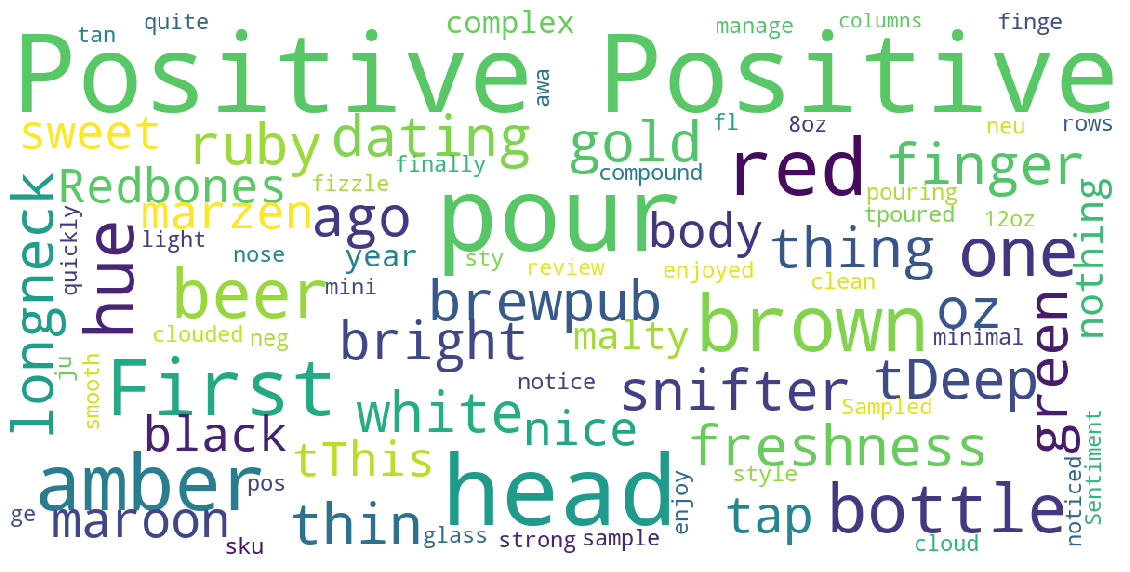

In [6]:
# wordcloud function
from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
pos = df_tweets[df_tweets['Sentiment']=='Positive']
show_wordcloud(pos)

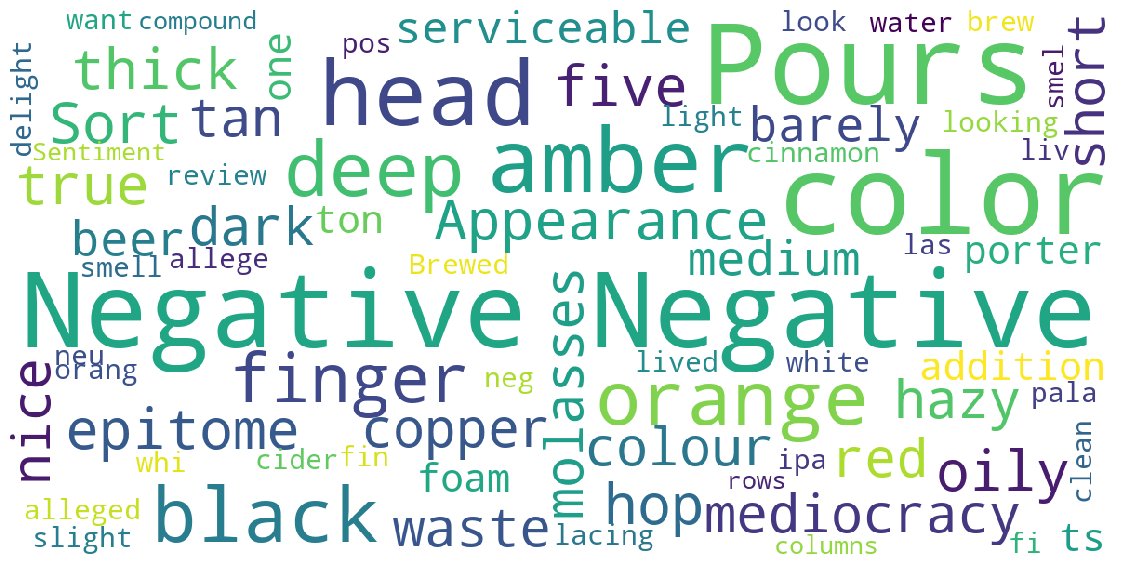

In [7]:
neg = df_tweets[df_tweets['Sentiment']=='Negative']
show_wordcloud(neg)

From word clouds, we can see that words associated with positive sentiment are: longneck, red, broen, maroon, white, deep, gold, ruby, freshness, snifter
From word clouds, we can see that words associated with negative sentiment are: tan,black, waste, oily, orange, copper, foam, hazy, water, molasses

Using these words, we can figure out from review text the overall rating that the customer may have provided for beer